In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from catboost import CatBoostClassifier
from tpot import TPOTClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
ds_train = pd.read_csv("train.csv")
ds_test = pd.read_csv("test.csv")

In [4]:
ds_train

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,Class_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,0,0,0,1,0,0,0,2,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5,0,0,0,0,0,0,0,0,1,0,0,6,0,0,3,0,0,0,Class_1
99996,99996,0,0,0,0,0,0,0,1,2,0,0,0,0,0,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,3,0,1,0,0,0,7,0,0,0,2,0,0,0,10,0,0,0,Class_2
99997,99997,0,0,0,0,0,1,0,0,0,4,0,0,3,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,4,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,2,0,Class_3
99998,99998,0,0,0,0,1,0,0,0,0,5,0,0,0,0,2,0,0,0,3,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,4,0,Class_2


In [5]:
ds_test

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,100000,0,0,0,0,0,0,4,4,0,0,5,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,5,0,5,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,1,0,0,0,2,0,7,7,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,4,0,2,0,0,2,0,3,6,3,0,0,6,0,3,0,1,0,0,0,1,0,2,1
2,100002,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,4,4,0,0,0,0,0,3,0,0,0,0,0,2,11,0,0,0,0,1,0,0,0,0,6,0
3,100003,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,4,1,0,0,1,0,0,1,1,1,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,6,9,14,3
4,100004,0,0,0,0,0,0,1,0,4,0,0,1,0,0,9,0,0,0,0,0,0,3,0,0,0,0,0,0,2,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149995,0,0,0,0,0,0,0,1,5,0,2,0,0,0,7,5,0,0,0,0,6,1,0,0,7,2,0,0,2,0,0,0,3,0,0,0,0,1,0,1,0,1,0,0,0,3,0,0,3,0
49996,149996,0,0,0,0,0,0,10,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,11,0,0,0,0,1,0,0,0,0,0,3
49997,149997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,2,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49998,149998,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,6,0,0,1,0,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,1


In [6]:
def null_values(dataset):
    for keys, values in dict(dataset.isna().sum()).items():
        if values!=0:
            print(keys,values)

In [7]:
null_values(ds_train)

In [8]:
null_values(ds_test)

In [9]:
ds_train.drop(columns="id",axis=1, inplace=True)
ds_test.drop(columns="id",axis=1, inplace=True)

In [10]:
correlation = ds_train.corr()

In [11]:
correlation

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
feature_0,1.00,0.01,-0.01,0.01,-0.00,-0.00,0.00,0.01,-0.00,0.01,0.01,0.01,0.01,-0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01,0.00,-0.00,-0.00,0.00,0.01,0.01,0.00,0.02,0.00,0.00,0.00,0.01,0.00,-0.00,0.00,0.01,-0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00
feature_1,0.01,1.00,0.01,0.00,0.01,0.00,0.01,0.01,0.01,-0.00,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.01,-0.00,-0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01
feature_2,-0.01,0.01,1.00,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.02,-0.00,-0.00,0.01,0.01,-0.00,0.00,-0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.00,-0.00,0.02,0.01,0.01,0.01,0.01,0.00,0.01,0.00,0.00,-0.00,0.00,0.01,-0.00,0.02,0.01,-0.00,0.00,0.00,0.00,0.01
feature_3,0.01,0.00,0.01,1.00,0.00,-0.00,0.01,0.01,0.01,0.00,-0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.01,-0.00,0.01,-0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.01,-0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.01,-0.01,0.01
feature_4,-0.00,0.01,0.00,0.00,1.00,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.00,-0.00,-0.01,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,-0.00,-0.00,-0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.01
feature_5,-0.00,0.00,0.01,-0.00,0.00,1.00,-0.00,0.01,-0.00,0.00,0.00,0.00,-0.00,0.01,-0.00,-0.01,0.01,-0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.01,0.00,0.01,0.01,0.00,-0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.00,-0.00,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.00,-0.00,0.00,0.01,0.00
feature_6,0.00,0.01,0.00,0.01,0.00,-0.00,1.00,0.01,0.00,0.01,0.00,0.01,0.01,-0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,-0.00,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.01
feature_7,0.01,0.01,0.01,0.01,0.01,0.01,0.01,1.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.01,-0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.01
feature_8,-0.00,0.01,0.00,0.01,0.01,-0.00,0.00,0.00,1.00,0.00,0.00,0.01,0.00,0.01,0.00,-0.00,0.00,0.01,0.01,-0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.01,0.00,-0.00,-0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,-0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,-0.00,0.00,0.01
feature_9,0.01,-0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,1.00,-0.00,0.00,0.00,0.00,-0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.01,-0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.01,-0.00,0.00,0.01,-0.00,0.01,0.01


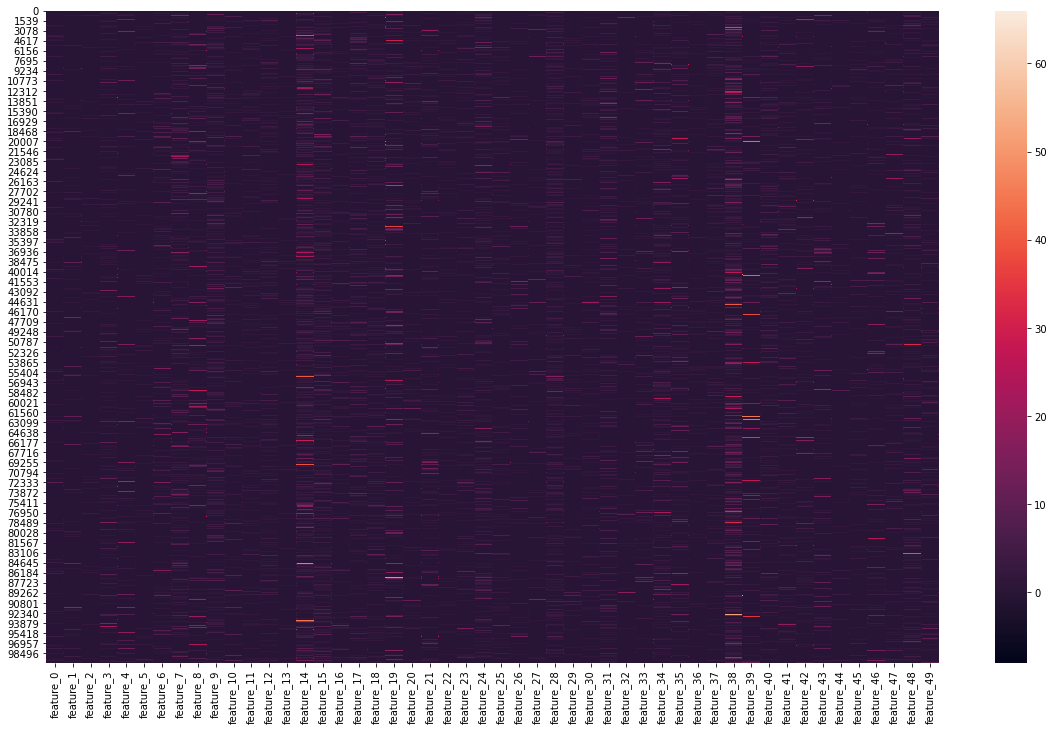

In [12]:
plt.figure(figsize=(20,12))
sns.heatmap(ds_train.iloc[:,:-1])
plt.show()

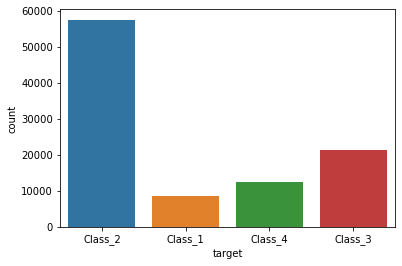

In [13]:
sns.countplot(ds_train["target"])
plt.show()

In [14]:
ds_train["target"].value_counts()

Class_2    57497
Class_3    21420
Class_4    12593
Class_1     8490
Name: target, dtype: int64

In [15]:
# X1 = ds_train.iloc[:,:-1]
# y1 = ds_train.iloc[:,-1]

# smk = SMOTETomek(random_state=0,n_jobs=-1)
# X_bal,y_bal=smk.fit_resample(X1,y1)

In [16]:
X1 = ds_train.iloc[:,:-1]
y1 = ds_train.iloc[:,-1]

smk = SMOTE(random_state=0,n_jobs=-1)
X_bal,y_bal = smk.fit_resample(X1,y1)

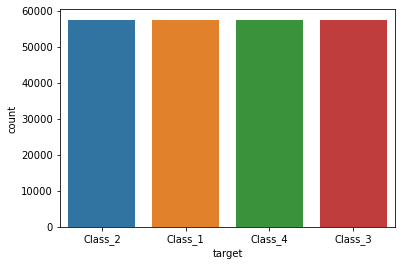

In [17]:
sns.countplot(y_bal)
plt.show()

In [18]:
y_bal.value_counts()

Class_1    57497
Class_2    57497
Class_4    57497
Class_3    57497
Name: target, dtype: int64

In [19]:
type(X_bal)

pandas.core.frame.DataFrame

In [20]:
X_bal = X_bal.values
y_bal =y_bal.values
X_test = ds_test.iloc[:,:].values

In [21]:
type(X_bal)

numpy.ndarray

In [22]:
X = ds_train.loc[:, ds_train.columns != "target"].values
y = ds_train.loc[:, "target"].values
X_test = ds_test.iloc[:,:].values

In [23]:
enc = LabelEncoder()

In [24]:
y = enc.fit_transform(y)
y_bal = enc.fit_transform(y_bal)

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)
Xb_train, Xb_valid, yb_train, yb_valid = train_test_split(X_bal, y_bal, random_state=0)

In [26]:
skf = StratifiedKFold(n_splits= 10)

In [27]:
classifier = CatBoostClassifier(task_type="GPU", iterations=2000, random_state=0, eval_metric="Accuracy")

In [28]:
train_accuracy_score = []
valid_accuracy_score = []
log_loss_valid_list = []

skf.get_n_splits(X,y)

for train_index, valid_index in skf.split(X,y):
    X_skf_train, X_skf_valid = X[train_index], X[valid_index]
    y_skf_train, y_skf_valid = y[train_index], y[valid_index]
    
    classifier.fit(X_skf_train,y_skf_train)
    
    train_score = classifier.score(X_skf_train,y_skf_train)
    valid_score = classifier.score(X_skf_valid,y_skf_valid)
    
    y_skf_valid_predict_prob = classifier.predict_proba(X_skf_valid)
    log_loss_valid = log_loss(y_skf_valid,y_skf_valid_predict_prob)
    
    train_accuracy_score.append(train_score)
    valid_accuracy_score.append(valid_score)
    log_loss_valid_list.append(log_loss_valid)

Learning rate set to 0.091241
0:	learn: 0.5753556	total: 24.5ms	remaining: 49s
1:	learn: 0.5750444	total: 39.2ms	remaining: 39.2s
2:	learn: 0.5750222	total: 52.3ms	remaining: 34.8s
3:	learn: 0.5753778	total: 66.3ms	remaining: 33.1s
4:	learn: 0.5753000	total: 78.3ms	remaining: 31.3s
5:	learn: 0.5752111	total: 90.1ms	remaining: 29.9s
6:	learn: 0.5753000	total: 104ms	remaining: 29.5s
7:	learn: 0.5752778	total: 116ms	remaining: 29s
8:	learn: 0.5753111	total: 130ms	remaining: 28.6s
9:	learn: 0.5753222	total: 143ms	remaining: 28.4s
10:	learn: 0.5752333	total: 157ms	remaining: 28.4s
11:	learn: 0.5752000	total: 171ms	remaining: 28.3s
12:	learn: 0.5751889	total: 183ms	remaining: 28s
13:	learn: 0.5751333	total: 195ms	remaining: 27.7s
14:	learn: 0.5752111	total: 207ms	remaining: 27.3s
15:	learn: 0.5752667	total: 219ms	remaining: 27.2s
16:	learn: 0.5752667	total: 233ms	remaining: 27.2s
17:	learn: 0.5753333	total: 246ms	remaining: 27s
18:	learn: 0.5754111	total: 258ms	remaining: 26.9s
19:	learn: 0.

162:	learn: 0.5812333	total: 1.9s	remaining: 21.4s
163:	learn: 0.5812889	total: 1.91s	remaining: 21.4s
164:	learn: 0.5813667	total: 1.93s	remaining: 21.4s
165:	learn: 0.5814444	total: 1.94s	remaining: 21.4s
166:	learn: 0.5814000	total: 1.95s	remaining: 21.4s
167:	learn: 0.5814889	total: 1.96s	remaining: 21.4s
168:	learn: 0.5815889	total: 1.97s	remaining: 21.3s
169:	learn: 0.5816222	total: 1.98s	remaining: 21.3s
170:	learn: 0.5817111	total: 1.99s	remaining: 21.3s
171:	learn: 0.5818333	total: 2s	remaining: 21.3s
172:	learn: 0.5818667	total: 2.02s	remaining: 21.3s
173:	learn: 0.5819000	total: 2.03s	remaining: 21.3s
174:	learn: 0.5818778	total: 2.04s	remaining: 21.2s
175:	learn: 0.5819444	total: 2.05s	remaining: 21.2s
176:	learn: 0.5819889	total: 2.06s	remaining: 21.2s
177:	learn: 0.5820111	total: 2.07s	remaining: 21.2s
178:	learn: 0.5820444	total: 2.08s	remaining: 21.2s
179:	learn: 0.5820444	total: 2.1s	remaining: 21.2s
180:	learn: 0.5820778	total: 2.11s	remaining: 21.2s
181:	learn: 0.582

331:	learn: 0.5851889	total: 3.76s	remaining: 18.9s
332:	learn: 0.5852222	total: 3.77s	remaining: 18.9s
333:	learn: 0.5852667	total: 3.78s	remaining: 18.9s
334:	learn: 0.5853000	total: 3.79s	remaining: 18.9s
335:	learn: 0.5853111	total: 3.81s	remaining: 18.8s
336:	learn: 0.5853444	total: 3.81s	remaining: 18.8s
337:	learn: 0.5853556	total: 3.83s	remaining: 18.8s
338:	learn: 0.5854889	total: 3.84s	remaining: 18.8s
339:	learn: 0.5854333	total: 3.85s	remaining: 18.8s
340:	learn: 0.5854222	total: 3.86s	remaining: 18.8s
341:	learn: 0.5855444	total: 3.87s	remaining: 18.8s
342:	learn: 0.5855333	total: 3.88s	remaining: 18.8s
343:	learn: 0.5855222	total: 3.89s	remaining: 18.7s
344:	learn: 0.5855444	total: 3.9s	remaining: 18.7s
345:	learn: 0.5855444	total: 3.91s	remaining: 18.7s
346:	learn: 0.5855889	total: 3.92s	remaining: 18.7s
347:	learn: 0.5856222	total: 3.94s	remaining: 18.7s
348:	learn: 0.5855778	total: 3.95s	remaining: 18.7s
349:	learn: 0.5855889	total: 3.96s	remaining: 18.7s
350:	learn: 0

501:	learn: 0.5883444	total: 5.62s	remaining: 16.8s
502:	learn: 0.5883333	total: 5.64s	remaining: 16.8s
503:	learn: 0.5883444	total: 5.65s	remaining: 16.8s
504:	learn: 0.5883556	total: 5.66s	remaining: 16.8s
505:	learn: 0.5883889	total: 5.67s	remaining: 16.7s
506:	learn: 0.5882889	total: 5.68s	remaining: 16.7s
507:	learn: 0.5883444	total: 5.7s	remaining: 16.7s
508:	learn: 0.5883889	total: 5.71s	remaining: 16.7s
509:	learn: 0.5884111	total: 5.72s	remaining: 16.7s
510:	learn: 0.5884889	total: 5.73s	remaining: 16.7s
511:	learn: 0.5885111	total: 5.74s	remaining: 16.7s
512:	learn: 0.5885333	total: 5.75s	remaining: 16.7s
513:	learn: 0.5885444	total: 5.76s	remaining: 16.7s
514:	learn: 0.5885222	total: 5.78s	remaining: 16.7s
515:	learn: 0.5885444	total: 5.79s	remaining: 16.6s
516:	learn: 0.5885222	total: 5.8s	remaining: 16.6s
517:	learn: 0.5885333	total: 5.81s	remaining: 16.6s
518:	learn: 0.5885667	total: 5.82s	remaining: 16.6s
519:	learn: 0.5885556	total: 5.83s	remaining: 16.6s
520:	learn: 0.

668:	learn: 0.5910222	total: 7.47s	remaining: 14.9s
669:	learn: 0.5910111	total: 7.48s	remaining: 14.9s
670:	learn: 0.5910000	total: 7.49s	remaining: 14.8s
671:	learn: 0.5910000	total: 7.5s	remaining: 14.8s
672:	learn: 0.5910667	total: 7.51s	remaining: 14.8s
673:	learn: 0.5910778	total: 7.53s	remaining: 14.8s
674:	learn: 0.5911000	total: 7.54s	remaining: 14.8s
675:	learn: 0.5910667	total: 7.55s	remaining: 14.8s
676:	learn: 0.5911000	total: 7.56s	remaining: 14.8s
677:	learn: 0.5910778	total: 7.57s	remaining: 14.8s
678:	learn: 0.5910667	total: 7.58s	remaining: 14.7s
679:	learn: 0.5910667	total: 7.59s	remaining: 14.7s
680:	learn: 0.5911222	total: 7.6s	remaining: 14.7s
681:	learn: 0.5911444	total: 7.61s	remaining: 14.7s
682:	learn: 0.5911778	total: 7.62s	remaining: 14.7s
683:	learn: 0.5911889	total: 7.64s	remaining: 14.7s
684:	learn: 0.5912111	total: 7.65s	remaining: 14.7s
685:	learn: 0.5912778	total: 7.66s	remaining: 14.7s
686:	learn: 0.5912667	total: 7.67s	remaining: 14.7s
687:	learn: 0.

828:	learn: 0.5933667	total: 9.31s	remaining: 13.1s
829:	learn: 0.5933778	total: 9.32s	remaining: 13.1s
830:	learn: 0.5934000	total: 9.33s	remaining: 13.1s
831:	learn: 0.5934444	total: 9.34s	remaining: 13.1s
832:	learn: 0.5934889	total: 9.35s	remaining: 13.1s
833:	learn: 0.5934889	total: 9.36s	remaining: 13.1s
834:	learn: 0.5934667	total: 9.37s	remaining: 13.1s
835:	learn: 0.5934667	total: 9.38s	remaining: 13.1s
836:	learn: 0.5935667	total: 9.39s	remaining: 13.1s
837:	learn: 0.5935667	total: 9.4s	remaining: 13s
838:	learn: 0.5935000	total: 9.42s	remaining: 13s
839:	learn: 0.5935000	total: 9.43s	remaining: 13s
840:	learn: 0.5934778	total: 9.44s	remaining: 13s
841:	learn: 0.5935778	total: 9.45s	remaining: 13s
842:	learn: 0.5935889	total: 9.46s	remaining: 13s
843:	learn: 0.5936111	total: 9.47s	remaining: 13s
844:	learn: 0.5936111	total: 9.48s	remaining: 13s
845:	learn: 0.5936556	total: 9.49s	remaining: 12.9s
846:	learn: 0.5936444	total: 9.51s	remaining: 12.9s
847:	learn: 0.5937556	total: 

996:	learn: 0.5959222	total: 11.2s	remaining: 11.2s
997:	learn: 0.5959000	total: 11.2s	remaining: 11.2s
998:	learn: 0.5959333	total: 11.2s	remaining: 11.2s
999:	learn: 0.5959333	total: 11.2s	remaining: 11.2s
1000:	learn: 0.5959222	total: 11.2s	remaining: 11.2s
1001:	learn: 0.5959667	total: 11.2s	remaining: 11.2s
1002:	learn: 0.5959222	total: 11.2s	remaining: 11.2s
1003:	learn: 0.5959556	total: 11.2s	remaining: 11.2s
1004:	learn: 0.5960000	total: 11.3s	remaining: 11.1s
1005:	learn: 0.5960333	total: 11.3s	remaining: 11.1s
1006:	learn: 0.5960667	total: 11.3s	remaining: 11.1s
1007:	learn: 0.5960444	total: 11.3s	remaining: 11.1s
1008:	learn: 0.5960556	total: 11.3s	remaining: 11.1s
1009:	learn: 0.5961111	total: 11.3s	remaining: 11.1s
1010:	learn: 0.5960889	total: 11.3s	remaining: 11.1s
1011:	learn: 0.5960778	total: 11.3s	remaining: 11.1s
1012:	learn: 0.5961000	total: 11.3s	remaining: 11s
1013:	learn: 0.5960889	total: 11.3s	remaining: 11s
1014:	learn: 0.5961333	total: 11.4s	remaining: 11s
101

1161:	learn: 0.5984444	total: 13s	remaining: 9.39s
1162:	learn: 0.5984111	total: 13s	remaining: 9.38s
1163:	learn: 0.5984444	total: 13s	remaining: 9.37s
1164:	learn: 0.5984556	total: 13.1s	remaining: 9.36s
1165:	learn: 0.5984444	total: 13.1s	remaining: 9.35s
1166:	learn: 0.5985111	total: 13.1s	remaining: 9.33s
1167:	learn: 0.5985111	total: 13.1s	remaining: 9.32s
1168:	learn: 0.5985111	total: 13.1s	remaining: 9.31s
1169:	learn: 0.5984000	total: 13.1s	remaining: 9.3s
1170:	learn: 0.5984111	total: 13.1s	remaining: 9.29s
1171:	learn: 0.5983667	total: 13.1s	remaining: 9.28s
1172:	learn: 0.5983889	total: 13.1s	remaining: 9.27s
1173:	learn: 0.5984667	total: 13.2s	remaining: 9.26s
1174:	learn: 0.5984667	total: 13.2s	remaining: 9.24s
1175:	learn: 0.5984333	total: 13.2s	remaining: 9.23s
1176:	learn: 0.5984889	total: 13.2s	remaining: 9.22s
1177:	learn: 0.5985222	total: 13.2s	remaining: 9.21s
1178:	learn: 0.5985444	total: 13.2s	remaining: 9.2s
1179:	learn: 0.5985667	total: 13.2s	remaining: 9.19s
1

1324:	learn: 0.6011000	total: 14.9s	remaining: 7.58s
1325:	learn: 0.6011111	total: 14.9s	remaining: 7.57s
1326:	learn: 0.6011000	total: 14.9s	remaining: 7.56s
1327:	learn: 0.6012000	total: 14.9s	remaining: 7.54s
1328:	learn: 0.6012333	total: 14.9s	remaining: 7.53s
1329:	learn: 0.6012556	total: 14.9s	remaining: 7.52s
1330:	learn: 0.6012333	total: 14.9s	remaining: 7.51s
1331:	learn: 0.6012667	total: 15s	remaining: 7.5s
1332:	learn: 0.6012889	total: 15s	remaining: 7.49s
1333:	learn: 0.6013222	total: 15s	remaining: 7.48s
1334:	learn: 0.6012556	total: 15s	remaining: 7.46s
1335:	learn: 0.6012889	total: 15s	remaining: 7.45s
1336:	learn: 0.6012667	total: 15s	remaining: 7.44s
1337:	learn: 0.6013556	total: 15s	remaining: 7.43s
1338:	learn: 0.6013667	total: 15s	remaining: 7.42s
1339:	learn: 0.6014111	total: 15s	remaining: 7.41s
1340:	learn: 0.6014444	total: 15s	remaining: 7.39s
1341:	learn: 0.6014778	total: 15.1s	remaining: 7.38s
1342:	learn: 0.6015556	total: 15.1s	remaining: 7.37s
1343:	learn: 0

1486:	learn: 0.6038444	total: 16.7s	remaining: 5.76s
1487:	learn: 0.6038778	total: 16.7s	remaining: 5.75s
1488:	learn: 0.6038222	total: 16.7s	remaining: 5.74s
1489:	learn: 0.6038556	total: 16.7s	remaining: 5.73s
1490:	learn: 0.6038222	total: 16.8s	remaining: 5.72s
1491:	learn: 0.6038000	total: 16.8s	remaining: 5.71s
1492:	learn: 0.6038556	total: 16.8s	remaining: 5.7s
1493:	learn: 0.6038667	total: 16.8s	remaining: 5.68s
1494:	learn: 0.6038778	total: 16.8s	remaining: 5.67s
1495:	learn: 0.6039556	total: 16.8s	remaining: 5.66s
1496:	learn: 0.6039444	total: 16.8s	remaining: 5.65s
1497:	learn: 0.6039222	total: 16.8s	remaining: 5.64s
1498:	learn: 0.6039667	total: 16.8s	remaining: 5.63s
1499:	learn: 0.6040000	total: 16.9s	remaining: 5.62s
1500:	learn: 0.6040444	total: 16.9s	remaining: 5.61s
1501:	learn: 0.6040556	total: 16.9s	remaining: 5.59s
1502:	learn: 0.6040333	total: 16.9s	remaining: 5.58s
1503:	learn: 0.6040111	total: 16.9s	remaining: 5.57s
1504:	learn: 0.6040333	total: 16.9s	remaining: 

1648:	learn: 0.6061556	total: 18.6s	remaining: 3.95s
1649:	learn: 0.6062000	total: 18.6s	remaining: 3.94s
1650:	learn: 0.6062000	total: 18.6s	remaining: 3.93s
1651:	learn: 0.6061222	total: 18.6s	remaining: 3.92s
1652:	learn: 0.6061444	total: 18.6s	remaining: 3.9s
1653:	learn: 0.6061778	total: 18.6s	remaining: 3.89s
1654:	learn: 0.6061778	total: 18.6s	remaining: 3.88s
1655:	learn: 0.6062000	total: 18.6s	remaining: 3.87s
1656:	learn: 0.6062000	total: 18.6s	remaining: 3.86s
1657:	learn: 0.6061667	total: 18.7s	remaining: 3.85s
1658:	learn: 0.6063000	total: 18.7s	remaining: 3.84s
1659:	learn: 0.6062889	total: 18.7s	remaining: 3.83s
1660:	learn: 0.6063444	total: 18.7s	remaining: 3.82s
1661:	learn: 0.6062889	total: 18.7s	remaining: 3.81s
1662:	learn: 0.6063444	total: 18.7s	remaining: 3.79s
1663:	learn: 0.6062889	total: 18.7s	remaining: 3.78s
1664:	learn: 0.6063111	total: 18.8s	remaining: 3.77s
1665:	learn: 0.6062778	total: 18.8s	remaining: 3.76s
1666:	learn: 0.6063000	total: 18.8s	remaining: 

1813:	learn: 0.6089444	total: 20.4s	remaining: 2.09s
1814:	learn: 0.6089667	total: 20.4s	remaining: 2.08s
1815:	learn: 0.6089444	total: 20.4s	remaining: 2.07s
1816:	learn: 0.6089444	total: 20.4s	remaining: 2.06s
1817:	learn: 0.6089444	total: 20.4s	remaining: 2.05s
1818:	learn: 0.6090111	total: 20.5s	remaining: 2.04s
1819:	learn: 0.6090444	total: 20.5s	remaining: 2.02s
1820:	learn: 0.6090889	total: 20.5s	remaining: 2.01s
1821:	learn: 0.6090222	total: 20.5s	remaining: 2s
1822:	learn: 0.6091444	total: 20.5s	remaining: 1.99s
1823:	learn: 0.6091889	total: 20.5s	remaining: 1.98s
1824:	learn: 0.6092222	total: 20.5s	remaining: 1.97s
1825:	learn: 0.6092556	total: 20.5s	remaining: 1.96s
1826:	learn: 0.6093333	total: 20.5s	remaining: 1.95s
1827:	learn: 0.6093556	total: 20.6s	remaining: 1.93s
1828:	learn: 0.6093000	total: 20.6s	remaining: 1.92s
1829:	learn: 0.6093000	total: 20.6s	remaining: 1.91s
1830:	learn: 0.6092444	total: 20.6s	remaining: 1.9s
1831:	learn: 0.6093222	total: 20.6s	remaining: 1.8

1976:	learn: 0.6118000	total: 22.3s	remaining: 259ms
1977:	learn: 0.6118333	total: 22.3s	remaining: 248ms
1978:	learn: 0.6118222	total: 22.3s	remaining: 236ms
1979:	learn: 0.6118222	total: 22.3s	remaining: 225ms
1980:	learn: 0.6118000	total: 22.3s	remaining: 214ms
1981:	learn: 0.6118222	total: 22.3s	remaining: 203ms
1982:	learn: 0.6119111	total: 22.3s	remaining: 191ms
1983:	learn: 0.6118889	total: 22.3s	remaining: 180ms
1984:	learn: 0.6118889	total: 22.3s	remaining: 169ms
1985:	learn: 0.6120333	total: 22.4s	remaining: 158ms
1986:	learn: 0.6119889	total: 22.4s	remaining: 146ms
1987:	learn: 0.6119556	total: 22.4s	remaining: 135ms
1988:	learn: 0.6119444	total: 22.4s	remaining: 124ms
1989:	learn: 0.6119444	total: 22.4s	remaining: 113ms
1990:	learn: 0.6119778	total: 22.4s	remaining: 101ms
1991:	learn: 0.6119556	total: 22.4s	remaining: 90.1ms
1992:	learn: 0.6120222	total: 22.4s	remaining: 78.8ms
1993:	learn: 0.6119667	total: 22.5s	remaining: 67.6ms
1994:	learn: 0.6120222	total: 22.5s	remaini

142:	learn: 0.5805000	total: 1.74s	remaining: 22.6s
143:	learn: 0.5804889	total: 1.76s	remaining: 22.6s
144:	learn: 0.5805111	total: 1.77s	remaining: 22.7s
145:	learn: 0.5805222	total: 1.79s	remaining: 22.7s
146:	learn: 0.5806444	total: 1.8s	remaining: 22.7s
147:	learn: 0.5807222	total: 1.81s	remaining: 22.7s
148:	learn: 0.5807222	total: 1.83s	remaining: 22.7s
149:	learn: 0.5807444	total: 1.84s	remaining: 22.7s
150:	learn: 0.5808000	total: 1.85s	remaining: 22.7s
151:	learn: 0.5809111	total: 1.87s	remaining: 22.7s
152:	learn: 0.5809778	total: 1.88s	remaining: 22.7s
153:	learn: 0.5810444	total: 1.89s	remaining: 22.7s
154:	learn: 0.5810111	total: 1.91s	remaining: 22.7s
155:	learn: 0.5810444	total: 1.92s	remaining: 22.7s
156:	learn: 0.5810444	total: 1.94s	remaining: 22.8s
157:	learn: 0.5810333	total: 1.95s	remaining: 22.8s
158:	learn: 0.5810889	total: 1.97s	remaining: 22.8s
159:	learn: 0.5810889	total: 1.98s	remaining: 22.8s
160:	learn: 0.5812000	total: 2s	remaining: 22.8s
161:	learn: 0.58

308:	learn: 0.5854111	total: 3.93s	remaining: 21.5s
309:	learn: 0.5854222	total: 3.94s	remaining: 21.5s
310:	learn: 0.5854222	total: 3.95s	remaining: 21.5s
311:	learn: 0.5854778	total: 3.97s	remaining: 21.5s
312:	learn: 0.5854444	total: 3.98s	remaining: 21.4s
313:	learn: 0.5854222	total: 3.99s	remaining: 21.4s
314:	learn: 0.5854667	total: 4s	remaining: 21.4s
315:	learn: 0.5856000	total: 4.01s	remaining: 21.4s
316:	learn: 0.5855667	total: 4.02s	remaining: 21.4s
317:	learn: 0.5855778	total: 4.04s	remaining: 21.4s
318:	learn: 0.5855667	total: 4.05s	remaining: 21.3s
319:	learn: 0.5856111	total: 4.06s	remaining: 21.3s
320:	learn: 0.5856111	total: 4.07s	remaining: 21.3s
321:	learn: 0.5856000	total: 4.08s	remaining: 21.3s
322:	learn: 0.5856889	total: 4.09s	remaining: 21.3s
323:	learn: 0.5857000	total: 4.11s	remaining: 21.2s
324:	learn: 0.5857667	total: 4.12s	remaining: 21.2s
325:	learn: 0.5857778	total: 4.13s	remaining: 21.2s
326:	learn: 0.5857889	total: 4.14s	remaining: 21.2s
327:	learn: 0.5

470:	learn: 0.5885778	total: 5.93s	remaining: 19.3s
471:	learn: 0.5885778	total: 5.95s	remaining: 19.3s
472:	learn: 0.5886111	total: 5.96s	remaining: 19.2s
473:	learn: 0.5886111	total: 5.97s	remaining: 19.2s
474:	learn: 0.5886222	total: 5.98s	remaining: 19.2s
475:	learn: 0.5886333	total: 6s	remaining: 19.2s
476:	learn: 0.5886556	total: 6.01s	remaining: 19.2s
477:	learn: 0.5886667	total: 6.02s	remaining: 19.2s
478:	learn: 0.5886556	total: 6.03s	remaining: 19.1s
479:	learn: 0.5886556	total: 6.04s	remaining: 19.1s
480:	learn: 0.5886333	total: 6.05s	remaining: 19.1s
481:	learn: 0.5887222	total: 6.06s	remaining: 19.1s
482:	learn: 0.5887333	total: 6.07s	remaining: 19.1s
483:	learn: 0.5887667	total: 6.08s	remaining: 19.1s
484:	learn: 0.5887667	total: 6.09s	remaining: 19s
485:	learn: 0.5887889	total: 6.11s	remaining: 19s
486:	learn: 0.5887556	total: 6.12s	remaining: 19s
487:	learn: 0.5887444	total: 6.13s	remaining: 19s
488:	learn: 0.5887556	total: 6.14s	remaining: 19s
489:	learn: 0.5887000	tot

632:	learn: 0.5911333	total: 7.76s	remaining: 16.8s
633:	learn: 0.5911556	total: 7.78s	remaining: 16.8s
634:	learn: 0.5911667	total: 7.79s	remaining: 16.7s
635:	learn: 0.5911444	total: 7.8s	remaining: 16.7s
636:	learn: 0.5911333	total: 7.81s	remaining: 16.7s
637:	learn: 0.5911556	total: 7.82s	remaining: 16.7s
638:	learn: 0.5911333	total: 7.83s	remaining: 16.7s
639:	learn: 0.5911000	total: 7.84s	remaining: 16.7s
640:	learn: 0.5911556	total: 7.86s	remaining: 16.7s
641:	learn: 0.5911333	total: 7.87s	remaining: 16.6s
642:	learn: 0.5911222	total: 7.88s	remaining: 16.6s
643:	learn: 0.5911778	total: 7.89s	remaining: 16.6s
644:	learn: 0.5911667	total: 7.9s	remaining: 16.6s
645:	learn: 0.5911444	total: 7.91s	remaining: 16.6s
646:	learn: 0.5911556	total: 7.93s	remaining: 16.6s
647:	learn: 0.5911667	total: 7.94s	remaining: 16.6s
648:	learn: 0.5911667	total: 7.95s	remaining: 16.6s
649:	learn: 0.5912667	total: 7.96s	remaining: 16.5s
650:	learn: 0.5912667	total: 7.97s	remaining: 16.5s
651:	learn: 0.

793:	learn: 0.5932333	total: 9.6s	remaining: 14.6s
794:	learn: 0.5932222	total: 9.61s	remaining: 14.6s
795:	learn: 0.5932333	total: 9.62s	remaining: 14.6s
796:	learn: 0.5933111	total: 9.63s	remaining: 14.5s
797:	learn: 0.5932778	total: 9.64s	remaining: 14.5s
798:	learn: 0.5933111	total: 9.66s	remaining: 14.5s
799:	learn: 0.5934222	total: 9.67s	remaining: 14.5s
800:	learn: 0.5934556	total: 9.68s	remaining: 14.5s
801:	learn: 0.5934111	total: 9.69s	remaining: 14.5s
802:	learn: 0.5934111	total: 9.7s	remaining: 14.5s
803:	learn: 0.5933778	total: 9.71s	remaining: 14.4s
804:	learn: 0.5934111	total: 9.72s	remaining: 14.4s
805:	learn: 0.5934333	total: 9.73s	remaining: 14.4s
806:	learn: 0.5934444	total: 9.75s	remaining: 14.4s
807:	learn: 0.5934556	total: 9.76s	remaining: 14.4s
808:	learn: 0.5934889	total: 9.77s	remaining: 14.4s
809:	learn: 0.5934444	total: 9.78s	remaining: 14.4s
810:	learn: 0.5934333	total: 9.79s	remaining: 14.4s
811:	learn: 0.5934444	total: 9.8s	remaining: 14.3s
812:	learn: 0.5

957:	learn: 0.5955333	total: 11.5s	remaining: 12.5s
958:	learn: 0.5955222	total: 11.5s	remaining: 12.4s
959:	learn: 0.5955111	total: 11.5s	remaining: 12.4s
960:	learn: 0.5955444	total: 11.5s	remaining: 12.4s
961:	learn: 0.5955889	total: 11.5s	remaining: 12.4s
962:	learn: 0.5955556	total: 11.5s	remaining: 12.4s
963:	learn: 0.5955667	total: 11.5s	remaining: 12.4s
964:	learn: 0.5955556	total: 11.5s	remaining: 12.4s
965:	learn: 0.5955333	total: 11.5s	remaining: 12.4s
966:	learn: 0.5954778	total: 11.6s	remaining: 12.3s
967:	learn: 0.5955111	total: 11.6s	remaining: 12.3s
968:	learn: 0.5954889	total: 11.6s	remaining: 12.3s
969:	learn: 0.5955444	total: 11.6s	remaining: 12.3s
970:	learn: 0.5955444	total: 11.6s	remaining: 12.3s
971:	learn: 0.5956111	total: 11.6s	remaining: 12.3s
972:	learn: 0.5956222	total: 11.6s	remaining: 12.3s
973:	learn: 0.5955778	total: 11.6s	remaining: 12.3s
974:	learn: 0.5955667	total: 11.6s	remaining: 12.2s
975:	learn: 0.5956000	total: 11.7s	remaining: 12.2s
976:	learn: 

1117:	learn: 0.5977000	total: 13.3s	remaining: 10.5s
1118:	learn: 0.5976778	total: 13.3s	remaining: 10.5s
1119:	learn: 0.5976667	total: 13.3s	remaining: 10.5s
1120:	learn: 0.5976778	total: 13.3s	remaining: 10.4s
1121:	learn: 0.5976667	total: 13.3s	remaining: 10.4s
1122:	learn: 0.5977111	total: 13.3s	remaining: 10.4s
1123:	learn: 0.5977222	total: 13.4s	remaining: 10.4s
1124:	learn: 0.5978111	total: 13.4s	remaining: 10.4s
1125:	learn: 0.5978444	total: 13.4s	remaining: 10.4s
1126:	learn: 0.5979222	total: 13.4s	remaining: 10.4s
1127:	learn: 0.5979111	total: 13.4s	remaining: 10.4s
1128:	learn: 0.5979444	total: 13.4s	remaining: 10.3s
1129:	learn: 0.5979556	total: 13.4s	remaining: 10.3s
1130:	learn: 0.5979444	total: 13.4s	remaining: 10.3s
1131:	learn: 0.5979889	total: 13.5s	remaining: 10.3s
1132:	learn: 0.5979889	total: 13.5s	remaining: 10.3s
1133:	learn: 0.5979556	total: 13.5s	remaining: 10.3s
1134:	learn: 0.5980000	total: 13.5s	remaining: 10.3s
1135:	learn: 0.5980222	total: 13.5s	remaining:

1281:	learn: 0.6002000	total: 15.1s	remaining: 8.48s
1282:	learn: 0.6002556	total: 15.2s	remaining: 8.47s
1283:	learn: 0.6002333	total: 15.2s	remaining: 8.46s
1284:	learn: 0.6002444	total: 15.2s	remaining: 8.45s
1285:	learn: 0.6002333	total: 15.2s	remaining: 8.44s
1286:	learn: 0.6003111	total: 15.2s	remaining: 8.42s
1287:	learn: 0.6003222	total: 15.2s	remaining: 8.41s
1288:	learn: 0.6003889	total: 15.2s	remaining: 8.4s
1289:	learn: 0.6004222	total: 15.2s	remaining: 8.39s
1290:	learn: 0.6004333	total: 15.3s	remaining: 8.38s
1291:	learn: 0.6004111	total: 15.3s	remaining: 8.36s
1292:	learn: 0.6004333	total: 15.3s	remaining: 8.35s
1293:	learn: 0.6005111	total: 15.3s	remaining: 8.34s
1294:	learn: 0.6004889	total: 15.3s	remaining: 8.33s
1295:	learn: 0.6005000	total: 15.3s	remaining: 8.31s
1296:	learn: 0.6005222	total: 15.3s	remaining: 8.3s
1297:	learn: 0.6005333	total: 15.3s	remaining: 8.29s
1298:	learn: 0.6005889	total: 15.3s	remaining: 8.28s
1299:	learn: 0.6005667	total: 15.4s	remaining: 8

1440:	learn: 0.6030667	total: 17s	remaining: 6.59s
1441:	learn: 0.6030556	total: 17s	remaining: 6.58s
1442:	learn: 0.6030111	total: 17s	remaining: 6.57s
1443:	learn: 0.6030556	total: 17s	remaining: 6.56s
1444:	learn: 0.6031333	total: 17.1s	remaining: 6.55s
1445:	learn: 0.6031778	total: 17.1s	remaining: 6.54s
1446:	learn: 0.6031333	total: 17.1s	remaining: 6.53s
1447:	learn: 0.6031111	total: 17.1s	remaining: 6.51s
1448:	learn: 0.6031778	total: 17.1s	remaining: 6.5s
1449:	learn: 0.6031889	total: 17.1s	remaining: 6.49s
1450:	learn: 0.6032111	total: 17.1s	remaining: 6.48s
1451:	learn: 0.6032111	total: 17.1s	remaining: 6.46s
1452:	learn: 0.6032222	total: 17.1s	remaining: 6.45s
1453:	learn: 0.6031778	total: 17.2s	remaining: 6.44s
1454:	learn: 0.6031556	total: 17.2s	remaining: 6.43s
1455:	learn: 0.6031778	total: 17.2s	remaining: 6.42s
1456:	learn: 0.6033000	total: 17.2s	remaining: 6.41s
1457:	learn: 0.6033667	total: 17.2s	remaining: 6.4s
1458:	learn: 0.6033889	total: 17.2s	remaining: 6.39s
145

1600:	learn: 0.6058333	total: 18.8s	remaining: 4.7s
1601:	learn: 0.6058444	total: 18.9s	remaining: 4.68s
1602:	learn: 0.6058889	total: 18.9s	remaining: 4.67s
1603:	learn: 0.6059222	total: 18.9s	remaining: 4.66s
1604:	learn: 0.6058556	total: 18.9s	remaining: 4.65s
1605:	learn: 0.6060111	total: 18.9s	remaining: 4.64s
1606:	learn: 0.6060667	total: 18.9s	remaining: 4.63s
1607:	learn: 0.6060667	total: 18.9s	remaining: 4.61s
1608:	learn: 0.6060556	total: 18.9s	remaining: 4.6s
1609:	learn: 0.6060444	total: 18.9s	remaining: 4.59s
1610:	learn: 0.6060444	total: 19s	remaining: 4.58s
1611:	learn: 0.6060778	total: 19s	remaining: 4.57s
1612:	learn: 0.6061111	total: 19s	remaining: 4.55s
1613:	learn: 0.6060778	total: 19s	remaining: 4.54s
1614:	learn: 0.6060556	total: 19s	remaining: 4.53s
1615:	learn: 0.6060667	total: 19s	remaining: 4.52s
1616:	learn: 0.6061444	total: 19s	remaining: 4.51s
1617:	learn: 0.6062333	total: 19s	remaining: 4.49s
1618:	learn: 0.6062556	total: 19s	remaining: 4.48s
1619:	learn: 

1762:	learn: 0.6089222	total: 20.7s	remaining: 2.78s
1763:	learn: 0.6089111	total: 20.7s	remaining: 2.77s
1764:	learn: 0.6089556	total: 20.7s	remaining: 2.76s
1765:	learn: 0.6089444	total: 20.7s	remaining: 2.75s
1766:	learn: 0.6088778	total: 20.7s	remaining: 2.73s
1767:	learn: 0.6089556	total: 20.7s	remaining: 2.72s
1768:	learn: 0.6089333	total: 20.8s	remaining: 2.71s
1769:	learn: 0.6089444	total: 20.8s	remaining: 2.7s
1770:	learn: 0.6089222	total: 20.8s	remaining: 2.69s
1771:	learn: 0.6089778	total: 20.8s	remaining: 2.67s
1772:	learn: 0.6089889	total: 20.8s	remaining: 2.66s
1773:	learn: 0.6090444	total: 20.8s	remaining: 2.65s
1774:	learn: 0.6090444	total: 20.8s	remaining: 2.64s
1775:	learn: 0.6090000	total: 20.8s	remaining: 2.63s
1776:	learn: 0.6089778	total: 20.8s	remaining: 2.62s
1777:	learn: 0.6089889	total: 20.9s	remaining: 2.6s
1778:	learn: 0.6090333	total: 20.9s	remaining: 2.59s
1779:	learn: 0.6090222	total: 20.9s	remaining: 2.58s
1780:	learn: 0.6090444	total: 20.9s	remaining: 2

1924:	learn: 0.6112000	total: 22.5s	remaining: 878ms
1925:	learn: 0.6112778	total: 22.5s	remaining: 866ms
1926:	learn: 0.6112444	total: 22.6s	remaining: 854ms
1927:	learn: 0.6112111	total: 22.6s	remaining: 843ms
1928:	learn: 0.6112444	total: 22.6s	remaining: 831ms
1929:	learn: 0.6112556	total: 22.6s	remaining: 819ms
1930:	learn: 0.6112444	total: 22.6s	remaining: 808ms
1931:	learn: 0.6112556	total: 22.6s	remaining: 796ms
1932:	learn: 0.6112889	total: 22.6s	remaining: 784ms
1933:	learn: 0.6113333	total: 22.6s	remaining: 772ms
1934:	learn: 0.6114000	total: 22.6s	remaining: 761ms
1935:	learn: 0.6114333	total: 22.7s	remaining: 749ms
1936:	learn: 0.6114667	total: 22.7s	remaining: 737ms
1937:	learn: 0.6114556	total: 22.7s	remaining: 726ms
1938:	learn: 0.6114333	total: 22.7s	remaining: 714ms
1939:	learn: 0.6115000	total: 22.7s	remaining: 702ms
1940:	learn: 0.6115111	total: 22.7s	remaining: 690ms
1941:	learn: 0.6115111	total: 22.7s	remaining: 679ms
1942:	learn: 0.6115444	total: 22.7s	remaining:

84:	learn: 0.5780889	total: 1s	remaining: 22.5s
85:	learn: 0.5781000	total: 1.01s	remaining: 22.6s
86:	learn: 0.5781667	total: 1.03s	remaining: 22.6s
87:	learn: 0.5781444	total: 1.04s	remaining: 22.5s
88:	learn: 0.5781778	total: 1.05s	remaining: 22.5s
89:	learn: 0.5782222	total: 1.06s	remaining: 22.5s
90:	learn: 0.5782667	total: 1.07s	remaining: 22.5s
91:	learn: 0.5784111	total: 1.08s	remaining: 22.5s
92:	learn: 0.5784444	total: 1.1s	remaining: 22.5s
93:	learn: 0.5784778	total: 1.11s	remaining: 22.5s
94:	learn: 0.5785000	total: 1.12s	remaining: 22.5s
95:	learn: 0.5784778	total: 1.13s	remaining: 22.4s
96:	learn: 0.5785889	total: 1.14s	remaining: 22.4s
97:	learn: 0.5786000	total: 1.16s	remaining: 22.4s
98:	learn: 0.5786222	total: 1.17s	remaining: 22.4s
99:	learn: 0.5787222	total: 1.18s	remaining: 22.4s
100:	learn: 0.5787222	total: 1.19s	remaining: 22.4s
101:	learn: 0.5787778	total: 1.2s	remaining: 22.3s
102:	learn: 0.5788556	total: 1.21s	remaining: 22.3s
103:	learn: 0.5788556	total: 1.22

245:	learn: 0.5837889	total: 2.84s	remaining: 20.3s
246:	learn: 0.5837889	total: 2.85s	remaining: 20.2s
247:	learn: 0.5837778	total: 2.86s	remaining: 20.2s
248:	learn: 0.5837778	total: 2.87s	remaining: 20.2s
249:	learn: 0.5837889	total: 2.88s	remaining: 20.2s
250:	learn: 0.5837667	total: 2.9s	remaining: 20.2s
251:	learn: 0.5837778	total: 2.91s	remaining: 20.2s
252:	learn: 0.5838111	total: 2.92s	remaining: 20.2s
253:	learn: 0.5838667	total: 2.93s	remaining: 20.2s
254:	learn: 0.5838667	total: 2.94s	remaining: 20.1s
255:	learn: 0.5839444	total: 2.95s	remaining: 20.1s
256:	learn: 0.5839667	total: 2.96s	remaining: 20.1s
257:	learn: 0.5840333	total: 2.98s	remaining: 20.1s
258:	learn: 0.5840667	total: 2.99s	remaining: 20.1s
259:	learn: 0.5840667	total: 3s	remaining: 20.1s
260:	learn: 0.5841111	total: 3.01s	remaining: 20.1s
261:	learn: 0.5841778	total: 3.02s	remaining: 20s
262:	learn: 0.5842222	total: 3.04s	remaining: 20s
263:	learn: 0.5842889	total: 3.05s	remaining: 20s
264:	learn: 0.5842778	

405:	learn: 0.5873111	total: 4.69s	remaining: 18.4s
406:	learn: 0.5872889	total: 4.71s	remaining: 18.4s
407:	learn: 0.5873556	total: 4.72s	remaining: 18.4s
408:	learn: 0.5874222	total: 4.73s	remaining: 18.4s
409:	learn: 0.5874556	total: 4.74s	remaining: 18.4s
410:	learn: 0.5874222	total: 4.75s	remaining: 18.4s
411:	learn: 0.5874333	total: 4.76s	remaining: 18.4s
412:	learn: 0.5874667	total: 4.78s	remaining: 18.4s
413:	learn: 0.5875222	total: 4.79s	remaining: 18.3s
414:	learn: 0.5875444	total: 4.8s	remaining: 18.3s
415:	learn: 0.5875333	total: 4.81s	remaining: 18.3s
416:	learn: 0.5875667	total: 4.82s	remaining: 18.3s
417:	learn: 0.5877000	total: 4.84s	remaining: 18.3s
418:	learn: 0.5876889	total: 4.85s	remaining: 18.3s
419:	learn: 0.5876444	total: 4.86s	remaining: 18.3s
420:	learn: 0.5876111	total: 4.87s	remaining: 18.3s
421:	learn: 0.5876222	total: 4.88s	remaining: 18.3s
422:	learn: 0.5876778	total: 4.89s	remaining: 18.2s
423:	learn: 0.5877111	total: 4.91s	remaining: 18.2s
424:	learn: 0

566:	learn: 0.5897222	total: 6.54s	remaining: 16.5s
567:	learn: 0.5897556	total: 6.55s	remaining: 16.5s
568:	learn: 0.5897667	total: 6.56s	remaining: 16.5s
569:	learn: 0.5897778	total: 6.57s	remaining: 16.5s
570:	learn: 0.5897667	total: 6.58s	remaining: 16.5s
571:	learn: 0.5897778	total: 6.59s	remaining: 16.5s
572:	learn: 0.5897667	total: 6.61s	remaining: 16.5s
573:	learn: 0.5898444	total: 6.62s	remaining: 16.4s
574:	learn: 0.5897444	total: 6.63s	remaining: 16.4s
575:	learn: 0.5898000	total: 6.64s	remaining: 16.4s
576:	learn: 0.5898333	total: 6.65s	remaining: 16.4s
577:	learn: 0.5898222	total: 6.66s	remaining: 16.4s
578:	learn: 0.5898778	total: 6.67s	remaining: 16.4s
579:	learn: 0.5898667	total: 6.69s	remaining: 16.4s
580:	learn: 0.5899222	total: 6.7s	remaining: 16.4s
581:	learn: 0.5899556	total: 6.71s	remaining: 16.3s
582:	learn: 0.5899778	total: 6.72s	remaining: 16.3s
583:	learn: 0.5900667	total: 6.73s	remaining: 16.3s
584:	learn: 0.5900333	total: 6.74s	remaining: 16.3s
585:	learn: 0

729:	learn: 0.5920667	total: 8.38s	remaining: 14.6s
730:	learn: 0.5920778	total: 8.4s	remaining: 14.6s
731:	learn: 0.5920222	total: 8.41s	remaining: 14.6s
732:	learn: 0.5920444	total: 8.42s	remaining: 14.6s
733:	learn: 0.5921000	total: 8.43s	remaining: 14.5s
734:	learn: 0.5921333	total: 8.45s	remaining: 14.5s
735:	learn: 0.5921333	total: 8.46s	remaining: 14.5s
736:	learn: 0.5921667	total: 8.47s	remaining: 14.5s
737:	learn: 0.5922000	total: 8.48s	remaining: 14.5s
738:	learn: 0.5922111	total: 8.49s	remaining: 14.5s
739:	learn: 0.5922222	total: 8.5s	remaining: 14.5s
740:	learn: 0.5922444	total: 8.51s	remaining: 14.5s
741:	learn: 0.5922111	total: 8.52s	remaining: 14.5s
742:	learn: 0.5922333	total: 8.53s	remaining: 14.4s
743:	learn: 0.5922444	total: 8.54s	remaining: 14.4s
744:	learn: 0.5922889	total: 8.56s	remaining: 14.4s
745:	learn: 0.5923333	total: 8.57s	remaining: 14.4s
746:	learn: 0.5923222	total: 8.58s	remaining: 14.4s
747:	learn: 0.5923333	total: 8.6s	remaining: 14.4s
748:	learn: 0.5

891:	learn: 0.5938444	total: 10.2s	remaining: 12.7s
892:	learn: 0.5939444	total: 10.2s	remaining: 12.7s
893:	learn: 0.5939889	total: 10.2s	remaining: 12.7s
894:	learn: 0.5939667	total: 10.2s	remaining: 12.7s
895:	learn: 0.5939111	total: 10.3s	remaining: 12.6s
896:	learn: 0.5939444	total: 10.3s	remaining: 12.6s
897:	learn: 0.5938889	total: 10.3s	remaining: 12.6s
898:	learn: 0.5939333	total: 10.3s	remaining: 12.6s
899:	learn: 0.5939444	total: 10.3s	remaining: 12.6s
900:	learn: 0.5939556	total: 10.3s	remaining: 12.6s
901:	learn: 0.5940222	total: 10.3s	remaining: 12.6s
902:	learn: 0.5940000	total: 10.3s	remaining: 12.6s
903:	learn: 0.5940444	total: 10.4s	remaining: 12.6s
904:	learn: 0.5940778	total: 10.4s	remaining: 12.5s
905:	learn: 0.5941778	total: 10.4s	remaining: 12.5s
906:	learn: 0.5941667	total: 10.4s	remaining: 12.5s
907:	learn: 0.5942000	total: 10.4s	remaining: 12.5s
908:	learn: 0.5941778	total: 10.4s	remaining: 12.5s
909:	learn: 0.5942000	total: 10.4s	remaining: 12.5s
910:	learn: 

1062:	learn: 0.5966444	total: 12.2s	remaining: 10.8s
1063:	learn: 0.5966889	total: 12.2s	remaining: 10.8s
1064:	learn: 0.5966333	total: 12.3s	remaining: 10.8s
1065:	learn: 0.5966556	total: 12.3s	remaining: 10.8s
1066:	learn: 0.5966556	total: 12.3s	remaining: 10.7s
1067:	learn: 0.5966111	total: 12.3s	remaining: 10.7s
1068:	learn: 0.5966889	total: 12.3s	remaining: 10.7s
1069:	learn: 0.5967111	total: 12.3s	remaining: 10.7s
1070:	learn: 0.5967222	total: 12.3s	remaining: 10.7s
1071:	learn: 0.5966889	total: 12.3s	remaining: 10.7s
1072:	learn: 0.5967222	total: 12.4s	remaining: 10.7s
1073:	learn: 0.5967000	total: 12.4s	remaining: 10.7s
1074:	learn: 0.5968111	total: 12.4s	remaining: 10.7s
1075:	learn: 0.5968667	total: 12.4s	remaining: 10.7s
1076:	learn: 0.5968556	total: 12.4s	remaining: 10.6s
1077:	learn: 0.5968333	total: 12.4s	remaining: 10.6s
1078:	learn: 0.5969778	total: 12.5s	remaining: 10.6s
1079:	learn: 0.5969778	total: 12.5s	remaining: 10.6s
1080:	learn: 0.5969556	total: 12.5s	remaining:

1222:	learn: 0.5992444	total: 14.2s	remaining: 9.05s
1223:	learn: 0.5993000	total: 14.3s	remaining: 9.04s
1224:	learn: 0.5993222	total: 14.3s	remaining: 9.03s
1225:	learn: 0.5994000	total: 14.3s	remaining: 9.03s
1226:	learn: 0.5994444	total: 14.3s	remaining: 9.01s
1227:	learn: 0.5994222	total: 14.3s	remaining: 9s
1228:	learn: 0.5993889	total: 14.3s	remaining: 8.99s
1229:	learn: 0.5994333	total: 14.4s	remaining: 8.98s
1230:	learn: 0.5995000	total: 14.4s	remaining: 8.97s
1231:	learn: 0.5994778	total: 14.4s	remaining: 8.96s
1232:	learn: 0.5995444	total: 14.4s	remaining: 8.95s
1233:	learn: 0.5995444	total: 14.4s	remaining: 8.94s
1234:	learn: 0.5995889	total: 14.4s	remaining: 8.93s
1235:	learn: 0.5996222	total: 14.4s	remaining: 8.92s
1236:	learn: 0.5996667	total: 14.4s	remaining: 8.91s
1237:	learn: 0.5997111	total: 14.5s	remaining: 8.9s
1238:	learn: 0.5997778	total: 14.5s	remaining: 8.89s
1239:	learn: 0.5998111	total: 14.5s	remaining: 8.88s
1240:	learn: 0.5997778	total: 14.5s	remaining: 8.8

1390:	learn: 0.6022222	total: 16.3s	remaining: 7.12s
1391:	learn: 0.6022778	total: 16.3s	remaining: 7.11s
1392:	learn: 0.6022889	total: 16.3s	remaining: 7.1s
1393:	learn: 0.6022889	total: 16.3s	remaining: 7.08s
1394:	learn: 0.6022889	total: 16.3s	remaining: 7.07s
1395:	learn: 0.6023444	total: 16.3s	remaining: 7.06s
1396:	learn: 0.6023889	total: 16.3s	remaining: 7.05s
1397:	learn: 0.6023556	total: 16.3s	remaining: 7.04s
1398:	learn: 0.6024111	total: 16.4s	remaining: 7.02s
1399:	learn: 0.6024333	total: 16.4s	remaining: 7.01s
1400:	learn: 0.6024222	total: 16.4s	remaining: 7s
1401:	learn: 0.6024333	total: 16.4s	remaining: 6.99s
1402:	learn: 0.6024333	total: 16.4s	remaining: 6.98s
1403:	learn: 0.6024889	total: 16.4s	remaining: 6.96s
1404:	learn: 0.6024778	total: 16.4s	remaining: 6.95s
1405:	learn: 0.6025000	total: 16.4s	remaining: 6.94s
1406:	learn: 0.6024778	total: 16.4s	remaining: 6.93s
1407:	learn: 0.6025444	total: 16.5s	remaining: 6.92s
1408:	learn: 0.6025333	total: 16.5s	remaining: 6.9

1554:	learn: 0.6050222	total: 18.3s	remaining: 5.24s
1555:	learn: 0.6050444	total: 18.3s	remaining: 5.23s
1556:	learn: 0.6050889	total: 18.3s	remaining: 5.21s
1557:	learn: 0.6051000	total: 18.3s	remaining: 5.2s
1558:	learn: 0.6051111	total: 18.4s	remaining: 5.19s
1559:	learn: 0.6051333	total: 18.4s	remaining: 5.18s
1560:	learn: 0.6051111	total: 18.4s	remaining: 5.17s
1561:	learn: 0.6051444	total: 18.4s	remaining: 5.16s
1562:	learn: 0.6051444	total: 18.4s	remaining: 5.15s
1563:	learn: 0.6051667	total: 18.4s	remaining: 5.14s
1564:	learn: 0.6051444	total: 18.4s	remaining: 5.12s
1565:	learn: 0.6051333	total: 18.4s	remaining: 5.11s
1566:	learn: 0.6051667	total: 18.5s	remaining: 5.1s
1567:	learn: 0.6051444	total: 18.5s	remaining: 5.09s
1568:	learn: 0.6052000	total: 18.5s	remaining: 5.08s
1569:	learn: 0.6051889	total: 18.5s	remaining: 5.07s
1570:	learn: 0.6051556	total: 18.5s	remaining: 5.05s
1571:	learn: 0.6051333	total: 18.5s	remaining: 5.04s
1572:	learn: 0.6051222	total: 18.5s	remaining: 5

1710:	learn: 0.6075000	total: 20.1s	remaining: 3.4s
1711:	learn: 0.6075778	total: 20.1s	remaining: 3.39s
1712:	learn: 0.6075889	total: 20.2s	remaining: 3.38s
1713:	learn: 0.6076222	total: 20.2s	remaining: 3.37s
1714:	learn: 0.6076000	total: 20.2s	remaining: 3.35s
1715:	learn: 0.6076778	total: 20.2s	remaining: 3.34s
1716:	learn: 0.6076667	total: 20.2s	remaining: 3.33s
1717:	learn: 0.6076778	total: 20.2s	remaining: 3.32s
1718:	learn: 0.6077444	total: 20.2s	remaining: 3.31s
1719:	learn: 0.6077778	total: 20.2s	remaining: 3.29s
1720:	learn: 0.6077778	total: 20.2s	remaining: 3.28s
1721:	learn: 0.6077778	total: 20.3s	remaining: 3.27s
1722:	learn: 0.6078000	total: 20.3s	remaining: 3.26s
1723:	learn: 0.6077889	total: 20.3s	remaining: 3.25s
1724:	learn: 0.6078000	total: 20.3s	remaining: 3.23s
1725:	learn: 0.6077444	total: 20.3s	remaining: 3.22s
1726:	learn: 0.6077444	total: 20.3s	remaining: 3.21s
1727:	learn: 0.6078111	total: 20.3s	remaining: 3.2s
1728:	learn: 0.6078778	total: 20.3s	remaining: 3

1871:	learn: 0.6102222	total: 22s	remaining: 1.5s
1872:	learn: 0.6102778	total: 22s	remaining: 1.49s
1873:	learn: 0.6102778	total: 22s	remaining: 1.48s
1874:	learn: 0.6103556	total: 22s	remaining: 1.47s
1875:	learn: 0.6103000	total: 22s	remaining: 1.46s
1876:	learn: 0.6103778	total: 22s	remaining: 1.44s
1877:	learn: 0.6103556	total: 22s	remaining: 1.43s
1878:	learn: 0.6103667	total: 22.1s	remaining: 1.42s
1879:	learn: 0.6104000	total: 22.1s	remaining: 1.41s
1880:	learn: 0.6103556	total: 22.1s	remaining: 1.4s
1881:	learn: 0.6103333	total: 22.1s	remaining: 1.38s
1882:	learn: 0.6103667	total: 22.1s	remaining: 1.37s
1883:	learn: 0.6104333	total: 22.1s	remaining: 1.36s
1884:	learn: 0.6104111	total: 22.1s	remaining: 1.35s
1885:	learn: 0.6104000	total: 22.1s	remaining: 1.34s
1886:	learn: 0.6104111	total: 22.1s	remaining: 1.33s
1887:	learn: 0.6104222	total: 22.2s	remaining: 1.31s
1888:	learn: 0.6104111	total: 22.2s	remaining: 1.3s
1889:	learn: 0.6104222	total: 22.2s	remaining: 1.29s
1890:	lear

33:	learn: 0.5756556	total: 421ms	remaining: 24.3s
34:	learn: 0.5757222	total: 435ms	remaining: 24.4s
35:	learn: 0.5757222	total: 447ms	remaining: 24.4s
36:	learn: 0.5756889	total: 461ms	remaining: 24.5s
37:	learn: 0.5757889	total: 475ms	remaining: 24.5s
38:	learn: 0.5758667	total: 486ms	remaining: 24.5s
39:	learn: 0.5759667	total: 498ms	remaining: 24.4s
40:	learn: 0.5759667	total: 511ms	remaining: 24.4s
41:	learn: 0.5760111	total: 524ms	remaining: 24.4s
42:	learn: 0.5760667	total: 536ms	remaining: 24.4s
43:	learn: 0.5761556	total: 547ms	remaining: 24.3s
44:	learn: 0.5761778	total: 558ms	remaining: 24.3s
45:	learn: 0.5762111	total: 569ms	remaining: 24.2s
46:	learn: 0.5762222	total: 580ms	remaining: 24.1s
47:	learn: 0.5762222	total: 592ms	remaining: 24.1s
48:	learn: 0.5763889	total: 606ms	remaining: 24.1s
49:	learn: 0.5764111	total: 619ms	remaining: 24.1s
50:	learn: 0.5764556	total: 630ms	remaining: 24.1s
51:	learn: 0.5764667	total: 641ms	remaining: 24s
52:	learn: 0.5765000	total: 655ms

208:	learn: 0.5826222	total: 2.45s	remaining: 21s
209:	learn: 0.5826000	total: 2.46s	remaining: 21s
210:	learn: 0.5827889	total: 2.47s	remaining: 21s
211:	learn: 0.5829000	total: 2.48s	remaining: 21s
212:	learn: 0.5829000	total: 2.5s	remaining: 20.9s
213:	learn: 0.5829000	total: 2.51s	remaining: 20.9s
214:	learn: 0.5830111	total: 2.52s	remaining: 20.9s
215:	learn: 0.5830556	total: 2.53s	remaining: 20.9s
216:	learn: 0.5830111	total: 2.54s	remaining: 20.9s
217:	learn: 0.5829556	total: 2.55s	remaining: 20.9s
218:	learn: 0.5830667	total: 2.57s	remaining: 20.9s
219:	learn: 0.5831222	total: 2.58s	remaining: 20.9s
220:	learn: 0.5831667	total: 2.59s	remaining: 20.8s
221:	learn: 0.5831444	total: 2.6s	remaining: 20.8s
222:	learn: 0.5833000	total: 2.61s	remaining: 20.8s
223:	learn: 0.5833889	total: 2.62s	remaining: 20.8s
224:	learn: 0.5833778	total: 2.64s	remaining: 20.8s
225:	learn: 0.5833667	total: 2.65s	remaining: 20.8s
226:	learn: 0.5833667	total: 2.66s	remaining: 20.8s
227:	learn: 0.5833000	

368:	learn: 0.5862333	total: 4.3s	remaining: 19s
369:	learn: 0.5863111	total: 4.31s	remaining: 19s
370:	learn: 0.5863111	total: 4.32s	remaining: 19s
371:	learn: 0.5863000	total: 4.33s	remaining: 19s
372:	learn: 0.5862778	total: 4.34s	remaining: 19s
373:	learn: 0.5862222	total: 4.36s	remaining: 18.9s
374:	learn: 0.5862778	total: 4.37s	remaining: 18.9s
375:	learn: 0.5862444	total: 4.38s	remaining: 18.9s
376:	learn: 0.5862778	total: 4.39s	remaining: 18.9s
377:	learn: 0.5863000	total: 4.4s	remaining: 18.9s
378:	learn: 0.5863111	total: 4.41s	remaining: 18.9s
379:	learn: 0.5863444	total: 4.42s	remaining: 18.9s
380:	learn: 0.5863667	total: 4.43s	remaining: 18.8s
381:	learn: 0.5864000	total: 4.44s	remaining: 18.8s
382:	learn: 0.5863667	total: 4.46s	remaining: 18.8s
383:	learn: 0.5864111	total: 4.47s	remaining: 18.8s
384:	learn: 0.5864444	total: 4.48s	remaining: 18.8s
385:	learn: 0.5864444	total: 4.49s	remaining: 18.8s
386:	learn: 0.5865333	total: 4.5s	remaining: 18.8s
387:	learn: 0.5865556	tot

542:	learn: 0.5893000	total: 6.34s	remaining: 17s
543:	learn: 0.5892889	total: 6.36s	remaining: 17s
544:	learn: 0.5893333	total: 6.37s	remaining: 17s
545:	learn: 0.5893000	total: 6.38s	remaining: 17s
546:	learn: 0.5893556	total: 6.39s	remaining: 17s
547:	learn: 0.5893444	total: 6.4s	remaining: 17s
548:	learn: 0.5894000	total: 6.41s	remaining: 16.9s
549:	learn: 0.5893889	total: 6.42s	remaining: 16.9s
550:	learn: 0.5893444	total: 6.43s	remaining: 16.9s
551:	learn: 0.5894444	total: 6.44s	remaining: 16.9s
552:	learn: 0.5894222	total: 6.45s	remaining: 16.9s
553:	learn: 0.5894333	total: 6.46s	remaining: 16.9s
554:	learn: 0.5895111	total: 6.47s	remaining: 16.9s
555:	learn: 0.5896000	total: 6.49s	remaining: 16.8s
556:	learn: 0.5896111	total: 6.5s	remaining: 16.8s
557:	learn: 0.5896667	total: 6.51s	remaining: 16.8s
558:	learn: 0.5896778	total: 6.52s	remaining: 16.8s
559:	learn: 0.5896556	total: 6.54s	remaining: 16.8s
560:	learn: 0.5897111	total: 6.55s	remaining: 16.8s
561:	learn: 0.5897556	tota

703:	learn: 0.5916333	total: 8.2s	remaining: 15.1s
704:	learn: 0.5916222	total: 8.21s	remaining: 15.1s
705:	learn: 0.5916333	total: 8.23s	remaining: 15.1s
706:	learn: 0.5916778	total: 8.24s	remaining: 15.1s
707:	learn: 0.5917444	total: 8.25s	remaining: 15.1s
708:	learn: 0.5918222	total: 8.26s	remaining: 15s
709:	learn: 0.5918111	total: 8.27s	remaining: 15s
710:	learn: 0.5918000	total: 8.28s	remaining: 15s
711:	learn: 0.5918778	total: 8.29s	remaining: 15s
712:	learn: 0.5918778	total: 8.31s	remaining: 15s
713:	learn: 0.5918556	total: 8.32s	remaining: 15s
714:	learn: 0.5918667	total: 8.33s	remaining: 15s
715:	learn: 0.5918444	total: 8.34s	remaining: 15s
716:	learn: 0.5918333	total: 8.35s	remaining: 14.9s
717:	learn: 0.5918556	total: 8.36s	remaining: 14.9s
718:	learn: 0.5919111	total: 8.37s	remaining: 14.9s
719:	learn: 0.5919111	total: 8.38s	remaining: 14.9s
720:	learn: 0.5919444	total: 8.4s	remaining: 14.9s
721:	learn: 0.5919444	total: 8.41s	remaining: 14.9s
722:	learn: 0.5920000	total: 8

875:	learn: 0.5944333	total: 10.2s	remaining: 13.1s
876:	learn: 0.5944444	total: 10.3s	remaining: 13.1s
877:	learn: 0.5944333	total: 10.3s	remaining: 13.1s
878:	learn: 0.5944111	total: 10.3s	remaining: 13.1s
879:	learn: 0.5944222	total: 10.3s	remaining: 13.1s
880:	learn: 0.5944444	total: 10.3s	remaining: 13.1s
881:	learn: 0.5944333	total: 10.3s	remaining: 13.1s
882:	learn: 0.5944222	total: 10.3s	remaining: 13.1s
883:	learn: 0.5944667	total: 10.3s	remaining: 13s
884:	learn: 0.5945000	total: 10.3s	remaining: 13s
885:	learn: 0.5945667	total: 10.4s	remaining: 13s
886:	learn: 0.5945778	total: 10.4s	remaining: 13s
887:	learn: 0.5946778	total: 10.4s	remaining: 13s
888:	learn: 0.5947222	total: 10.4s	remaining: 13s
889:	learn: 0.5947333	total: 10.4s	remaining: 13s
890:	learn: 0.5947556	total: 10.4s	remaining: 13s
891:	learn: 0.5947222	total: 10.4s	remaining: 13s
892:	learn: 0.5947556	total: 10.4s	remaining: 12.9s
893:	learn: 0.5947889	total: 10.5s	remaining: 12.9s
894:	learn: 0.5948111	total: 1

1046:	learn: 0.5971889	total: 12.3s	remaining: 11.2s
1047:	learn: 0.5972222	total: 12.3s	remaining: 11.2s
1048:	learn: 0.5972444	total: 12.3s	remaining: 11.2s
1049:	learn: 0.5972333	total: 12.3s	remaining: 11.1s
1050:	learn: 0.5971556	total: 12.3s	remaining: 11.1s
1051:	learn: 0.5971556	total: 12.3s	remaining: 11.1s
1052:	learn: 0.5972556	total: 12.4s	remaining: 11.1s
1053:	learn: 0.5972111	total: 12.4s	remaining: 11.1s
1054:	learn: 0.5971667	total: 12.4s	remaining: 11.1s
1055:	learn: 0.5971778	total: 12.4s	remaining: 11.1s
1056:	learn: 0.5972444	total: 12.4s	remaining: 11.1s
1057:	learn: 0.5972667	total: 12.4s	remaining: 11.1s
1058:	learn: 0.5973000	total: 12.4s	remaining: 11s
1059:	learn: 0.5973222	total: 12.4s	remaining: 11s
1060:	learn: 0.5974222	total: 12.4s	remaining: 11s
1061:	learn: 0.5974556	total: 12.5s	remaining: 11s
1062:	learn: 0.5974889	total: 12.5s	remaining: 11s
1063:	learn: 0.5974556	total: 12.5s	remaining: 11s
1064:	learn: 0.5974333	total: 12.5s	remaining: 11s
1065:	l

1213:	learn: 0.5994889	total: 14.3s	remaining: 9.26s
1214:	learn: 0.5996333	total: 14.3s	remaining: 9.25s
1215:	learn: 0.5995667	total: 14.3s	remaining: 9.24s
1216:	learn: 0.5996111	total: 14.3s	remaining: 9.23s
1217:	learn: 0.5996333	total: 14.4s	remaining: 9.22s
1218:	learn: 0.5997222	total: 14.4s	remaining: 9.21s
1219:	learn: 0.5997000	total: 14.4s	remaining: 9.19s
1220:	learn: 0.5996556	total: 14.4s	remaining: 9.18s
1221:	learn: 0.5996667	total: 14.4s	remaining: 9.17s
1222:	learn: 0.5997333	total: 14.4s	remaining: 9.16s
1223:	learn: 0.5997778	total: 14.4s	remaining: 9.15s
1224:	learn: 0.5997333	total: 14.4s	remaining: 9.13s
1225:	learn: 0.5997556	total: 14.4s	remaining: 9.12s
1226:	learn: 0.5997889	total: 14.5s	remaining: 9.11s
1227:	learn: 0.5998111	total: 14.5s	remaining: 9.1s
1228:	learn: 0.5998667	total: 14.5s	remaining: 9.09s
1229:	learn: 0.5998556	total: 14.5s	remaining: 9.07s
1230:	learn: 0.5999667	total: 14.5s	remaining: 9.06s
1231:	learn: 0.5999111	total: 14.5s	remaining: 

1384:	learn: 0.6021333	total: 16.3s	remaining: 7.25s
1385:	learn: 0.6020889	total: 16.3s	remaining: 7.23s
1386:	learn: 0.6021556	total: 16.3s	remaining: 7.22s
1387:	learn: 0.6021444	total: 16.4s	remaining: 7.21s
1388:	learn: 0.6021556	total: 16.4s	remaining: 7.2s
1389:	learn: 0.6021667	total: 16.4s	remaining: 7.19s
1390:	learn: 0.6022222	total: 16.4s	remaining: 7.17s
1391:	learn: 0.6021667	total: 16.4s	remaining: 7.16s
1392:	learn: 0.6021778	total: 16.4s	remaining: 7.15s
1393:	learn: 0.6021667	total: 16.4s	remaining: 7.14s
1394:	learn: 0.6022000	total: 16.4s	remaining: 7.13s
1395:	learn: 0.6022667	total: 16.4s	remaining: 7.12s
1396:	learn: 0.6022889	total: 16.5s	remaining: 7.1s
1397:	learn: 0.6023000	total: 16.5s	remaining: 7.09s
1398:	learn: 0.6023222	total: 16.5s	remaining: 7.08s
1399:	learn: 0.6023222	total: 16.5s	remaining: 7.07s
1400:	learn: 0.6023222	total: 16.5s	remaining: 7.05s
1401:	learn: 0.6023667	total: 16.5s	remaining: 7.04s
1402:	learn: 0.6024222	total: 16.5s	remaining: 7

1542:	learn: 0.6044889	total: 18.2s	remaining: 5.38s
1543:	learn: 0.6045556	total: 18.2s	remaining: 5.37s
1544:	learn: 0.6045556	total: 18.2s	remaining: 5.35s
1545:	learn: 0.6046444	total: 18.2s	remaining: 5.34s
1546:	learn: 0.6046111	total: 18.2s	remaining: 5.33s
1547:	learn: 0.6045889	total: 18.2s	remaining: 5.32s
1548:	learn: 0.6046778	total: 18.2s	remaining: 5.31s
1549:	learn: 0.6046111	total: 18.2s	remaining: 5.29s
1550:	learn: 0.6047111	total: 18.2s	remaining: 5.28s
1551:	learn: 0.6047333	total: 18.3s	remaining: 5.27s
1552:	learn: 0.6047000	total: 18.3s	remaining: 5.26s
1553:	learn: 0.6047333	total: 18.3s	remaining: 5.25s
1554:	learn: 0.6047222	total: 18.3s	remaining: 5.24s
1555:	learn: 0.6047333	total: 18.3s	remaining: 5.22s
1556:	learn: 0.6047667	total: 18.3s	remaining: 5.21s
1557:	learn: 0.6047000	total: 18.3s	remaining: 5.2s
1558:	learn: 0.6047444	total: 18.3s	remaining: 5.19s
1559:	learn: 0.6047444	total: 18.4s	remaining: 5.18s
1560:	learn: 0.6047889	total: 18.4s	remaining: 

1700:	learn: 0.6070333	total: 20s	remaining: 3.52s
1701:	learn: 0.6070222	total: 20s	remaining: 3.51s
1702:	learn: 0.6070667	total: 20s	remaining: 3.5s
1703:	learn: 0.6070333	total: 20.1s	remaining: 3.48s
1704:	learn: 0.6071667	total: 20.1s	remaining: 3.47s
1705:	learn: 0.6071778	total: 20.1s	remaining: 3.46s
1706:	learn: 0.6071111	total: 20.1s	remaining: 3.45s
1707:	learn: 0.6071333	total: 20.1s	remaining: 3.44s
1708:	learn: 0.6072000	total: 20.1s	remaining: 3.42s
1709:	learn: 0.6071667	total: 20.1s	remaining: 3.41s
1710:	learn: 0.6072333	total: 20.1s	remaining: 3.4s
1711:	learn: 0.6072000	total: 20.1s	remaining: 3.39s
1712:	learn: 0.6072556	total: 20.2s	remaining: 3.38s
1713:	learn: 0.6073000	total: 20.2s	remaining: 3.36s
1714:	learn: 0.6073222	total: 20.2s	remaining: 3.35s
1715:	learn: 0.6073444	total: 20.2s	remaining: 3.34s
1716:	learn: 0.6073667	total: 20.2s	remaining: 3.33s
1717:	learn: 0.6073111	total: 20.2s	remaining: 3.32s
1718:	learn: 0.6073333	total: 20.2s	remaining: 3.31s
1

1858:	learn: 0.6094556	total: 21.9s	remaining: 1.66s
1859:	learn: 0.6094444	total: 21.9s	remaining: 1.65s
1860:	learn: 0.6094333	total: 21.9s	remaining: 1.63s
1861:	learn: 0.6094556	total: 21.9s	remaining: 1.62s
1862:	learn: 0.6094667	total: 21.9s	remaining: 1.61s
1863:	learn: 0.6094778	total: 21.9s	remaining: 1.6s
1864:	learn: 0.6095111	total: 21.9s	remaining: 1.59s
1865:	learn: 0.6095556	total: 21.9s	remaining: 1.57s
1866:	learn: 0.6096000	total: 21.9s	remaining: 1.56s
1867:	learn: 0.6096222	total: 22s	remaining: 1.55s
1868:	learn: 0.6096222	total: 22s	remaining: 1.54s
1869:	learn: 0.6096667	total: 22s	remaining: 1.53s
1870:	learn: 0.6096889	total: 22s	remaining: 1.52s
1871:	learn: 0.6097111	total: 22s	remaining: 1.5s
1872:	learn: 0.6097444	total: 22s	remaining: 1.49s
1873:	learn: 0.6097667	total: 22s	remaining: 1.48s
1874:	learn: 0.6097556	total: 22s	remaining: 1.47s
1875:	learn: 0.6097889	total: 22.1s	remaining: 1.46s
1876:	learn: 0.6097444	total: 22.1s	remaining: 1.45s
1877:	learn

20:	learn: 0.5757000	total: 265ms	remaining: 25s
21:	learn: 0.5757000	total: 280ms	remaining: 25.2s
22:	learn: 0.5757333	total: 293ms	remaining: 25.2s
23:	learn: 0.5757444	total: 306ms	remaining: 25.2s
24:	learn: 0.5757333	total: 320ms	remaining: 25.2s
25:	learn: 0.5756889	total: 333ms	remaining: 25.3s
26:	learn: 0.5756889	total: 345ms	remaining: 25.2s
27:	learn: 0.5756778	total: 357ms	remaining: 25.1s
28:	learn: 0.5757444	total: 370ms	remaining: 25.1s
29:	learn: 0.5757889	total: 382ms	remaining: 25.1s
30:	learn: 0.5757889	total: 395ms	remaining: 25.1s
31:	learn: 0.5757667	total: 407ms	remaining: 25s
32:	learn: 0.5757889	total: 419ms	remaining: 25s
33:	learn: 0.5758333	total: 433ms	remaining: 25s
34:	learn: 0.5758222	total: 446ms	remaining: 25s
35:	learn: 0.5758333	total: 459ms	remaining: 25.1s
36:	learn: 0.5759222	total: 474ms	remaining: 25.2s
37:	learn: 0.5759444	total: 487ms	remaining: 25.1s
38:	learn: 0.5760111	total: 500ms	remaining: 25.1s
39:	learn: 0.5760222	total: 511ms	remaini

182:	learn: 0.5814778	total: 2.32s	remaining: 23s
183:	learn: 0.5815000	total: 2.33s	remaining: 23s
184:	learn: 0.5815778	total: 2.34s	remaining: 23s
185:	learn: 0.5816000	total: 2.35s	remaining: 23s
186:	learn: 0.5816333	total: 2.37s	remaining: 22.9s
187:	learn: 0.5816556	total: 2.38s	remaining: 22.9s
188:	learn: 0.5817000	total: 2.39s	remaining: 22.9s
189:	learn: 0.5817667	total: 2.4s	remaining: 22.9s
190:	learn: 0.5818889	total: 2.42s	remaining: 22.9s
191:	learn: 0.5819333	total: 2.43s	remaining: 22.9s
192:	learn: 0.5819333	total: 2.44s	remaining: 22.8s
193:	learn: 0.5819444	total: 2.45s	remaining: 22.8s
194:	learn: 0.5819667	total: 2.46s	remaining: 22.8s
195:	learn: 0.5819778	total: 2.47s	remaining: 22.8s
196:	learn: 0.5820333	total: 2.48s	remaining: 22.7s
197:	learn: 0.5820889	total: 2.5s	remaining: 22.7s
198:	learn: 0.5821222	total: 2.51s	remaining: 22.7s
199:	learn: 0.5821222	total: 2.52s	remaining: 22.7s
200:	learn: 0.5821000	total: 2.53s	remaining: 22.7s
201:	learn: 0.5821444	

352:	learn: 0.5856444	total: 4.33s	remaining: 20.2s
353:	learn: 0.5855889	total: 4.34s	remaining: 20.2s
354:	learn: 0.5856444	total: 4.36s	remaining: 20.2s
355:	learn: 0.5855889	total: 4.37s	remaining: 20.2s
356:	learn: 0.5856222	total: 4.38s	remaining: 20.2s
357:	learn: 0.5855333	total: 4.39s	remaining: 20.1s
358:	learn: 0.5855556	total: 4.4s	remaining: 20.1s
359:	learn: 0.5855667	total: 4.41s	remaining: 20.1s
360:	learn: 0.5855778	total: 4.43s	remaining: 20.1s
361:	learn: 0.5855222	total: 4.44s	remaining: 20.1s
362:	learn: 0.5855556	total: 4.45s	remaining: 20.1s
363:	learn: 0.5856111	total: 4.46s	remaining: 20.1s
364:	learn: 0.5855889	total: 4.48s	remaining: 20.1s
365:	learn: 0.5856556	total: 4.49s	remaining: 20s
366:	learn: 0.5856444	total: 4.5s	remaining: 20s
367:	learn: 0.5856889	total: 4.51s	remaining: 20s
368:	learn: 0.5856778	total: 4.52s	remaining: 20s
369:	learn: 0.5857000	total: 4.53s	remaining: 20s
370:	learn: 0.5857222	total: 4.54s	remaining: 20s
371:	learn: 0.5857000	tota

523:	learn: 0.5887444	total: 6.36s	remaining: 17.9s
524:	learn: 0.5887444	total: 6.37s	remaining: 17.9s
525:	learn: 0.5887889	total: 6.38s	remaining: 17.9s
526:	learn: 0.5888333	total: 6.39s	remaining: 17.9s
527:	learn: 0.5888000	total: 6.41s	remaining: 17.9s
528:	learn: 0.5887889	total: 6.42s	remaining: 17.8s
529:	learn: 0.5887556	total: 6.43s	remaining: 17.8s
530:	learn: 0.5887889	total: 6.44s	remaining: 17.8s
531:	learn: 0.5888111	total: 6.45s	remaining: 17.8s
532:	learn: 0.5888778	total: 6.46s	remaining: 17.8s
533:	learn: 0.5888333	total: 6.47s	remaining: 17.8s
534:	learn: 0.5888333	total: 6.48s	remaining: 17.8s
535:	learn: 0.5888111	total: 6.5s	remaining: 17.7s
536:	learn: 0.5889111	total: 6.51s	remaining: 17.7s
537:	learn: 0.5888889	total: 6.52s	remaining: 17.7s
538:	learn: 0.5889333	total: 6.54s	remaining: 17.7s
539:	learn: 0.5889222	total: 6.55s	remaining: 17.7s
540:	learn: 0.5889667	total: 6.56s	remaining: 17.7s
541:	learn: 0.5889889	total: 6.57s	remaining: 17.7s
542:	learn: 0

693:	learn: 0.5911111	total: 8.37s	remaining: 15.7s
694:	learn: 0.5911444	total: 8.38s	remaining: 15.7s
695:	learn: 0.5912000	total: 8.39s	remaining: 15.7s
696:	learn: 0.5911778	total: 8.4s	remaining: 15.7s
697:	learn: 0.5911889	total: 8.42s	remaining: 15.7s
698:	learn: 0.5912889	total: 8.43s	remaining: 15.7s
699:	learn: 0.5912556	total: 8.44s	remaining: 15.7s
700:	learn: 0.5912889	total: 8.45s	remaining: 15.7s
701:	learn: 0.5913000	total: 8.46s	remaining: 15.6s
702:	learn: 0.5912889	total: 8.47s	remaining: 15.6s
703:	learn: 0.5913000	total: 8.48s	remaining: 15.6s
704:	learn: 0.5913333	total: 8.49s	remaining: 15.6s
705:	learn: 0.5913667	total: 8.51s	remaining: 15.6s
706:	learn: 0.5913444	total: 8.52s	remaining: 15.6s
707:	learn: 0.5914111	total: 8.53s	remaining: 15.6s
708:	learn: 0.5914222	total: 8.54s	remaining: 15.5s
709:	learn: 0.5914000	total: 8.55s	remaining: 15.5s
710:	learn: 0.5914000	total: 8.56s	remaining: 15.5s
711:	learn: 0.5914222	total: 8.57s	remaining: 15.5s
712:	learn: 0

864:	learn: 0.5940333	total: 10.4s	remaining: 13.6s
865:	learn: 0.5940333	total: 10.4s	remaining: 13.6s
866:	learn: 0.5941000	total: 10.4s	remaining: 13.6s
867:	learn: 0.5941111	total: 10.4s	remaining: 13.6s
868:	learn: 0.5940778	total: 10.4s	remaining: 13.6s
869:	learn: 0.5940667	total: 10.5s	remaining: 13.6s
870:	learn: 0.5940111	total: 10.5s	remaining: 13.6s
871:	learn: 0.5941111	total: 10.5s	remaining: 13.6s
872:	learn: 0.5941000	total: 10.5s	remaining: 13.5s
873:	learn: 0.5941444	total: 10.5s	remaining: 13.5s
874:	learn: 0.5941333	total: 10.5s	remaining: 13.5s
875:	learn: 0.5941333	total: 10.5s	remaining: 13.5s
876:	learn: 0.5941556	total: 10.5s	remaining: 13.5s
877:	learn: 0.5942000	total: 10.5s	remaining: 13.5s
878:	learn: 0.5941889	total: 10.6s	remaining: 13.5s
879:	learn: 0.5941889	total: 10.6s	remaining: 13.5s
880:	learn: 0.5941667	total: 10.6s	remaining: 13.4s
881:	learn: 0.5942333	total: 10.6s	remaining: 13.4s
882:	learn: 0.5942667	total: 10.6s	remaining: 13.4s
883:	learn: 

1036:	learn: 0.5963111	total: 12.4s	remaining: 11.5s
1037:	learn: 0.5963222	total: 12.4s	remaining: 11.5s
1038:	learn: 0.5963667	total: 12.4s	remaining: 11.5s
1039:	learn: 0.5964111	total: 12.5s	remaining: 11.5s
1040:	learn: 0.5964556	total: 12.5s	remaining: 11.5s
1041:	learn: 0.5964444	total: 12.5s	remaining: 11.5s
1042:	learn: 0.5964333	total: 12.5s	remaining: 11.5s
1043:	learn: 0.5965222	total: 12.5s	remaining: 11.5s
1044:	learn: 0.5965778	total: 12.5s	remaining: 11.4s
1045:	learn: 0.5965444	total: 12.5s	remaining: 11.4s
1046:	learn: 0.5966000	total: 12.5s	remaining: 11.4s
1047:	learn: 0.5966111	total: 12.6s	remaining: 11.4s
1048:	learn: 0.5966444	total: 12.6s	remaining: 11.4s
1049:	learn: 0.5965889	total: 12.6s	remaining: 11.4s
1050:	learn: 0.5966000	total: 12.6s	remaining: 11.4s
1051:	learn: 0.5966444	total: 12.6s	remaining: 11.4s
1052:	learn: 0.5966444	total: 12.6s	remaining: 11.3s
1053:	learn: 0.5966444	total: 12.6s	remaining: 11.3s
1054:	learn: 0.5967000	total: 12.6s	remaining:

1193:	learn: 0.5990667	total: 14.3s	remaining: 9.64s
1194:	learn: 0.5990667	total: 14.3s	remaining: 9.63s
1195:	learn: 0.5990444	total: 14.3s	remaining: 9.61s
1196:	learn: 0.5990556	total: 14.3s	remaining: 9.6s
1197:	learn: 0.5990111	total: 14.3s	remaining: 9.59s
1198:	learn: 0.5990444	total: 14.3s	remaining: 9.58s
1199:	learn: 0.5990667	total: 14.3s	remaining: 9.56s
1200:	learn: 0.5991111	total: 14.4s	remaining: 9.55s
1201:	learn: 0.5991444	total: 14.4s	remaining: 9.54s
1202:	learn: 0.5991667	total: 14.4s	remaining: 9.53s
1203:	learn: 0.5992111	total: 14.4s	remaining: 9.51s
1204:	learn: 0.5992222	total: 14.4s	remaining: 9.5s
1205:	learn: 0.5992111	total: 14.4s	remaining: 9.49s
1206:	learn: 0.5992778	total: 14.4s	remaining: 9.48s
1207:	learn: 0.5993000	total: 14.4s	remaining: 9.47s
1208:	learn: 0.5993111	total: 14.5s	remaining: 9.46s
1209:	learn: 0.5993333	total: 14.5s	remaining: 9.44s
1210:	learn: 0.5992778	total: 14.5s	remaining: 9.43s
1211:	learn: 0.5993111	total: 14.5s	remaining: 9

1350:	learn: 0.6016000	total: 16.1s	remaining: 7.75s
1351:	learn: 0.6016444	total: 16.1s	remaining: 7.74s
1352:	learn: 0.6016333	total: 16.2s	remaining: 7.72s
1353:	learn: 0.6016889	total: 16.2s	remaining: 7.71s
1354:	learn: 0.6017000	total: 16.2s	remaining: 7.7s
1355:	learn: 0.6017000	total: 16.2s	remaining: 7.69s
1356:	learn: 0.6017333	total: 16.2s	remaining: 7.68s
1357:	learn: 0.6017111	total: 16.2s	remaining: 7.66s
1358:	learn: 0.6017000	total: 16.2s	remaining: 7.65s
1359:	learn: 0.6016889	total: 16.2s	remaining: 7.64s
1360:	learn: 0.6016889	total: 16.2s	remaining: 7.63s
1361:	learn: 0.6016667	total: 16.3s	remaining: 7.61s
1362:	learn: 0.6016778	total: 16.3s	remaining: 7.6s
1363:	learn: 0.6017111	total: 16.3s	remaining: 7.59s
1364:	learn: 0.6017111	total: 16.3s	remaining: 7.58s
1365:	learn: 0.6017444	total: 16.3s	remaining: 7.57s
1366:	learn: 0.6018333	total: 16.3s	remaining: 7.55s
1367:	learn: 0.6019111	total: 16.3s	remaining: 7.54s
1368:	learn: 0.6019111	total: 16.3s	remaining: 7

1520:	learn: 0.6048556	total: 18.2s	remaining: 5.72s
1521:	learn: 0.6048111	total: 18.2s	remaining: 5.7s
1522:	learn: 0.6048000	total: 18.2s	remaining: 5.69s
1523:	learn: 0.6048333	total: 18.2s	remaining: 5.68s
1524:	learn: 0.6048667	total: 18.2s	remaining: 5.67s
1525:	learn: 0.6049333	total: 18.2s	remaining: 5.66s
1526:	learn: 0.6049333	total: 18.2s	remaining: 5.64s
1527:	learn: 0.6049444	total: 18.2s	remaining: 5.63s
1528:	learn: 0.6050111	total: 18.2s	remaining: 5.62s
1529:	learn: 0.6050000	total: 18.3s	remaining: 5.61s
1530:	learn: 0.6050111	total: 18.3s	remaining: 5.59s
1531:	learn: 0.6050667	total: 18.3s	remaining: 5.58s
1532:	learn: 0.6051111	total: 18.3s	remaining: 5.57s
1533:	learn: 0.6050778	total: 18.3s	remaining: 5.56s
1534:	learn: 0.6050556	total: 18.3s	remaining: 5.55s
1535:	learn: 0.6050889	total: 18.3s	remaining: 5.54s
1536:	learn: 0.6051333	total: 18.3s	remaining: 5.52s
1537:	learn: 0.6051111	total: 18.4s	remaining: 5.51s
1538:	learn: 0.6051000	total: 18.4s	remaining: 

1676:	learn: 0.6072556	total: 20s	remaining: 3.85s
1677:	learn: 0.6072556	total: 20s	remaining: 3.84s
1678:	learn: 0.6072889	total: 20s	remaining: 3.83s
1679:	learn: 0.6073111	total: 20s	remaining: 3.81s
1680:	learn: 0.6073333	total: 20s	remaining: 3.8s
1681:	learn: 0.6073222	total: 20.1s	remaining: 3.79s
1682:	learn: 0.6073778	total: 20.1s	remaining: 3.78s
1683:	learn: 0.6074000	total: 20.1s	remaining: 3.77s
1684:	learn: 0.6073889	total: 20.1s	remaining: 3.76s
1685:	learn: 0.6074889	total: 20.1s	remaining: 3.74s
1686:	learn: 0.6074444	total: 20.1s	remaining: 3.73s
1687:	learn: 0.6074111	total: 20.1s	remaining: 3.72s
1688:	learn: 0.6074222	total: 20.1s	remaining: 3.71s
1689:	learn: 0.6074111	total: 20.2s	remaining: 3.7s
1690:	learn: 0.6074222	total: 20.2s	remaining: 3.68s
1691:	learn: 0.6075222	total: 20.2s	remaining: 3.67s
1692:	learn: 0.6074889	total: 20.2s	remaining: 3.66s
1693:	learn: 0.6075222	total: 20.2s	remaining: 3.65s
1694:	learn: 0.6075667	total: 20.2s	remaining: 3.64s
1695:

1832:	learn: 0.6097889	total: 21.9s	remaining: 1.99s
1833:	learn: 0.6098000	total: 21.9s	remaining: 1.98s
1834:	learn: 0.6097889	total: 21.9s	remaining: 1.97s
1835:	learn: 0.6098444	total: 21.9s	remaining: 1.96s
1836:	learn: 0.6098111	total: 21.9s	remaining: 1.94s
1837:	learn: 0.6097333	total: 21.9s	remaining: 1.93s
1838:	learn: 0.6097889	total: 21.9s	remaining: 1.92s
1839:	learn: 0.6098000	total: 21.9s	remaining: 1.91s
1840:	learn: 0.6097889	total: 22s	remaining: 1.9s
1841:	learn: 0.6097778	total: 22s	remaining: 1.88s
1842:	learn: 0.6097444	total: 22s	remaining: 1.87s
1843:	learn: 0.6097556	total: 22s	remaining: 1.86s
1844:	learn: 0.6098222	total: 22s	remaining: 1.85s
1845:	learn: 0.6098778	total: 22s	remaining: 1.84s
1846:	learn: 0.6099000	total: 22s	remaining: 1.82s
1847:	learn: 0.6099222	total: 22s	remaining: 1.81s
1848:	learn: 0.6099111	total: 22.1s	remaining: 1.8s
1849:	learn: 0.6099444	total: 22.1s	remaining: 1.79s
1850:	learn: 0.6100111	total: 22.1s	remaining: 1.78s
1851:	learn

1999:	learn: 0.6125333	total: 23.9s	remaining: 0us
Learning rate set to 0.091241
0:	learn: 0.5752889	total: 12.4ms	remaining: 24.8s
1:	learn: 0.5750444	total: 25.7ms	remaining: 25.7s
2:	learn: 0.5750444	total: 38.8ms	remaining: 25.8s
3:	learn: 0.5752778	total: 53.5ms	remaining: 26.7s
4:	learn: 0.5751556	total: 65.9ms	remaining: 26.3s
5:	learn: 0.5752889	total: 78.8ms	remaining: 26.2s
6:	learn: 0.5752111	total: 92.5ms	remaining: 26.3s
7:	learn: 0.5751667	total: 104ms	remaining: 26s
8:	learn: 0.5753111	total: 116ms	remaining: 25.6s
9:	learn: 0.5753444	total: 129ms	remaining: 25.6s
10:	learn: 0.5753444	total: 142ms	remaining: 25.6s
11:	learn: 0.5752889	total: 154ms	remaining: 25.6s
12:	learn: 0.5752333	total: 166ms	remaining: 25.4s
13:	learn: 0.5752333	total: 178ms	remaining: 25.2s
14:	learn: 0.5752333	total: 189ms	remaining: 25s
15:	learn: 0.5752556	total: 200ms	remaining: 24.8s
16:	learn: 0.5752889	total: 212ms	remaining: 24.7s
17:	learn: 0.5755000	total: 224ms	remaining: 24.7s
18:	lear

166:	learn: 0.5813333	total: 2.02s	remaining: 22.1s
167:	learn: 0.5813333	total: 2.03s	remaining: 22.1s
168:	learn: 0.5813889	total: 2.04s	remaining: 22.1s
169:	learn: 0.5813889	total: 2.05s	remaining: 22.1s
170:	learn: 0.5814333	total: 2.06s	remaining: 22.1s
171:	learn: 0.5814556	total: 2.08s	remaining: 22.1s
172:	learn: 0.5814556	total: 2.09s	remaining: 22.1s
173:	learn: 0.5814778	total: 2.1s	remaining: 22s
174:	learn: 0.5815000	total: 2.11s	remaining: 22s
175:	learn: 0.5815444	total: 2.12s	remaining: 22s
176:	learn: 0.5815556	total: 2.13s	remaining: 22s
177:	learn: 0.5815667	total: 2.15s	remaining: 22s
178:	learn: 0.5816000	total: 2.16s	remaining: 21.9s
179:	learn: 0.5816778	total: 2.17s	remaining: 21.9s
180:	learn: 0.5817444	total: 2.18s	remaining: 21.9s
181:	learn: 0.5817111	total: 2.19s	remaining: 21.9s
182:	learn: 0.5817778	total: 2.2s	remaining: 21.9s
183:	learn: 0.5817333	total: 2.22s	remaining: 21.9s
184:	learn: 0.5817333	total: 2.23s	remaining: 21.9s
185:	learn: 0.5817556	to

339:	learn: 0.5854778	total: 4.03s	remaining: 19.7s
340:	learn: 0.5855111	total: 4.04s	remaining: 19.7s
341:	learn: 0.5855667	total: 4.05s	remaining: 19.6s
342:	learn: 0.5856111	total: 4.06s	remaining: 19.6s
343:	learn: 0.5856778	total: 4.07s	remaining: 19.6s
344:	learn: 0.5857222	total: 4.08s	remaining: 19.6s
345:	learn: 0.5857111	total: 4.1s	remaining: 19.6s
346:	learn: 0.5856889	total: 4.11s	remaining: 19.6s
347:	learn: 0.5857000	total: 4.12s	remaining: 19.6s
348:	learn: 0.5857333	total: 4.13s	remaining: 19.5s
349:	learn: 0.5857556	total: 4.14s	remaining: 19.5s
350:	learn: 0.5857556	total: 4.15s	remaining: 19.5s
351:	learn: 0.5857778	total: 4.16s	remaining: 19.5s
352:	learn: 0.5858667	total: 4.17s	remaining: 19.5s
353:	learn: 0.5859111	total: 4.19s	remaining: 19.5s
354:	learn: 0.5859000	total: 4.2s	remaining: 19.5s
355:	learn: 0.5859222	total: 4.21s	remaining: 19.4s
356:	learn: 0.5859556	total: 4.22s	remaining: 19.4s
357:	learn: 0.5859778	total: 4.23s	remaining: 19.4s
358:	learn: 0.

498:	learn: 0.5883667	total: 5.87s	remaining: 17.7s
499:	learn: 0.5884222	total: 5.88s	remaining: 17.7s
500:	learn: 0.5884333	total: 5.89s	remaining: 17.6s
501:	learn: 0.5884556	total: 5.91s	remaining: 17.6s
502:	learn: 0.5885222	total: 5.92s	remaining: 17.6s
503:	learn: 0.5885333	total: 5.93s	remaining: 17.6s
504:	learn: 0.5885556	total: 5.94s	remaining: 17.6s
505:	learn: 0.5886000	total: 5.95s	remaining: 17.6s
506:	learn: 0.5886556	total: 5.96s	remaining: 17.6s
507:	learn: 0.5886111	total: 5.98s	remaining: 17.6s
508:	learn: 0.5885889	total: 5.99s	remaining: 17.5s
509:	learn: 0.5886556	total: 6s	remaining: 17.5s
510:	learn: 0.5887444	total: 6.01s	remaining: 17.5s
511:	learn: 0.5887556	total: 6.02s	remaining: 17.5s
512:	learn: 0.5887667	total: 6.03s	remaining: 17.5s
513:	learn: 0.5887778	total: 6.04s	remaining: 17.5s
514:	learn: 0.5887556	total: 6.06s	remaining: 17.5s
515:	learn: 0.5887333	total: 6.07s	remaining: 17.5s
516:	learn: 0.5887556	total: 6.08s	remaining: 17.4s
517:	learn: 0.5

672:	learn: 0.5907889	total: 7.9s	remaining: 15.6s
673:	learn: 0.5908000	total: 7.91s	remaining: 15.6s
674:	learn: 0.5908222	total: 7.92s	remaining: 15.6s
675:	learn: 0.5908444	total: 7.93s	remaining: 15.5s
676:	learn: 0.5908556	total: 7.95s	remaining: 15.5s
677:	learn: 0.5908778	total: 7.96s	remaining: 15.5s
678:	learn: 0.5909000	total: 7.97s	remaining: 15.5s
679:	learn: 0.5909444	total: 7.98s	remaining: 15.5s
680:	learn: 0.5909222	total: 7.99s	remaining: 15.5s
681:	learn: 0.5909556	total: 8s	remaining: 15.5s
682:	learn: 0.5909556	total: 8.02s	remaining: 15.5s
683:	learn: 0.5910000	total: 8.03s	remaining: 15.4s
684:	learn: 0.5910333	total: 8.04s	remaining: 15.4s
685:	learn: 0.5910444	total: 8.05s	remaining: 15.4s
686:	learn: 0.5910778	total: 8.06s	remaining: 15.4s
687:	learn: 0.5911667	total: 8.07s	remaining: 15.4s
688:	learn: 0.5911778	total: 8.08s	remaining: 15.4s
689:	learn: 0.5912111	total: 8.1s	remaining: 15.4s
690:	learn: 0.5912333	total: 8.11s	remaining: 15.4s
691:	learn: 0.591

845:	learn: 0.5936556	total: 9.91s	remaining: 13.5s
846:	learn: 0.5936667	total: 9.93s	remaining: 13.5s
847:	learn: 0.5936333	total: 9.94s	remaining: 13.5s
848:	learn: 0.5936444	total: 9.95s	remaining: 13.5s
849:	learn: 0.5936556	total: 9.96s	remaining: 13.5s
850:	learn: 0.5937111	total: 9.97s	remaining: 13.5s
851:	learn: 0.5937556	total: 9.98s	remaining: 13.5s
852:	learn: 0.5937778	total: 10s	remaining: 13.4s
853:	learn: 0.5938000	total: 10s	remaining: 13.4s
854:	learn: 0.5938111	total: 10s	remaining: 13.4s
855:	learn: 0.5938889	total: 10s	remaining: 13.4s
856:	learn: 0.5938556	total: 10s	remaining: 13.4s
857:	learn: 0.5938444	total: 10.1s	remaining: 13.4s
858:	learn: 0.5938889	total: 10.1s	remaining: 13.4s
859:	learn: 0.5938778	total: 10.1s	remaining: 13.4s
860:	learn: 0.5938444	total: 10.1s	remaining: 13.3s
861:	learn: 0.5938667	total: 10.1s	remaining: 13.3s
862:	learn: 0.5938667	total: 10.1s	remaining: 13.3s
863:	learn: 0.5938444	total: 10.1s	remaining: 13.3s
864:	learn: 0.5938556	

1018:	learn: 0.5963556	total: 11.9s	remaining: 11.5s
1019:	learn: 0.5963222	total: 12s	remaining: 11.5s
1020:	learn: 0.5963556	total: 12s	remaining: 11.5s
1021:	learn: 0.5963667	total: 12s	remaining: 11.5s
1022:	learn: 0.5963111	total: 12s	remaining: 11.4s
1023:	learn: 0.5962889	total: 12s	remaining: 11.4s
1024:	learn: 0.5962889	total: 12s	remaining: 11.4s
1025:	learn: 0.5963000	total: 12s	remaining: 11.4s
1026:	learn: 0.5963111	total: 12s	remaining: 11.4s
1027:	learn: 0.5963222	total: 12s	remaining: 11.4s
1028:	learn: 0.5963444	total: 12.1s	remaining: 11.4s
1029:	learn: 0.5963778	total: 12.1s	remaining: 11.4s
1030:	learn: 0.5963556	total: 12.1s	remaining: 11.3s
1031:	learn: 0.5963889	total: 12.1s	remaining: 11.3s
1032:	learn: 0.5964333	total: 12.1s	remaining: 11.3s
1033:	learn: 0.5964667	total: 12.1s	remaining: 11.3s
1034:	learn: 0.5965667	total: 12.1s	remaining: 11.3s
1035:	learn: 0.5966000	total: 12.1s	remaining: 11.3s
1036:	learn: 0.5965667	total: 12.1s	remaining: 11.3s
1037:	learn

1177:	learn: 0.5983444	total: 13.8s	remaining: 9.62s
1178:	learn: 0.5983111	total: 13.8s	remaining: 9.61s
1179:	learn: 0.5983889	total: 13.8s	remaining: 9.6s
1180:	learn: 0.5984444	total: 13.8s	remaining: 9.59s
1181:	learn: 0.5984333	total: 13.8s	remaining: 9.58s
1182:	learn: 0.5984889	total: 13.8s	remaining: 9.56s
1183:	learn: 0.5985000	total: 13.9s	remaining: 9.55s
1184:	learn: 0.5985000	total: 13.9s	remaining: 9.54s
1185:	learn: 0.5985556	total: 13.9s	remaining: 9.53s
1186:	learn: 0.5986667	total: 13.9s	remaining: 9.52s
1187:	learn: 0.5986667	total: 13.9s	remaining: 9.5s
1188:	learn: 0.5986667	total: 13.9s	remaining: 9.49s
1189:	learn: 0.5986778	total: 13.9s	remaining: 9.48s
1190:	learn: 0.5987000	total: 13.9s	remaining: 9.47s
1191:	learn: 0.5986889	total: 14s	remaining: 9.46s
1192:	learn: 0.5987000	total: 14s	remaining: 9.45s
1193:	learn: 0.5987111	total: 14s	remaining: 9.44s
1194:	learn: 0.5987778	total: 14s	remaining: 9.42s
1195:	learn: 0.5988111	total: 14s	remaining: 9.41s
1196:

1334:	learn: 0.6008889	total: 15.6s	remaining: 7.79s
1335:	learn: 0.6008778	total: 15.6s	remaining: 7.78s
1336:	learn: 0.6009444	total: 15.7s	remaining: 7.76s
1337:	learn: 0.6009000	total: 15.7s	remaining: 7.75s
1338:	learn: 0.6009222	total: 15.7s	remaining: 7.74s
1339:	learn: 0.6008889	total: 15.7s	remaining: 7.73s
1340:	learn: 0.6009333	total: 15.7s	remaining: 7.72s
1341:	learn: 0.6009778	total: 15.7s	remaining: 7.71s
1342:	learn: 0.6009778	total: 15.7s	remaining: 7.7s
1343:	learn: 0.6009778	total: 15.7s	remaining: 7.68s
1344:	learn: 0.6010333	total: 15.8s	remaining: 7.67s
1345:	learn: 0.6010778	total: 15.8s	remaining: 7.66s
1346:	learn: 0.6010667	total: 15.8s	remaining: 7.65s
1347:	learn: 0.6010333	total: 15.8s	remaining: 7.63s
1348:	learn: 0.6010667	total: 15.8s	remaining: 7.62s
1349:	learn: 0.6010667	total: 15.8s	remaining: 7.61s
1350:	learn: 0.6010444	total: 15.8s	remaining: 7.6s
1351:	learn: 0.6011444	total: 15.8s	remaining: 7.59s
1352:	learn: 0.6011556	total: 15.8s	remaining: 7

1493:	learn: 0.6030333	total: 17.5s	remaining: 5.92s
1494:	learn: 0.6030222	total: 17.5s	remaining: 5.91s
1495:	learn: 0.6030000	total: 17.5s	remaining: 5.9s
1496:	learn: 0.6030111	total: 17.5s	remaining: 5.89s
1497:	learn: 0.6030222	total: 17.5s	remaining: 5.87s
1498:	learn: 0.6030444	total: 17.5s	remaining: 5.86s
1499:	learn: 0.6030444	total: 17.6s	remaining: 5.85s
1500:	learn: 0.6030333	total: 17.6s	remaining: 5.84s
1501:	learn: 0.6030667	total: 17.6s	remaining: 5.83s
1502:	learn: 0.6030889	total: 17.6s	remaining: 5.82s
1503:	learn: 0.6030778	total: 17.6s	remaining: 5.8s
1504:	learn: 0.6031444	total: 17.6s	remaining: 5.79s
1505:	learn: 0.6031444	total: 17.6s	remaining: 5.78s
1506:	learn: 0.6031333	total: 17.6s	remaining: 5.77s
1507:	learn: 0.6031222	total: 17.6s	remaining: 5.76s
1508:	learn: 0.6031556	total: 17.7s	remaining: 5.75s
1509:	learn: 0.6031778	total: 17.7s	remaining: 5.73s
1510:	learn: 0.6031667	total: 17.7s	remaining: 5.72s
1511:	learn: 0.6031667	total: 17.7s	remaining: 5

1651:	learn: 0.6058778	total: 19.3s	remaining: 4.07s
1652:	learn: 0.6059778	total: 19.3s	remaining: 4.06s
1653:	learn: 0.6060111	total: 19.3s	remaining: 4.05s
1654:	learn: 0.6059667	total: 19.4s	remaining: 4.03s
1655:	learn: 0.6059444	total: 19.4s	remaining: 4.02s
1656:	learn: 0.6059444	total: 19.4s	remaining: 4.01s
1657:	learn: 0.6059222	total: 19.4s	remaining: 4s
1658:	learn: 0.6059444	total: 19.4s	remaining: 3.99s
1659:	learn: 0.6059778	total: 19.4s	remaining: 3.98s
1660:	learn: 0.6060222	total: 19.4s	remaining: 3.96s
1661:	learn: 0.6060556	total: 19.4s	remaining: 3.95s
1662:	learn: 0.6060667	total: 19.4s	remaining: 3.94s
1663:	learn: 0.6060889	total: 19.5s	remaining: 3.93s
1664:	learn: 0.6060889	total: 19.5s	remaining: 3.92s
1665:	learn: 0.6060333	total: 19.5s	remaining: 3.9s
1666:	learn: 0.6060222	total: 19.5s	remaining: 3.89s
1667:	learn: 0.6061222	total: 19.5s	remaining: 3.88s
1668:	learn: 0.6061556	total: 19.5s	remaining: 3.87s
1669:	learn: 0.6061000	total: 19.5s	remaining: 3.8

1808:	learn: 0.6082778	total: 21.2s	remaining: 2.23s
1809:	learn: 0.6082778	total: 21.2s	remaining: 2.22s
1810:	learn: 0.6082556	total: 21.2s	remaining: 2.21s
1811:	learn: 0.6083333	total: 21.2s	remaining: 2.2s
1812:	learn: 0.6083222	total: 21.2s	remaining: 2.19s
1813:	learn: 0.6083444	total: 21.2s	remaining: 2.18s
1814:	learn: 0.6083889	total: 21.2s	remaining: 2.16s
1815:	learn: 0.6083889	total: 21.2s	remaining: 2.15s
1816:	learn: 0.6083556	total: 21.3s	remaining: 2.14s
1817:	learn: 0.6083889	total: 21.3s	remaining: 2.13s
1818:	learn: 0.6083778	total: 21.3s	remaining: 2.12s
1819:	learn: 0.6083444	total: 21.3s	remaining: 2.1s
1820:	learn: 0.6084000	total: 21.3s	remaining: 2.09s
1821:	learn: 0.6084111	total: 21.3s	remaining: 2.08s
1822:	learn: 0.6084000	total: 21.3s	remaining: 2.07s
1823:	learn: 0.6084333	total: 21.3s	remaining: 2.06s
1824:	learn: 0.6084444	total: 21.3s	remaining: 2.05s
1825:	learn: 0.6085000	total: 21.4s	remaining: 2.04s
1826:	learn: 0.6084778	total: 21.4s	remaining: 2

1964:	learn: 0.6110444	total: 23s	remaining: 410ms
1965:	learn: 0.6110778	total: 23s	remaining: 398ms
1966:	learn: 0.6111111	total: 23s	remaining: 386ms
1967:	learn: 0.6111667	total: 23s	remaining: 374ms
1968:	learn: 0.6111778	total: 23s	remaining: 363ms
1969:	learn: 0.6112111	total: 23.1s	remaining: 351ms
1970:	learn: 0.6112556	total: 23.1s	remaining: 339ms
1971:	learn: 0.6112444	total: 23.1s	remaining: 328ms
1972:	learn: 0.6112778	total: 23.1s	remaining: 316ms
1973:	learn: 0.6113333	total: 23.1s	remaining: 304ms
1974:	learn: 0.6112333	total: 23.1s	remaining: 292ms
1975:	learn: 0.6112667	total: 23.1s	remaining: 281ms
1976:	learn: 0.6112556	total: 23.1s	remaining: 269ms
1977:	learn: 0.6112444	total: 23.1s	remaining: 257ms
1978:	learn: 0.6112556	total: 23.2s	remaining: 246ms
1979:	learn: 0.6112556	total: 23.2s	remaining: 234ms
1980:	learn: 0.6112444	total: 23.2s	remaining: 222ms
1981:	learn: 0.6112667	total: 23.2s	remaining: 211ms
1982:	learn: 0.6113556	total: 23.2s	remaining: 199ms
198

129:	learn: 0.5798667	total: 1.56s	remaining: 22.4s
130:	learn: 0.5799222	total: 1.57s	remaining: 22.4s
131:	learn: 0.5799556	total: 1.58s	remaining: 22.4s
132:	learn: 0.5800333	total: 1.59s	remaining: 22.4s
133:	learn: 0.5800667	total: 1.61s	remaining: 22.4s
134:	learn: 0.5800222	total: 1.62s	remaining: 22.4s
135:	learn: 0.5799889	total: 1.63s	remaining: 22.4s
136:	learn: 0.5799667	total: 1.64s	remaining: 22.3s
137:	learn: 0.5800333	total: 1.65s	remaining: 22.3s
138:	learn: 0.5800222	total: 1.67s	remaining: 22.3s
139:	learn: 0.5800778	total: 1.68s	remaining: 22.3s
140:	learn: 0.5801111	total: 1.69s	remaining: 22.3s
141:	learn: 0.5801444	total: 1.7s	remaining: 22.2s
142:	learn: 0.5801444	total: 1.71s	remaining: 22.2s
143:	learn: 0.5801556	total: 1.72s	remaining: 22.2s
144:	learn: 0.5802667	total: 1.74s	remaining: 22.2s
145:	learn: 0.5802556	total: 1.75s	remaining: 22.2s
146:	learn: 0.5803000	total: 1.76s	remaining: 22.2s
147:	learn: 0.5803333	total: 1.77s	remaining: 22.2s
148:	learn: 0

300:	learn: 0.5844778	total: 3.58s	remaining: 20.2s
301:	learn: 0.5844889	total: 3.59s	remaining: 20.2s
302:	learn: 0.5845111	total: 3.6s	remaining: 20.2s
303:	learn: 0.5845000	total: 3.62s	remaining: 20.2s
304:	learn: 0.5845111	total: 3.63s	remaining: 20.1s
305:	learn: 0.5845333	total: 3.64s	remaining: 20.1s
306:	learn: 0.5845556	total: 3.65s	remaining: 20.1s
307:	learn: 0.5846000	total: 3.66s	remaining: 20.1s
308:	learn: 0.5846444	total: 3.67s	remaining: 20.1s
309:	learn: 0.5846111	total: 3.68s	remaining: 20.1s
310:	learn: 0.5846111	total: 3.69s	remaining: 20.1s
311:	learn: 0.5846778	total: 3.71s	remaining: 20s
312:	learn: 0.5846889	total: 3.72s	remaining: 20s
313:	learn: 0.5846778	total: 3.73s	remaining: 20s
314:	learn: 0.5847889	total: 3.74s	remaining: 20s
315:	learn: 0.5848444	total: 3.75s	remaining: 20s
316:	learn: 0.5848444	total: 3.76s	remaining: 20s
317:	learn: 0.5849111	total: 3.78s	remaining: 20s
318:	learn: 0.5849000	total: 3.79s	remaining: 20s
319:	learn: 0.5849222	total: 

474:	learn: 0.5876000	total: 5.62s	remaining: 18s
475:	learn: 0.5876000	total: 5.63s	remaining: 18s
476:	learn: 0.5876000	total: 5.64s	remaining: 18s
477:	learn: 0.5876222	total: 5.66s	remaining: 18s
478:	learn: 0.5876444	total: 5.67s	remaining: 18s
479:	learn: 0.5876222	total: 5.68s	remaining: 18s
480:	learn: 0.5876333	total: 5.69s	remaining: 18s
481:	learn: 0.5876667	total: 5.7s	remaining: 18s
482:	learn: 0.5876333	total: 5.71s	remaining: 17.9s
483:	learn: 0.5876667	total: 5.72s	remaining: 17.9s
484:	learn: 0.5876889	total: 5.74s	remaining: 17.9s
485:	learn: 0.5877000	total: 5.75s	remaining: 17.9s
486:	learn: 0.5876778	total: 5.76s	remaining: 17.9s
487:	learn: 0.5877000	total: 5.77s	remaining: 17.9s
488:	learn: 0.5876889	total: 5.78s	remaining: 17.9s
489:	learn: 0.5877444	total: 5.79s	remaining: 17.8s
490:	learn: 0.5877222	total: 5.8s	remaining: 17.8s
491:	learn: 0.5877889	total: 5.82s	remaining: 17.8s
492:	learn: 0.5877778	total: 5.83s	remaining: 17.8s
493:	learn: 0.5877333	total: 5

647:	learn: 0.5898556	total: 7.64s	remaining: 15.9s
648:	learn: 0.5898556	total: 7.66s	remaining: 15.9s
649:	learn: 0.5898667	total: 7.67s	remaining: 15.9s
650:	learn: 0.5898222	total: 7.68s	remaining: 15.9s
651:	learn: 0.5898667	total: 7.69s	remaining: 15.9s
652:	learn: 0.5898889	total: 7.7s	remaining: 15.9s
653:	learn: 0.5899111	total: 7.72s	remaining: 15.9s
654:	learn: 0.5899889	total: 7.73s	remaining: 15.9s
655:	learn: 0.5900222	total: 7.74s	remaining: 15.9s
656:	learn: 0.5899889	total: 7.75s	remaining: 15.8s
657:	learn: 0.5899778	total: 7.76s	remaining: 15.8s
658:	learn: 0.5899889	total: 7.77s	remaining: 15.8s
659:	learn: 0.5900333	total: 7.79s	remaining: 15.8s
660:	learn: 0.5900222	total: 7.8s	remaining: 15.8s
661:	learn: 0.5899778	total: 7.81s	remaining: 15.8s
662:	learn: 0.5900667	total: 7.82s	remaining: 15.8s
663:	learn: 0.5900778	total: 7.83s	remaining: 15.8s
664:	learn: 0.5901111	total: 7.84s	remaining: 15.8s
665:	learn: 0.5901444	total: 7.86s	remaining: 15.7s
666:	learn: 0.

819:	learn: 0.5921556	total: 9.66s	remaining: 13.9s
820:	learn: 0.5921556	total: 9.67s	remaining: 13.9s
821:	learn: 0.5921778	total: 9.69s	remaining: 13.9s
822:	learn: 0.5921778	total: 9.7s	remaining: 13.9s
823:	learn: 0.5922222	total: 9.71s	remaining: 13.9s
824:	learn: 0.5921778	total: 9.72s	remaining: 13.8s
825:	learn: 0.5921333	total: 9.73s	remaining: 13.8s
826:	learn: 0.5921778	total: 9.74s	remaining: 13.8s
827:	learn: 0.5921444	total: 9.76s	remaining: 13.8s
828:	learn: 0.5921222	total: 9.77s	remaining: 13.8s
829:	learn: 0.5922222	total: 9.78s	remaining: 13.8s
830:	learn: 0.5922778	total: 9.79s	remaining: 13.8s
831:	learn: 0.5922778	total: 9.8s	remaining: 13.8s
832:	learn: 0.5923222	total: 9.81s	remaining: 13.7s
833:	learn: 0.5923444	total: 9.82s	remaining: 13.7s
834:	learn: 0.5923111	total: 9.84s	remaining: 13.7s
835:	learn: 0.5923222	total: 9.85s	remaining: 13.7s
836:	learn: 0.5923556	total: 9.86s	remaining: 13.7s
837:	learn: 0.5925111	total: 9.87s	remaining: 13.7s
838:	learn: 0.

988:	learn: 0.5948556	total: 11.7s	remaining: 11.9s
989:	learn: 0.5948778	total: 11.7s	remaining: 11.9s
990:	learn: 0.5948778	total: 11.7s	remaining: 11.9s
991:	learn: 0.5949111	total: 11.7s	remaining: 11.9s
992:	learn: 0.5949111	total: 11.7s	remaining: 11.9s
993:	learn: 0.5949111	total: 11.7s	remaining: 11.9s
994:	learn: 0.5949111	total: 11.7s	remaining: 11.9s
995:	learn: 0.5948556	total: 11.8s	remaining: 11.9s
996:	learn: 0.5949222	total: 11.8s	remaining: 11.8s
997:	learn: 0.5949111	total: 11.8s	remaining: 11.8s
998:	learn: 0.5949556	total: 11.8s	remaining: 11.8s
999:	learn: 0.5950222	total: 11.8s	remaining: 11.8s
1000:	learn: 0.5950222	total: 11.8s	remaining: 11.8s
1001:	learn: 0.5951333	total: 11.8s	remaining: 11.8s
1002:	learn: 0.5951222	total: 11.8s	remaining: 11.8s
1003:	learn: 0.5951444	total: 11.9s	remaining: 11.8s
1004:	learn: 0.5951778	total: 11.9s	remaining: 11.7s
1005:	learn: 0.5951222	total: 11.9s	remaining: 11.7s
1006:	learn: 0.5951778	total: 11.9s	remaining: 11.7s
1007:

1157:	learn: 0.5973333	total: 13.7s	remaining: 9.96s
1158:	learn: 0.5974111	total: 13.7s	remaining: 9.95s
1159:	learn: 0.5974111	total: 13.7s	remaining: 9.93s
1160:	learn: 0.5974000	total: 13.7s	remaining: 9.92s
1161:	learn: 0.5973778	total: 13.7s	remaining: 9.91s
1162:	learn: 0.5974778	total: 13.8s	remaining: 9.9s
1163:	learn: 0.5974556	total: 13.8s	remaining: 9.88s
1164:	learn: 0.5974667	total: 13.8s	remaining: 9.87s
1165:	learn: 0.5975222	total: 13.8s	remaining: 9.86s
1166:	learn: 0.5974778	total: 13.8s	remaining: 9.85s
1167:	learn: 0.5975222	total: 13.8s	remaining: 9.84s
1168:	learn: 0.5975667	total: 13.8s	remaining: 9.82s
1169:	learn: 0.5975667	total: 13.8s	remaining: 9.81s
1170:	learn: 0.5975556	total: 13.8s	remaining: 9.8s
1171:	learn: 0.5975778	total: 13.9s	remaining: 9.79s
1172:	learn: 0.5976111	total: 13.9s	remaining: 9.78s
1173:	learn: 0.5976000	total: 13.9s	remaining: 9.76s
1174:	learn: 0.5975889	total: 13.9s	remaining: 9.75s
1175:	learn: 0.5976667	total: 13.9s	remaining: 9

1314:	learn: 0.5998667	total: 15.6s	remaining: 8.1s
1315:	learn: 0.5998444	total: 15.6s	remaining: 8.09s
1316:	learn: 0.5998778	total: 15.6s	remaining: 8.08s
1317:	learn: 0.5999667	total: 15.6s	remaining: 8.07s
1318:	learn: 0.5999556	total: 15.6s	remaining: 8.05s
1319:	learn: 0.5999444	total: 15.6s	remaining: 8.04s
1320:	learn: 0.5999222	total: 15.6s	remaining: 8.03s
1321:	learn: 0.5998667	total: 15.6s	remaining: 8.02s
1322:	learn: 0.5998667	total: 15.6s	remaining: 8s
1323:	learn: 0.5998333	total: 15.7s	remaining: 7.99s
1324:	learn: 0.5998889	total: 15.7s	remaining: 7.98s
1325:	learn: 0.5999556	total: 15.7s	remaining: 7.97s
1326:	learn: 0.5999333	total: 15.7s	remaining: 7.96s
1327:	learn: 0.5999444	total: 15.7s	remaining: 7.94s
1328:	learn: 0.5999778	total: 15.7s	remaining: 7.93s
1329:	learn: 0.5999333	total: 15.7s	remaining: 7.92s
1330:	learn: 0.5999111	total: 15.7s	remaining: 7.91s
1331:	learn: 0.6001667	total: 15.7s	remaining: 7.9s
1332:	learn: 0.6001556	total: 15.8s	remaining: 7.88

1473:	learn: 0.6021000	total: 17.4s	remaining: 6.2s
1474:	learn: 0.6021111	total: 17.4s	remaining: 6.19s
1475:	learn: 0.6022111	total: 17.4s	remaining: 6.18s
1476:	learn: 0.6022222	total: 17.4s	remaining: 6.17s
1477:	learn: 0.6022778	total: 17.4s	remaining: 6.16s
1478:	learn: 0.6023111	total: 17.4s	remaining: 6.14s
1479:	learn: 0.6023000	total: 17.5s	remaining: 6.13s
1480:	learn: 0.6023444	total: 17.5s	remaining: 6.12s
1481:	learn: 0.6023222	total: 17.5s	remaining: 6.11s
1482:	learn: 0.6023667	total: 17.5s	remaining: 6.1s
1483:	learn: 0.6023444	total: 17.5s	remaining: 6.08s
1484:	learn: 0.6023667	total: 17.5s	remaining: 6.07s
1485:	learn: 0.6024111	total: 17.5s	remaining: 6.06s
1486:	learn: 0.6024111	total: 17.5s	remaining: 6.05s
1487:	learn: 0.6024222	total: 17.5s	remaining: 6.04s
1488:	learn: 0.6023889	total: 17.6s	remaining: 6.03s
1489:	learn: 0.6023889	total: 17.6s	remaining: 6.01s
1490:	learn: 0.6024111	total: 17.6s	remaining: 6s
1491:	learn: 0.6024000	total: 17.6s	remaining: 5.99

1630:	learn: 0.6044000	total: 19.2s	remaining: 4.35s
1631:	learn: 0.6044556	total: 19.2s	remaining: 4.34s
1632:	learn: 0.6045000	total: 19.3s	remaining: 4.33s
1633:	learn: 0.6045000	total: 19.3s	remaining: 4.32s
1634:	learn: 0.6046111	total: 19.3s	remaining: 4.3s
1635:	learn: 0.6047111	total: 19.3s	remaining: 4.29s
1636:	learn: 0.6046111	total: 19.3s	remaining: 4.28s
1637:	learn: 0.6046556	total: 19.3s	remaining: 4.27s
1638:	learn: 0.6047000	total: 19.3s	remaining: 4.26s
1639:	learn: 0.6047111	total: 19.3s	remaining: 4.24s
1640:	learn: 0.6046444	total: 19.3s	remaining: 4.23s
1641:	learn: 0.6047333	total: 19.4s	remaining: 4.22s
1642:	learn: 0.6047667	total: 19.4s	remaining: 4.21s
1643:	learn: 0.6047333	total: 19.4s	remaining: 4.2s
1644:	learn: 0.6047778	total: 19.4s	remaining: 4.18s
1645:	learn: 0.6047778	total: 19.4s	remaining: 4.17s
1646:	learn: 0.6047778	total: 19.4s	remaining: 4.16s
1647:	learn: 0.6048444	total: 19.4s	remaining: 4.15s
1648:	learn: 0.6048444	total: 19.4s	remaining: 4

1788:	learn: 0.6071111	total: 21.1s	remaining: 2.49s
1789:	learn: 0.6070889	total: 21.1s	remaining: 2.48s
1790:	learn: 0.6071111	total: 21.1s	remaining: 2.46s
1791:	learn: 0.6071556	total: 21.1s	remaining: 2.45s
1792:	learn: 0.6071111	total: 21.1s	remaining: 2.44s
1793:	learn: 0.6071778	total: 21.1s	remaining: 2.43s
1794:	learn: 0.6071889	total: 21.2s	remaining: 2.42s
1795:	learn: 0.6072333	total: 21.2s	remaining: 2.4s
1796:	learn: 0.6072333	total: 21.2s	remaining: 2.39s
1797:	learn: 0.6072222	total: 21.2s	remaining: 2.38s
1798:	learn: 0.6072000	total: 21.2s	remaining: 2.37s
1799:	learn: 0.6072333	total: 21.2s	remaining: 2.36s
1800:	learn: 0.6072667	total: 21.2s	remaining: 2.35s
1801:	learn: 0.6072333	total: 21.2s	remaining: 2.33s
1802:	learn: 0.6072444	total: 21.3s	remaining: 2.32s
1803:	learn: 0.6072444	total: 21.3s	remaining: 2.31s
1804:	learn: 0.6073000	total: 21.3s	remaining: 2.3s
1805:	learn: 0.6073222	total: 21.3s	remaining: 2.29s
1806:	learn: 0.6073667	total: 21.3s	remaining: 2

1944:	learn: 0.6098889	total: 22.9s	remaining: 649ms
1945:	learn: 0.6099000	total: 22.9s	remaining: 637ms
1946:	learn: 0.6099889	total: 23s	remaining: 625ms
1947:	learn: 0.6099667	total: 23s	remaining: 613ms
1948:	learn: 0.6099889	total: 23s	remaining: 601ms
1949:	learn: 0.6099889	total: 23s	remaining: 590ms
1950:	learn: 0.6100222	total: 23s	remaining: 578ms
1951:	learn: 0.6100333	total: 23s	remaining: 566ms
1952:	learn: 0.6100556	total: 23s	remaining: 554ms
1953:	learn: 0.6100667	total: 23s	remaining: 542ms
1954:	learn: 0.6100556	total: 23.1s	remaining: 531ms
1955:	learn: 0.6100556	total: 23.1s	remaining: 519ms
1956:	learn: 0.6101444	total: 23.1s	remaining: 507ms
1957:	learn: 0.6101222	total: 23.1s	remaining: 495ms
1958:	learn: 0.6100444	total: 23.1s	remaining: 483ms
1959:	learn: 0.6100222	total: 23.1s	remaining: 472ms
1960:	learn: 0.6100556	total: 23.1s	remaining: 460ms
1961:	learn: 0.6100778	total: 23.1s	remaining: 448ms
1962:	learn: 0.6100333	total: 23.1s	remaining: 436ms
1963:	lea

109:	learn: 0.5792556	total: 1.36s	remaining: 23.3s
110:	learn: 0.5793333	total: 1.37s	remaining: 23.3s
111:	learn: 0.5793889	total: 1.38s	remaining: 23.3s
112:	learn: 0.5794556	total: 1.39s	remaining: 23.3s
113:	learn: 0.5794444	total: 1.41s	remaining: 23.3s
114:	learn: 0.5795111	total: 1.42s	remaining: 23.3s
115:	learn: 0.5795556	total: 1.43s	remaining: 23.2s
116:	learn: 0.5795778	total: 1.44s	remaining: 23.2s
117:	learn: 0.5796556	total: 1.45s	remaining: 23.2s
118:	learn: 0.5798667	total: 1.47s	remaining: 23.2s
119:	learn: 0.5799778	total: 1.48s	remaining: 23.1s
120:	learn: 0.5800333	total: 1.49s	remaining: 23.1s
121:	learn: 0.5800889	total: 1.5s	remaining: 23.1s
122:	learn: 0.5801000	total: 1.51s	remaining: 23s
123:	learn: 0.5802333	total: 1.52s	remaining: 23s
124:	learn: 0.5802111	total: 1.53s	remaining: 23s
125:	learn: 0.5801889	total: 1.55s	remaining: 23s
126:	learn: 0.5802333	total: 1.56s	remaining: 23s
127:	learn: 0.5803556	total: 1.57s	remaining: 23s
128:	learn: 0.5803222	tot

279:	learn: 0.5848111	total: 3.41s	remaining: 20.9s
280:	learn: 0.5848889	total: 3.42s	remaining: 20.9s
281:	learn: 0.5849222	total: 3.43s	remaining: 20.9s
282:	learn: 0.5849333	total: 3.45s	remaining: 20.9s
283:	learn: 0.5849111	total: 3.46s	remaining: 20.9s
284:	learn: 0.5849333	total: 3.47s	remaining: 20.9s
285:	learn: 0.5849222	total: 3.48s	remaining: 20.9s
286:	learn: 0.5849000	total: 3.49s	remaining: 20.9s
287:	learn: 0.5849444	total: 3.5s	remaining: 20.8s
288:	learn: 0.5850444	total: 3.52s	remaining: 20.8s
289:	learn: 0.5850222	total: 3.53s	remaining: 20.8s
290:	learn: 0.5849667	total: 3.54s	remaining: 20.8s
291:	learn: 0.5850333	total: 3.55s	remaining: 20.8s
292:	learn: 0.5850556	total: 3.56s	remaining: 20.8s
293:	learn: 0.5850444	total: 3.57s	remaining: 20.7s
294:	learn: 0.5850778	total: 3.58s	remaining: 20.7s
295:	learn: 0.5851333	total: 3.6s	remaining: 20.7s
296:	learn: 0.5851333	total: 3.61s	remaining: 20.7s
297:	learn: 0.5850889	total: 3.62s	remaining: 20.7s
298:	learn: 0.

452:	learn: 0.5877444	total: 5.43s	remaining: 18.5s
453:	learn: 0.5877556	total: 5.44s	remaining: 18.5s
454:	learn: 0.5877556	total: 5.45s	remaining: 18.5s
455:	learn: 0.5877778	total: 5.46s	remaining: 18.5s
456:	learn: 0.5877889	total: 5.47s	remaining: 18.5s
457:	learn: 0.5878000	total: 5.49s	remaining: 18.5s
458:	learn: 0.5877444	total: 5.5s	remaining: 18.5s
459:	learn: 0.5877889	total: 5.51s	remaining: 18.4s
460:	learn: 0.5878111	total: 5.52s	remaining: 18.4s
461:	learn: 0.5878778	total: 5.53s	remaining: 18.4s
462:	learn: 0.5878333	total: 5.54s	remaining: 18.4s
463:	learn: 0.5879222	total: 5.55s	remaining: 18.4s
464:	learn: 0.5879444	total: 5.56s	remaining: 18.4s
465:	learn: 0.5878889	total: 5.58s	remaining: 18.4s
466:	learn: 0.5879000	total: 5.58s	remaining: 18.3s
467:	learn: 0.5880000	total: 5.6s	remaining: 18.3s
468:	learn: 0.5878889	total: 5.61s	remaining: 18.3s
469:	learn: 0.5878778	total: 5.62s	remaining: 18.3s
470:	learn: 0.5878667	total: 5.63s	remaining: 18.3s
471:	learn: 0.

611:	learn: 0.5903222	total: 7.27s	remaining: 16.5s
612:	learn: 0.5903333	total: 7.29s	remaining: 16.5s
613:	learn: 0.5903667	total: 7.3s	remaining: 16.5s
614:	learn: 0.5904111	total: 7.31s	remaining: 16.5s
615:	learn: 0.5904111	total: 7.32s	remaining: 16.4s
616:	learn: 0.5904000	total: 7.33s	remaining: 16.4s
617:	learn: 0.5903556	total: 7.34s	remaining: 16.4s
618:	learn: 0.5903444	total: 7.36s	remaining: 16.4s
619:	learn: 0.5903889	total: 7.37s	remaining: 16.4s
620:	learn: 0.5904000	total: 7.38s	remaining: 16.4s
621:	learn: 0.5904667	total: 7.39s	remaining: 16.4s
622:	learn: 0.5904333	total: 7.4s	remaining: 16.4s
623:	learn: 0.5904444	total: 7.41s	remaining: 16.3s
624:	learn: 0.5904333	total: 7.42s	remaining: 16.3s
625:	learn: 0.5905000	total: 7.43s	remaining: 16.3s
626:	learn: 0.5905000	total: 7.45s	remaining: 16.3s
627:	learn: 0.5905111	total: 7.46s	remaining: 16.3s
628:	learn: 0.5905111	total: 7.47s	remaining: 16.3s
629:	learn: 0.5905222	total: 7.48s	remaining: 16.3s
630:	learn: 0.

783:	learn: 0.5929444	total: 9.29s	remaining: 14.4s
784:	learn: 0.5929778	total: 9.3s	remaining: 14.4s
785:	learn: 0.5929778	total: 9.31s	remaining: 14.4s
786:	learn: 0.5929444	total: 9.32s	remaining: 14.4s
787:	learn: 0.5929111	total: 9.33s	remaining: 14.4s
788:	learn: 0.5929111	total: 9.35s	remaining: 14.3s
789:	learn: 0.5929444	total: 9.36s	remaining: 14.3s
790:	learn: 0.5929667	total: 9.37s	remaining: 14.3s
791:	learn: 0.5930222	total: 9.38s	remaining: 14.3s
792:	learn: 0.5930778	total: 9.39s	remaining: 14.3s
793:	learn: 0.5931222	total: 9.4s	remaining: 14.3s
794:	learn: 0.5930778	total: 9.41s	remaining: 14.3s
795:	learn: 0.5930667	total: 9.42s	remaining: 14.3s
796:	learn: 0.5931444	total: 9.43s	remaining: 14.2s
797:	learn: 0.5931889	total: 9.45s	remaining: 14.2s
798:	learn: 0.5931667	total: 9.46s	remaining: 14.2s
799:	learn: 0.5932556	total: 9.47s	remaining: 14.2s
800:	learn: 0.5932556	total: 9.48s	remaining: 14.2s
801:	learn: 0.5932667	total: 9.49s	remaining: 14.2s
802:	learn: 0.

956:	learn: 0.5958444	total: 11.3s	remaining: 12.3s
957:	learn: 0.5958778	total: 11.3s	remaining: 12.3s
958:	learn: 0.5958889	total: 11.3s	remaining: 12.3s
959:	learn: 0.5959111	total: 11.4s	remaining: 12.3s
960:	learn: 0.5959333	total: 11.4s	remaining: 12.3s
961:	learn: 0.5959111	total: 11.4s	remaining: 12.3s
962:	learn: 0.5959222	total: 11.4s	remaining: 12.3s
963:	learn: 0.5959556	total: 11.4s	remaining: 12.3s
964:	learn: 0.5959889	total: 11.4s	remaining: 12.2s
965:	learn: 0.5960556	total: 11.4s	remaining: 12.2s
966:	learn: 0.5960778	total: 11.4s	remaining: 12.2s
967:	learn: 0.5960778	total: 11.4s	remaining: 12.2s
968:	learn: 0.5960778	total: 11.5s	remaining: 12.2s
969:	learn: 0.5961111	total: 11.5s	remaining: 12.2s
970:	learn: 0.5961111	total: 11.5s	remaining: 12.2s
971:	learn: 0.5961222	total: 11.5s	remaining: 12.2s
972:	learn: 0.5961444	total: 11.5s	remaining: 12.1s
973:	learn: 0.5961333	total: 11.5s	remaining: 12.1s
974:	learn: 0.5961111	total: 11.5s	remaining: 12.1s
975:	learn: 

1127:	learn: 0.5981000	total: 13.3s	remaining: 10.3s
1128:	learn: 0.5981333	total: 13.3s	remaining: 10.3s
1129:	learn: 0.5981556	total: 13.4s	remaining: 10.3s
1130:	learn: 0.5982222	total: 13.4s	remaining: 10.3s
1131:	learn: 0.5982333	total: 13.4s	remaining: 10.3s
1132:	learn: 0.5983222	total: 13.4s	remaining: 10.3s
1133:	learn: 0.5983556	total: 13.4s	remaining: 10.2s
1134:	learn: 0.5983333	total: 13.4s	remaining: 10.2s
1135:	learn: 0.5983667	total: 13.4s	remaining: 10.2s
1136:	learn: 0.5983556	total: 13.4s	remaining: 10.2s
1137:	learn: 0.5983556	total: 13.5s	remaining: 10.2s
1138:	learn: 0.5984000	total: 13.5s	remaining: 10.2s
1139:	learn: 0.5983889	total: 13.5s	remaining: 10.2s
1140:	learn: 0.5984333	total: 13.5s	remaining: 10.2s
1141:	learn: 0.5985222	total: 13.5s	remaining: 10.1s
1142:	learn: 0.5985111	total: 13.5s	remaining: 10.1s
1143:	learn: 0.5984889	total: 13.5s	remaining: 10.1s
1144:	learn: 0.5985111	total: 13.5s	remaining: 10.1s
1145:	learn: 0.5985111	total: 13.5s	remaining:

1296:	learn: 0.6006556	total: 15.4s	remaining: 8.32s
1297:	learn: 0.6006222	total: 15.4s	remaining: 8.31s
1298:	learn: 0.6006000	total: 15.4s	remaining: 8.3s
1299:	learn: 0.6006333	total: 15.4s	remaining: 8.29s
1300:	learn: 0.6006556	total: 15.4s	remaining: 8.28s
1301:	learn: 0.6006889	total: 15.4s	remaining: 8.27s
1302:	learn: 0.6007111	total: 15.4s	remaining: 8.25s
1303:	learn: 0.6007333	total: 15.4s	remaining: 8.24s
1304:	learn: 0.6007444	total: 15.5s	remaining: 8.23s
1305:	learn: 0.6007556	total: 15.5s	remaining: 8.22s
1306:	learn: 0.6007556	total: 15.5s	remaining: 8.21s
1307:	learn: 0.6007556	total: 15.5s	remaining: 8.19s
1308:	learn: 0.6007444	total: 15.5s	remaining: 8.18s
1309:	learn: 0.6007222	total: 15.5s	remaining: 8.17s
1310:	learn: 0.6008000	total: 15.5s	remaining: 8.16s
1311:	learn: 0.6007889	total: 15.5s	remaining: 8.14s
1312:	learn: 0.6008111	total: 15.5s	remaining: 8.13s
1313:	learn: 0.6007778	total: 15.6s	remaining: 8.12s
1314:	learn: 0.6008444	total: 15.6s	remaining: 

1455:	learn: 0.6031222	total: 17.2s	remaining: 6.43s
1456:	learn: 0.6031333	total: 17.2s	remaining: 6.42s
1457:	learn: 0.6030778	total: 17.2s	remaining: 6.4s
1458:	learn: 0.6031444	total: 17.2s	remaining: 6.39s
1459:	learn: 0.6032000	total: 17.3s	remaining: 6.38s
1460:	learn: 0.6032333	total: 17.3s	remaining: 6.37s
1461:	learn: 0.6032889	total: 17.3s	remaining: 6.36s
1462:	learn: 0.6032667	total: 17.3s	remaining: 6.34s
1463:	learn: 0.6032778	total: 17.3s	remaining: 6.33s
1464:	learn: 0.6032778	total: 17.3s	remaining: 6.32s
1465:	learn: 0.6032889	total: 17.3s	remaining: 6.31s
1466:	learn: 0.6033000	total: 17.3s	remaining: 6.3s
1467:	learn: 0.6032667	total: 17.3s	remaining: 6.29s
1468:	learn: 0.6032778	total: 17.4s	remaining: 6.27s
1469:	learn: 0.6032778	total: 17.4s	remaining: 6.26s
1470:	learn: 0.6032556	total: 17.4s	remaining: 6.25s
1471:	learn: 0.6032889	total: 17.4s	remaining: 6.24s
1472:	learn: 0.6033667	total: 17.4s	remaining: 6.23s
1473:	learn: 0.6033444	total: 17.4s	remaining: 6

1613:	learn: 0.6053111	total: 19s	remaining: 4.55s
1614:	learn: 0.6053222	total: 19.1s	remaining: 4.54s
1615:	learn: 0.6053556	total: 19.1s	remaining: 4.53s
1616:	learn: 0.6053222	total: 19.1s	remaining: 4.52s
1617:	learn: 0.6053222	total: 19.1s	remaining: 4.51s
1618:	learn: 0.6054111	total: 19.1s	remaining: 4.49s
1619:	learn: 0.6054000	total: 19.1s	remaining: 4.48s
1620:	learn: 0.6054889	total: 19.1s	remaining: 4.47s
1621:	learn: 0.6054333	total: 19.1s	remaining: 4.46s
1622:	learn: 0.6054556	total: 19.1s	remaining: 4.45s
1623:	learn: 0.6054444	total: 19.2s	remaining: 4.43s
1624:	learn: 0.6054333	total: 19.2s	remaining: 4.42s
1625:	learn: 0.6054333	total: 19.2s	remaining: 4.41s
1626:	learn: 0.6054667	total: 19.2s	remaining: 4.4s
1627:	learn: 0.6054556	total: 19.2s	remaining: 4.39s
1628:	learn: 0.6055000	total: 19.2s	remaining: 4.38s
1629:	learn: 0.6055222	total: 19.2s	remaining: 4.36s
1630:	learn: 0.6055222	total: 19.2s	remaining: 4.35s
1631:	learn: 0.6055111	total: 19.3s	remaining: 4.

1769:	learn: 0.6080667	total: 20.9s	remaining: 2.71s
1770:	learn: 0.6080667	total: 20.9s	remaining: 2.7s
1771:	learn: 0.6080444	total: 20.9s	remaining: 2.69s
1772:	learn: 0.6080778	total: 20.9s	remaining: 2.68s
1773:	learn: 0.6080556	total: 20.9s	remaining: 2.67s
1774:	learn: 0.6080556	total: 20.9s	remaining: 2.65s
1775:	learn: 0.6080889	total: 20.9s	remaining: 2.64s
1776:	learn: 0.6081111	total: 21s	remaining: 2.63s
1777:	learn: 0.6081111	total: 21s	remaining: 2.62s
1778:	learn: 0.6081222	total: 21s	remaining: 2.61s
1779:	learn: 0.6081444	total: 21s	remaining: 2.59s
1780:	learn: 0.6081667	total: 21s	remaining: 2.58s
1781:	learn: 0.6082000	total: 21s	remaining: 2.57s
1782:	learn: 0.6081778	total: 21s	remaining: 2.56s
1783:	learn: 0.6082111	total: 21s	remaining: 2.55s
1784:	learn: 0.6082889	total: 21.1s	remaining: 2.54s
1785:	learn: 0.6082667	total: 21.1s	remaining: 2.52s
1786:	learn: 0.6083111	total: 21.1s	remaining: 2.51s
1787:	learn: 0.6083333	total: 21.1s	remaining: 2.5s
1788:	learn

1938:	learn: 0.6104667	total: 22.9s	remaining: 720ms
1939:	learn: 0.6104889	total: 22.9s	remaining: 709ms
1940:	learn: 0.6105000	total: 22.9s	remaining: 697ms
1941:	learn: 0.6105111	total: 22.9s	remaining: 685ms
1942:	learn: 0.6105222	total: 22.9s	remaining: 673ms
1943:	learn: 0.6105111	total: 23s	remaining: 661ms
1944:	learn: 0.6105778	total: 23s	remaining: 650ms
1945:	learn: 0.6106000	total: 23s	remaining: 638ms
1946:	learn: 0.6105778	total: 23s	remaining: 626ms
1947:	learn: 0.6106333	total: 23s	remaining: 614ms
1948:	learn: 0.6106111	total: 23s	remaining: 602ms
1949:	learn: 0.6106111	total: 23s	remaining: 590ms
1950:	learn: 0.6106444	total: 23s	remaining: 579ms
1951:	learn: 0.6106444	total: 23.1s	remaining: 567ms
1952:	learn: 0.6106222	total: 23.1s	remaining: 555ms
1953:	learn: 0.6105333	total: 23.1s	remaining: 543ms
1954:	learn: 0.6106111	total: 23.1s	remaining: 531ms
1955:	learn: 0.6106667	total: 23.1s	remaining: 520ms
1956:	learn: 0.6107222	total: 23.1s	remaining: 508ms
1957:	lea

97:	learn: 0.5784667	total: 1.19s	remaining: 23.2s
98:	learn: 0.5785222	total: 1.21s	remaining: 23.2s
99:	learn: 0.5785444	total: 1.22s	remaining: 23.2s
100:	learn: 0.5786333	total: 1.23s	remaining: 23.2s
101:	learn: 0.5787333	total: 1.25s	remaining: 23.2s
102:	learn: 0.5787444	total: 1.26s	remaining: 23.2s
103:	learn: 0.5787778	total: 1.27s	remaining: 23.2s
104:	learn: 0.5788222	total: 1.28s	remaining: 23.2s
105:	learn: 0.5788889	total: 1.3s	remaining: 23.2s
106:	learn: 0.5790556	total: 1.31s	remaining: 23.2s
107:	learn: 0.5790889	total: 1.32s	remaining: 23.1s
108:	learn: 0.5791000	total: 1.33s	remaining: 23.1s
109:	learn: 0.5791556	total: 1.34s	remaining: 23.1s
110:	learn: 0.5792667	total: 1.35s	remaining: 23.1s
111:	learn: 0.5792667	total: 1.37s	remaining: 23.1s
112:	learn: 0.5792667	total: 1.38s	remaining: 23.1s
113:	learn: 0.5792778	total: 1.39s	remaining: 23.1s
114:	learn: 0.5793667	total: 1.41s	remaining: 23s
115:	learn: 0.5794000	total: 1.42s	remaining: 23s
116:	learn: 0.579477

266:	learn: 0.5840000	total: 3.22s	remaining: 20.9s
267:	learn: 0.5840444	total: 3.23s	remaining: 20.9s
268:	learn: 0.5841111	total: 3.25s	remaining: 20.9s
269:	learn: 0.5841444	total: 3.26s	remaining: 20.9s
270:	learn: 0.5842222	total: 3.27s	remaining: 20.9s
271:	learn: 0.5842000	total: 3.28s	remaining: 20.8s
272:	learn: 0.5841778	total: 3.29s	remaining: 20.8s
273:	learn: 0.5842556	total: 3.3s	remaining: 20.8s
274:	learn: 0.5843222	total: 3.31s	remaining: 20.8s
275:	learn: 0.5843333	total: 3.33s	remaining: 20.8s
276:	learn: 0.5842889	total: 3.34s	remaining: 20.8s
277:	learn: 0.5843778	total: 3.35s	remaining: 20.7s
278:	learn: 0.5844667	total: 3.36s	remaining: 20.7s
279:	learn: 0.5844667	total: 3.37s	remaining: 20.7s
280:	learn: 0.5844889	total: 3.38s	remaining: 20.7s
281:	learn: 0.5846111	total: 3.39s	remaining: 20.7s
282:	learn: 0.5847000	total: 3.4s	remaining: 20.7s
283:	learn: 0.5847000	total: 3.42s	remaining: 20.6s
284:	learn: 0.5847111	total: 3.43s	remaining: 20.6s
285:	learn: 0.

439:	learn: 0.5872556	total: 5.25s	remaining: 18.6s
440:	learn: 0.5872556	total: 5.26s	remaining: 18.6s
441:	learn: 0.5872889	total: 5.27s	remaining: 18.6s
442:	learn: 0.5873000	total: 5.29s	remaining: 18.6s
443:	learn: 0.5872889	total: 5.3s	remaining: 18.6s
444:	learn: 0.5873111	total: 5.31s	remaining: 18.6s
445:	learn: 0.5873222	total: 5.32s	remaining: 18.5s
446:	learn: 0.5873556	total: 5.33s	remaining: 18.5s
447:	learn: 0.5873333	total: 5.35s	remaining: 18.5s
448:	learn: 0.5873222	total: 5.36s	remaining: 18.5s
449:	learn: 0.5873333	total: 5.37s	remaining: 18.5s
450:	learn: 0.5873333	total: 5.38s	remaining: 18.5s
451:	learn: 0.5873889	total: 5.39s	remaining: 18.5s
452:	learn: 0.5874333	total: 5.4s	remaining: 18.4s
453:	learn: 0.5874556	total: 5.41s	remaining: 18.4s
454:	learn: 0.5874667	total: 5.42s	remaining: 18.4s
455:	learn: 0.5874333	total: 5.44s	remaining: 18.4s
456:	learn: 0.5874444	total: 5.45s	remaining: 18.4s
457:	learn: 0.5874556	total: 5.46s	remaining: 18.4s
458:	learn: 0.

611:	learn: 0.5897333	total: 7.27s	remaining: 16.5s
612:	learn: 0.5897667	total: 7.29s	remaining: 16.5s
613:	learn: 0.5897444	total: 7.3s	remaining: 16.5s
614:	learn: 0.5897444	total: 7.31s	remaining: 16.5s
615:	learn: 0.5897889	total: 7.32s	remaining: 16.4s
616:	learn: 0.5898000	total: 7.33s	remaining: 16.4s
617:	learn: 0.5898111	total: 7.34s	remaining: 16.4s
618:	learn: 0.5898333	total: 7.36s	remaining: 16.4s
619:	learn: 0.5898222	total: 7.37s	remaining: 16.4s
620:	learn: 0.5898667	total: 7.38s	remaining: 16.4s
621:	learn: 0.5898889	total: 7.39s	remaining: 16.4s
622:	learn: 0.5899000	total: 7.4s	remaining: 16.4s
623:	learn: 0.5899222	total: 7.41s	remaining: 16.3s
624:	learn: 0.5899333	total: 7.43s	remaining: 16.3s
625:	learn: 0.5899444	total: 7.44s	remaining: 16.3s
626:	learn: 0.5898778	total: 7.45s	remaining: 16.3s
627:	learn: 0.5898778	total: 7.46s	remaining: 16.3s
628:	learn: 0.5898889	total: 7.47s	remaining: 16.3s
629:	learn: 0.5898889	total: 7.48s	remaining: 16.3s
630:	learn: 0.

784:	learn: 0.5927444	total: 9.29s	remaining: 14.4s
785:	learn: 0.5928000	total: 9.3s	remaining: 14.4s
786:	learn: 0.5927889	total: 9.31s	remaining: 14.4s
787:	learn: 0.5928000	total: 9.33s	remaining: 14.3s
788:	learn: 0.5928222	total: 9.34s	remaining: 14.3s
789:	learn: 0.5927556	total: 9.35s	remaining: 14.3s
790:	learn: 0.5928556	total: 9.36s	remaining: 14.3s
791:	learn: 0.5928333	total: 9.37s	remaining: 14.3s
792:	learn: 0.5928444	total: 9.38s	remaining: 14.3s
793:	learn: 0.5928667	total: 9.4s	remaining: 14.3s
794:	learn: 0.5930000	total: 9.41s	remaining: 14.3s
795:	learn: 0.5930111	total: 9.42s	remaining: 14.2s
796:	learn: 0.5930000	total: 9.43s	remaining: 14.2s
797:	learn: 0.5929667	total: 9.44s	remaining: 14.2s
798:	learn: 0.5930111	total: 9.46s	remaining: 14.2s
799:	learn: 0.5930000	total: 9.47s	remaining: 14.2s
800:	learn: 0.5930000	total: 9.48s	remaining: 14.2s
801:	learn: 0.5929889	total: 9.49s	remaining: 14.2s
802:	learn: 0.5929556	total: 9.5s	remaining: 14.2s
803:	learn: 0.5

955:	learn: 0.5951889	total: 11.3s	remaining: 12.4s
956:	learn: 0.5952444	total: 11.3s	remaining: 12.4s
957:	learn: 0.5952667	total: 11.3s	remaining: 12.3s
958:	learn: 0.5952667	total: 11.4s	remaining: 12.3s
959:	learn: 0.5953111	total: 11.4s	remaining: 12.3s
960:	learn: 0.5952556	total: 11.4s	remaining: 12.3s
961:	learn: 0.5952444	total: 11.4s	remaining: 12.3s
962:	learn: 0.5953111	total: 11.4s	remaining: 12.3s
963:	learn: 0.5953222	total: 11.4s	remaining: 12.3s
964:	learn: 0.5953111	total: 11.4s	remaining: 12.3s
965:	learn: 0.5953111	total: 11.4s	remaining: 12.3s
966:	learn: 0.5954111	total: 11.5s	remaining: 12.2s
967:	learn: 0.5954222	total: 11.5s	remaining: 12.2s
968:	learn: 0.5954222	total: 11.5s	remaining: 12.2s
969:	learn: 0.5954556	total: 11.5s	remaining: 12.2s
970:	learn: 0.5954444	total: 11.5s	remaining: 12.2s
971:	learn: 0.5954778	total: 11.5s	remaining: 12.2s
972:	learn: 0.5955000	total: 11.5s	remaining: 12.2s
973:	learn: 0.5954667	total: 11.5s	remaining: 12.2s
974:	learn: 

1113:	learn: 0.5977000	total: 13.2s	remaining: 10.5s
1114:	learn: 0.5976778	total: 13.2s	remaining: 10.5s
1115:	learn: 0.5977667	total: 13.2s	remaining: 10.5s
1116:	learn: 0.5977778	total: 13.2s	remaining: 10.5s
1117:	learn: 0.5978333	total: 13.2s	remaining: 10.4s
1118:	learn: 0.5978778	total: 13.3s	remaining: 10.4s
1119:	learn: 0.5978889	total: 13.3s	remaining: 10.4s
1120:	learn: 0.5979111	total: 13.3s	remaining: 10.4s
1121:	learn: 0.5979222	total: 13.3s	remaining: 10.4s
1122:	learn: 0.5979444	total: 13.3s	remaining: 10.4s
1123:	learn: 0.5980222	total: 13.3s	remaining: 10.4s
1124:	learn: 0.5980778	total: 13.3s	remaining: 10.4s
1125:	learn: 0.5980222	total: 13.3s	remaining: 10.3s
1126:	learn: 0.5980333	total: 13.3s	remaining: 10.3s
1127:	learn: 0.5980889	total: 13.4s	remaining: 10.3s
1128:	learn: 0.5980667	total: 13.4s	remaining: 10.3s
1129:	learn: 0.5980778	total: 13.4s	remaining: 10.3s
1130:	learn: 0.5980667	total: 13.4s	remaining: 10.3s
1131:	learn: 0.5980444	total: 13.4s	remaining:

1284:	learn: 0.6004667	total: 15.2s	remaining: 8.46s
1285:	learn: 0.6004556	total: 15.2s	remaining: 8.45s
1286:	learn: 0.6004444	total: 15.2s	remaining: 8.44s
1287:	learn: 0.6004556	total: 15.3s	remaining: 8.43s
1288:	learn: 0.6004778	total: 15.3s	remaining: 8.42s
1289:	learn: 0.6005222	total: 15.3s	remaining: 8.41s
1290:	learn: 0.6005667	total: 15.3s	remaining: 8.39s
1291:	learn: 0.6006000	total: 15.3s	remaining: 8.38s
1292:	learn: 0.6005556	total: 15.3s	remaining: 8.37s
1293:	learn: 0.6006111	total: 15.3s	remaining: 8.36s
1294:	learn: 0.6006000	total: 15.3s	remaining: 8.35s
1295:	learn: 0.6006444	total: 15.3s	remaining: 8.34s
1296:	learn: 0.6006889	total: 15.4s	remaining: 8.32s
1297:	learn: 0.6007222	total: 15.4s	remaining: 8.31s
1298:	learn: 0.6006889	total: 15.4s	remaining: 8.3s
1299:	learn: 0.6006778	total: 15.4s	remaining: 8.29s
1300:	learn: 0.6006778	total: 15.4s	remaining: 8.28s
1301:	learn: 0.6007111	total: 15.4s	remaining: 8.27s
1302:	learn: 0.6007556	total: 15.4s	remaining: 

1441:	learn: 0.6028889	total: 17.1s	remaining: 6.61s
1442:	learn: 0.6028889	total: 17.1s	remaining: 6.6s
1443:	learn: 0.6028667	total: 17.1s	remaining: 6.59s
1444:	learn: 0.6028667	total: 17.1s	remaining: 6.58s
1445:	learn: 0.6029000	total: 17.1s	remaining: 6.56s
1446:	learn: 0.6028889	total: 17.1s	remaining: 6.55s
1447:	learn: 0.6029333	total: 17.2s	remaining: 6.54s
1448:	learn: 0.6029667	total: 17.2s	remaining: 6.53s
1449:	learn: 0.6030556	total: 17.2s	remaining: 6.51s
1450:	learn: 0.6030333	total: 17.2s	remaining: 6.5s
1451:	learn: 0.6030444	total: 17.2s	remaining: 6.49s
1452:	learn: 0.6030778	total: 17.2s	remaining: 6.48s
1453:	learn: 0.6031000	total: 17.2s	remaining: 6.47s
1454:	learn: 0.6031111	total: 17.2s	remaining: 6.46s
1455:	learn: 0.6031444	total: 17.2s	remaining: 6.44s
1456:	learn: 0.6031222	total: 17.3s	remaining: 6.43s
1457:	learn: 0.6031778	total: 17.3s	remaining: 6.42s
1458:	learn: 0.6031667	total: 17.3s	remaining: 6.41s
1459:	learn: 0.6031889	total: 17.3s	remaining: 6

1609:	learn: 0.6054889	total: 19.1s	remaining: 4.63s
1610:	learn: 0.6054556	total: 19.1s	remaining: 4.62s
1611:	learn: 0.6054444	total: 19.1s	remaining: 4.61s
1612:	learn: 0.6054889	total: 19.1s	remaining: 4.59s
1613:	learn: 0.6055222	total: 19.2s	remaining: 4.58s
1614:	learn: 0.6054444	total: 19.2s	remaining: 4.57s
1615:	learn: 0.6055222	total: 19.2s	remaining: 4.56s
1616:	learn: 0.6055333	total: 19.2s	remaining: 4.55s
1617:	learn: 0.6055333	total: 19.2s	remaining: 4.53s
1618:	learn: 0.6055889	total: 19.2s	remaining: 4.52s
1619:	learn: 0.6055778	total: 19.2s	remaining: 4.51s
1620:	learn: 0.6055667	total: 19.2s	remaining: 4.5s
1621:	learn: 0.6055222	total: 19.3s	remaining: 4.49s
1622:	learn: 0.6055333	total: 19.3s	remaining: 4.47s
1623:	learn: 0.6055778	total: 19.3s	remaining: 4.46s
1624:	learn: 0.6055778	total: 19.3s	remaining: 4.45s
1625:	learn: 0.6055333	total: 19.3s	remaining: 4.44s
1626:	learn: 0.6055889	total: 19.3s	remaining: 4.43s
1627:	learn: 0.6055667	total: 19.3s	remaining: 

1778:	learn: 0.6077556	total: 21.1s	remaining: 2.63s
1779:	learn: 0.6078556	total: 21.1s	remaining: 2.61s
1780:	learn: 0.6078222	total: 21.2s	remaining: 2.6s
1781:	learn: 0.6078000	total: 21.2s	remaining: 2.59s
1782:	learn: 0.6078222	total: 21.2s	remaining: 2.58s
1783:	learn: 0.6078889	total: 21.2s	remaining: 2.57s
1784:	learn: 0.6079111	total: 21.2s	remaining: 2.55s
1785:	learn: 0.6079222	total: 21.2s	remaining: 2.54s
1786:	learn: 0.6079222	total: 21.2s	remaining: 2.53s
1787:	learn: 0.6078667	total: 21.2s	remaining: 2.52s
1788:	learn: 0.6079111	total: 21.3s	remaining: 2.51s
1789:	learn: 0.6079222	total: 21.3s	remaining: 2.5s
1790:	learn: 0.6080000	total: 21.3s	remaining: 2.48s
1791:	learn: 0.6080333	total: 21.3s	remaining: 2.47s
1792:	learn: 0.6080556	total: 21.3s	remaining: 2.46s
1793:	learn: 0.6080889	total: 21.3s	remaining: 2.45s
1794:	learn: 0.6080667	total: 21.3s	remaining: 2.44s
1795:	learn: 0.6080778	total: 21.3s	remaining: 2.42s
1796:	learn: 0.6081222	total: 21.4s	remaining: 2

1935:	learn: 0.6105778	total: 23s	remaining: 761ms
1936:	learn: 0.6105333	total: 23s	remaining: 749ms
1937:	learn: 0.6105778	total: 23s	remaining: 737ms
1938:	learn: 0.6105667	total: 23.1s	remaining: 725ms
1939:	learn: 0.6106444	total: 23.1s	remaining: 713ms
1940:	learn: 0.6107222	total: 23.1s	remaining: 702ms
1941:	learn: 0.6107000	total: 23.1s	remaining: 690ms
1942:	learn: 0.6107778	total: 23.1s	remaining: 678ms
1943:	learn: 0.6108111	total: 23.1s	remaining: 666ms
1944:	learn: 0.6108111	total: 23.1s	remaining: 654ms
1945:	learn: 0.6107333	total: 23.1s	remaining: 642ms
1946:	learn: 0.6108222	total: 23.2s	remaining: 630ms
1947:	learn: 0.6109222	total: 23.2s	remaining: 618ms
1948:	learn: 0.6108778	total: 23.2s	remaining: 606ms
1949:	learn: 0.6109000	total: 23.2s	remaining: 595ms
1950:	learn: 0.6109444	total: 23.2s	remaining: 583ms
1951:	learn: 0.6109889	total: 23.2s	remaining: 571ms
1952:	learn: 0.6110778	total: 23.2s	remaining: 559ms
1953:	learn: 0.6111222	total: 23.2s	remaining: 547ms

94:	learn: 0.5786444	total: 1.16s	remaining: 23.3s
95:	learn: 0.5787222	total: 1.18s	remaining: 23.3s
96:	learn: 0.5787444	total: 1.19s	remaining: 23.3s
97:	learn: 0.5787889	total: 1.2s	remaining: 23.3s
98:	learn: 0.5788333	total: 1.21s	remaining: 23.3s
99:	learn: 0.5788444	total: 1.23s	remaining: 23.3s
100:	learn: 0.5789111	total: 1.24s	remaining: 23.3s
101:	learn: 0.5789000	total: 1.25s	remaining: 23.2s
102:	learn: 0.5789111	total: 1.26s	remaining: 23.2s
103:	learn: 0.5789889	total: 1.27s	remaining: 23.2s
104:	learn: 0.5790889	total: 1.28s	remaining: 23.1s
105:	learn: 0.5790556	total: 1.29s	remaining: 23.1s
106:	learn: 0.5791000	total: 1.3s	remaining: 23.1s
107:	learn: 0.5791444	total: 1.31s	remaining: 23s
108:	learn: 0.5792000	total: 1.32s	remaining: 23s
109:	learn: 0.5792111	total: 1.33s	remaining: 22.9s
110:	learn: 0.5792222	total: 1.35s	remaining: 22.9s
111:	learn: 0.5792667	total: 1.36s	remaining: 22.9s
112:	learn: 0.5793333	total: 1.37s	remaining: 22.9s
113:	learn: 0.5793000	to

267:	learn: 0.5837444	total: 3.19s	remaining: 20.6s
268:	learn: 0.5838111	total: 3.2s	remaining: 20.6s
269:	learn: 0.5837778	total: 3.21s	remaining: 20.6s
270:	learn: 0.5838111	total: 3.22s	remaining: 20.6s
271:	learn: 0.5838000	total: 3.23s	remaining: 20.5s
272:	learn: 0.5839889	total: 3.24s	remaining: 20.5s
273:	learn: 0.5839556	total: 3.25s	remaining: 20.5s
274:	learn: 0.5840000	total: 3.27s	remaining: 20.5s
275:	learn: 0.5840111	total: 3.28s	remaining: 20.5s
276:	learn: 0.5840889	total: 3.29s	remaining: 20.5s
277:	learn: 0.5841222	total: 3.3s	remaining: 20.4s
278:	learn: 0.5842667	total: 3.31s	remaining: 20.4s
279:	learn: 0.5842444	total: 3.32s	remaining: 20.4s
280:	learn: 0.5841778	total: 3.33s	remaining: 20.4s
281:	learn: 0.5841444	total: 3.34s	remaining: 20.4s
282:	learn: 0.5840889	total: 3.36s	remaining: 20.4s
283:	learn: 0.5841333	total: 3.37s	remaining: 20.4s
284:	learn: 0.5841444	total: 3.38s	remaining: 20.3s
285:	learn: 0.5842111	total: 3.39s	remaining: 20.3s
286:	learn: 0.

440:	learn: 0.5873556	total: 5.21s	remaining: 18.4s
441:	learn: 0.5873667	total: 5.22s	remaining: 18.4s
442:	learn: 0.5873778	total: 5.24s	remaining: 18.4s
443:	learn: 0.5874333	total: 5.25s	remaining: 18.4s
444:	learn: 0.5874222	total: 5.26s	remaining: 18.4s
445:	learn: 0.5874333	total: 5.27s	remaining: 18.4s
446:	learn: 0.5874667	total: 5.28s	remaining: 18.4s
447:	learn: 0.5874889	total: 5.29s	remaining: 18.3s
448:	learn: 0.5875111	total: 5.31s	remaining: 18.3s
449:	learn: 0.5874889	total: 5.32s	remaining: 18.3s
450:	learn: 0.5875000	total: 5.33s	remaining: 18.3s
451:	learn: 0.5875000	total: 5.34s	remaining: 18.3s
452:	learn: 0.5874556	total: 5.36s	remaining: 18.3s
453:	learn: 0.5875000	total: 5.37s	remaining: 18.3s
454:	learn: 0.5875222	total: 5.38s	remaining: 18.3s
455:	learn: 0.5875667	total: 5.39s	remaining: 18.3s
456:	learn: 0.5875556	total: 5.41s	remaining: 18.3s
457:	learn: 0.5875222	total: 5.42s	remaining: 18.2s
458:	learn: 0.5875111	total: 5.43s	remaining: 18.2s
459:	learn: 

599:	learn: 0.5900444	total: 7.06s	remaining: 16.5s
600:	learn: 0.5901000	total: 7.07s	remaining: 16.5s
601:	learn: 0.5900000	total: 7.08s	remaining: 16.4s
602:	learn: 0.5900333	total: 7.09s	remaining: 16.4s
603:	learn: 0.5900333	total: 7.1s	remaining: 16.4s
604:	learn: 0.5900556	total: 7.11s	remaining: 16.4s
605:	learn: 0.5899889	total: 7.12s	remaining: 16.4s
606:	learn: 0.5899889	total: 7.14s	remaining: 16.4s
607:	learn: 0.5900444	total: 7.15s	remaining: 16.4s
608:	learn: 0.5900889	total: 7.16s	remaining: 16.4s
609:	learn: 0.5901000	total: 7.17s	remaining: 16.3s
610:	learn: 0.5901889	total: 7.19s	remaining: 16.3s
611:	learn: 0.5901667	total: 7.2s	remaining: 16.3s
612:	learn: 0.5901556	total: 7.21s	remaining: 16.3s
613:	learn: 0.5901222	total: 7.22s	remaining: 16.3s
614:	learn: 0.5902000	total: 7.23s	remaining: 16.3s
615:	learn: 0.5902333	total: 7.24s	remaining: 16.3s
616:	learn: 0.5903000	total: 7.25s	remaining: 16.3s
617:	learn: 0.5902667	total: 7.26s	remaining: 16.2s
618:	learn: 0.

758:	learn: 0.5924111	total: 8.89s	remaining: 14.5s
759:	learn: 0.5923889	total: 8.91s	remaining: 14.5s
760:	learn: 0.5924778	total: 8.92s	remaining: 14.5s
761:	learn: 0.5924556	total: 8.93s	remaining: 14.5s
762:	learn: 0.5924778	total: 8.94s	remaining: 14.5s
763:	learn: 0.5924556	total: 8.96s	remaining: 14.5s
764:	learn: 0.5924556	total: 8.97s	remaining: 14.5s
765:	learn: 0.5924556	total: 8.98s	remaining: 14.5s
766:	learn: 0.5924111	total: 8.99s	remaining: 14.4s
767:	learn: 0.5924556	total: 9s	remaining: 14.4s
768:	learn: 0.5925000	total: 9.01s	remaining: 14.4s
769:	learn: 0.5925889	total: 9.02s	remaining: 14.4s
770:	learn: 0.5926000	total: 9.04s	remaining: 14.4s
771:	learn: 0.5926111	total: 9.05s	remaining: 14.4s
772:	learn: 0.5926778	total: 9.06s	remaining: 14.4s
773:	learn: 0.5927000	total: 9.07s	remaining: 14.4s
774:	learn: 0.5926889	total: 9.09s	remaining: 14.4s
775:	learn: 0.5927000	total: 9.1s	remaining: 14.4s
776:	learn: 0.5926778	total: 9.11s	remaining: 14.3s
777:	learn: 0.59

919:	learn: 0.5943222	total: 10.8s	remaining: 12.6s
920:	learn: 0.5943556	total: 10.8s	remaining: 12.6s
921:	learn: 0.5943667	total: 10.8s	remaining: 12.6s
922:	learn: 0.5944222	total: 10.8s	remaining: 12.6s
923:	learn: 0.5943444	total: 10.8s	remaining: 12.6s
924:	learn: 0.5943889	total: 10.8s	remaining: 12.6s
925:	learn: 0.5944333	total: 10.8s	remaining: 12.6s
926:	learn: 0.5944000	total: 10.8s	remaining: 12.5s
927:	learn: 0.5944000	total: 10.9s	remaining: 12.5s
928:	learn: 0.5944556	total: 10.9s	remaining: 12.5s
929:	learn: 0.5946333	total: 10.9s	remaining: 12.5s
930:	learn: 0.5946333	total: 10.9s	remaining: 12.5s
931:	learn: 0.5946444	total: 10.9s	remaining: 12.5s
932:	learn: 0.5946444	total: 10.9s	remaining: 12.5s
933:	learn: 0.5946778	total: 10.9s	remaining: 12.5s
934:	learn: 0.5947222	total: 10.9s	remaining: 12.4s
935:	learn: 0.5947333	total: 10.9s	remaining: 12.4s
936:	learn: 0.5946778	total: 11s	remaining: 12.4s
937:	learn: 0.5946778	total: 11s	remaining: 12.4s
938:	learn: 0.59

1080:	learn: 0.5968778	total: 12.6s	remaining: 10.7s
1081:	learn: 0.5968667	total: 12.6s	remaining: 10.7s
1082:	learn: 0.5968556	total: 12.6s	remaining: 10.7s
1083:	learn: 0.5968889	total: 12.6s	remaining: 10.7s
1084:	learn: 0.5969333	total: 12.7s	remaining: 10.7s
1085:	learn: 0.5969333	total: 12.7s	remaining: 10.7s
1086:	learn: 0.5969778	total: 12.7s	remaining: 10.6s
1087:	learn: 0.5970000	total: 12.7s	remaining: 10.6s
1088:	learn: 0.5970333	total: 12.7s	remaining: 10.6s
1089:	learn: 0.5970778	total: 12.7s	remaining: 10.6s
1090:	learn: 0.5971111	total: 12.7s	remaining: 10.6s
1091:	learn: 0.5971111	total: 12.7s	remaining: 10.6s
1092:	learn: 0.5971000	total: 12.7s	remaining: 10.6s
1093:	learn: 0.5971222	total: 12.8s	remaining: 10.6s
1094:	learn: 0.5972333	total: 12.8s	remaining: 10.6s
1095:	learn: 0.5972444	total: 12.8s	remaining: 10.5s
1096:	learn: 0.5972333	total: 12.8s	remaining: 10.5s
1097:	learn: 0.5972222	total: 12.8s	remaining: 10.5s
1098:	learn: 0.5971778	total: 12.8s	remaining:

1236:	learn: 0.5992778	total: 14.4s	remaining: 8.91s
1237:	learn: 0.5993556	total: 14.5s	remaining: 8.9s
1238:	learn: 0.5993778	total: 14.5s	remaining: 8.89s
1239:	learn: 0.5994000	total: 14.5s	remaining: 8.87s
1240:	learn: 0.5994333	total: 14.5s	remaining: 8.86s
1241:	learn: 0.5994444	total: 14.5s	remaining: 8.85s
1242:	learn: 0.5994667	total: 14.5s	remaining: 8.84s
1243:	learn: 0.5995000	total: 14.5s	remaining: 8.83s
1244:	learn: 0.5995000	total: 14.5s	remaining: 8.81s
1245:	learn: 0.5994889	total: 14.5s	remaining: 8.8s
1246:	learn: 0.5995111	total: 14.6s	remaining: 8.79s
1247:	learn: 0.5995444	total: 14.6s	remaining: 8.78s
1248:	learn: 0.5996000	total: 14.6s	remaining: 8.77s
1249:	learn: 0.5996222	total: 14.6s	remaining: 8.75s
1250:	learn: 0.5996444	total: 14.6s	remaining: 8.74s
1251:	learn: 0.5996333	total: 14.6s	remaining: 8.73s
1252:	learn: 0.5996556	total: 14.6s	remaining: 8.72s
1253:	learn: 0.5996000	total: 14.6s	remaining: 8.71s
1254:	learn: 0.5995667	total: 14.6s	remaining: 8

1396:	learn: 0.6018667	total: 16.3s	remaining: 7.03s
1397:	learn: 0.6019111	total: 16.3s	remaining: 7.02s
1398:	learn: 0.6019222	total: 16.3s	remaining: 7.01s
1399:	learn: 0.6019444	total: 16.3s	remaining: 7s
1400:	learn: 0.6019333	total: 16.3s	remaining: 6.99s
1401:	learn: 0.6019556	total: 16.4s	remaining: 6.97s
1402:	learn: 0.6019889	total: 16.4s	remaining: 6.96s
1403:	learn: 0.6020444	total: 16.4s	remaining: 6.95s
1404:	learn: 0.6020111	total: 16.4s	remaining: 6.94s
1405:	learn: 0.6020222	total: 16.4s	remaining: 6.93s
1406:	learn: 0.6020444	total: 16.4s	remaining: 6.92s
1407:	learn: 0.6021000	total: 16.4s	remaining: 6.9s
1408:	learn: 0.6020889	total: 16.4s	remaining: 6.89s
1409:	learn: 0.6021556	total: 16.4s	remaining: 6.88s
1410:	learn: 0.6021111	total: 16.5s	remaining: 6.87s
1411:	learn: 0.6022333	total: 16.5s	remaining: 6.86s
1412:	learn: 0.6022889	total: 16.5s	remaining: 6.84s
1413:	learn: 0.6023000	total: 16.5s	remaining: 6.83s
1414:	learn: 0.6023667	total: 16.5s	remaining: 6.8

1555:	learn: 0.6041556	total: 18.2s	remaining: 5.18s
1556:	learn: 0.6041556	total: 18.2s	remaining: 5.17s
1557:	learn: 0.6041111	total: 18.2s	remaining: 5.16s
1558:	learn: 0.6041000	total: 18.2s	remaining: 5.15s
1559:	learn: 0.6041222	total: 18.2s	remaining: 5.14s
1560:	learn: 0.6041333	total: 18.2s	remaining: 5.12s
1561:	learn: 0.6041222	total: 18.2s	remaining: 5.11s
1562:	learn: 0.6042111	total: 18.2s	remaining: 5.1s
1563:	learn: 0.6042222	total: 18.3s	remaining: 5.09s
1564:	learn: 0.6042333	total: 18.3s	remaining: 5.08s
1565:	learn: 0.6042667	total: 18.3s	remaining: 5.07s
1566:	learn: 0.6043111	total: 18.3s	remaining: 5.05s
1567:	learn: 0.6043556	total: 18.3s	remaining: 5.04s
1568:	learn: 0.6043889	total: 18.3s	remaining: 5.03s
1569:	learn: 0.6043667	total: 18.3s	remaining: 5.02s
1570:	learn: 0.6043556	total: 18.3s	remaining: 5.01s
1571:	learn: 0.6043889	total: 18.3s	remaining: 5s
1572:	learn: 0.6043667	total: 18.4s	remaining: 4.98s
1573:	learn: 0.6044222	total: 18.4s	remaining: 4.9

1712:	learn: 0.6067111	total: 20s	remaining: 3.35s
1713:	learn: 0.6067556	total: 20s	remaining: 3.34s
1714:	learn: 0.6067889	total: 20s	remaining: 3.33s
1715:	learn: 0.6068333	total: 20s	remaining: 3.32s
1716:	learn: 0.6068556	total: 20.1s	remaining: 3.31s
1717:	learn: 0.6068778	total: 20.1s	remaining: 3.29s
1718:	learn: 0.6068667	total: 20.1s	remaining: 3.28s
1719:	learn: 0.6068333	total: 20.1s	remaining: 3.27s
1720:	learn: 0.6068556	total: 20.1s	remaining: 3.26s
1721:	learn: 0.6068556	total: 20.1s	remaining: 3.25s
1722:	learn: 0.6068778	total: 20.1s	remaining: 3.23s
1723:	learn: 0.6068667	total: 20.1s	remaining: 3.22s
1724:	learn: 0.6068556	total: 20.1s	remaining: 3.21s
1725:	learn: 0.6068333	total: 20.2s	remaining: 3.2s
1726:	learn: 0.6068667	total: 20.2s	remaining: 3.19s
1727:	learn: 0.6067778	total: 20.2s	remaining: 3.18s
1728:	learn: 0.6068000	total: 20.2s	remaining: 3.16s
1729:	learn: 0.6067889	total: 20.2s	remaining: 3.15s
1730:	learn: 0.6068444	total: 20.2s	remaining: 3.14s
17

1870:	learn: 0.6092778	total: 21.9s	remaining: 1.51s
1871:	learn: 0.6092667	total: 21.9s	remaining: 1.5s
1872:	learn: 0.6092556	total: 21.9s	remaining: 1.48s
1873:	learn: 0.6092333	total: 21.9s	remaining: 1.47s
1874:	learn: 0.6092889	total: 21.9s	remaining: 1.46s
1875:	learn: 0.6093222	total: 21.9s	remaining: 1.45s
1876:	learn: 0.6093889	total: 21.9s	remaining: 1.44s
1877:	learn: 0.6094444	total: 21.9s	remaining: 1.43s
1878:	learn: 0.6094222	total: 21.9s	remaining: 1.41s
1879:	learn: 0.6094778	total: 22s	remaining: 1.4s
1880:	learn: 0.6094667	total: 22s	remaining: 1.39s
1881:	learn: 0.6094778	total: 22s	remaining: 1.38s
1882:	learn: 0.6094778	total: 22s	remaining: 1.37s
1883:	learn: 0.6094889	total: 22s	remaining: 1.35s
1884:	learn: 0.6095111	total: 22s	remaining: 1.34s
1885:	learn: 0.6095556	total: 22s	remaining: 1.33s
1886:	learn: 0.6095444	total: 22s	remaining: 1.32s
1887:	learn: 0.6095556	total: 22s	remaining: 1.31s
1888:	learn: 0.6095889	total: 22.1s	remaining: 1.3s
1889:	learn: 0

In [29]:
print(train_accuracy_score)

[0.6121333333333333, 0.6122777777777778, 0.6123, 0.6123, 0.6125333333333334, 0.6116111111111111, 0.6109, 0.6113777777777778, 0.6115111111111111, 0.6113333333333333]


In [30]:
print(valid_accuracy_score)

[0.5759, 0.5754, 0.5769, 0.5762, 0.5795, 0.5758, 0.5808, 0.5768, 0.5809, 0.5801]


In [31]:
print(log_loss_valid_list)

[1.1012134256194428, 1.1029959345234086, 1.1013826409940604, 1.1011117977878582, 1.0937833597277837, 1.0998243189384764, 1.094390388834165, 1.105554398803726, 1.0999663298668267, 1.100003592636637]


In [32]:
sc = StandardScaler()

In [33]:
# lc_bal_data = LazyClassifier()
# lc_bal_data.fit(X_train, X_valid, y_train, y_valid)

In [34]:
#lc = LazyClassifier()
#lc.fit(X_train, X_valid, y_train, y_valid)

In [35]:
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

In [31]:
knc = KNeighborsClassifier(n_jobs=-1)

In [32]:
knc.fit(X_train,y_train)
print(knc.score(X_train,y_train))
print(knc.score(X_valid,y_valid))

0.7475694384054821
0.6115797345948484


In [33]:
y_valid_predict_prob_knc = knc.predict_proba(X_valid)

In [34]:
log_loss(y_valid,y_valid_predict_prob_knc)

4.674652157059722

In [36]:
classification_report(y_valid,knc.predict(X_valid))

'              precision    recall  f1-score   support\n\n           0       0.60      0.88      0.72     14422\n           1       0.61      0.25      0.35     14444\n           2       0.60      0.57      0.59     14338\n           3       0.63      0.75      0.69     14293\n\n    accuracy                           0.61     57497\n   macro avg       0.61      0.61      0.58     57497\nweighted avg       0.61      0.61      0.58     57497\n'

In [27]:
xgbc = XGBClassifier(n_jobs=-1)

In [28]:
xgbc.fit(X_train, y_train)
print(xgbc.score(X_train, y_train))
print(xgbc.score(X_valid, y_valid))

0.5197869945348816
0.4687232069430106


In [29]:
parameters = {
               "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
               "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
               "min_child_weight" : [1, 3, 5, 7],
               "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
               "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7] 
              }

In [30]:
rs_cv = RandomizedSearchCV(estimator = xgbc, param_distributions = parameters,
                                 n_iter=5,scoring='f1_macro',n_jobs=-1,cv=5,verbose=3)

In [31]:
#rs_cv.fit(X_train,y_train)

In [32]:
#rs_cv.best_score_

In [33]:
#rs_cv.best_estimator_

In [34]:
#rs_cv.best_params_

In [35]:
xgbc_best = XGBClassifier(colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=1, n_jobs=-1)

In [36]:
xgbc_best.fit(X_train, y_train)
print(xgbc_best.score(X_train, y_train))
print(xgbc_best.score(X_valid, y_valid))

0.5892295757971665
0.4981365155465346


In [37]:
y_valid_predict_prob = xgbc_best.predict_proba(X_valid)

In [38]:
log_loss(y_valid,y_valid_predict_prob)

1.1670751119811213

In [39]:
y_valid_predict = xgbc_best.predict(X_valid)

In [40]:
y_valid_predict

array([2, 2, 1, ..., 0, 2, 3])

In [43]:
bnb = BernoulliNB()

In [44]:
bnb.fit(X_train,y_train)
print(bnb.score(X_train,y_train))
print(bnb.score(X_valid,y_valid))

0.3906247265982701
0.3891970394218824


In [36]:
cbc = CatBoostClassifier(task_type="GPU", iterations=2000, random_state=0, eval_metric="Accuracy")

In [37]:
cbc.fit(X_train, y_train, plot=True, eval_set=(X_valid, y_valid))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.120133
0:	learn: 0.5765733	test: 0.5712400	best: 0.5712400 (0)	total: 23.2ms	remaining: 46.3s
1:	learn: 0.5765467	test: 0.5712800	best: 0.5712800 (1)	total: 34.9ms	remaining: 34.8s
2:	learn: 0.5764667	test: 0.5710000	best: 0.5712800 (1)	total: 47.9ms	remaining: 31.9s
3:	learn: 0.5766133	test: 0.5711600	best: 0.5712800 (1)	total: 59.3ms	remaining: 29.6s
4:	learn: 0.5764267	test: 0.5709200	best: 0.5712800 (1)	total: 71.5ms	remaining: 28.5s
5:	learn: 0.5767600	test: 0.5710400	best: 0.5712800 (1)	total: 85.3ms	remaining: 28.3s
6:	learn: 0.5769467	test: 0.5711600	best: 0.5712800 (1)	total: 97.1ms	remaining: 27.7s
7:	learn: 0.5768133	test: 0.5712000	best: 0.5712800 (1)	total: 109ms	remaining: 27.1s
8:	learn: 0.5768133	test: 0.5710400	best: 0.5712800 (1)	total: 121ms	remaining: 26.7s
9:	learn: 0.5767733	test: 0.5710000	best: 0.5712800 (1)	total: 132ms	remaining: 26.3s
10:	learn: 0.5767067	test: 0.5709600	best: 0.5712800 (1)	total: 145ms	remaining: 26.1s
11:	learn: 0.576

102:	learn: 0.5817200	test: 0.5734800	best: 0.5736000 (95)	total: 1.33s	remaining: 24.5s
103:	learn: 0.5817467	test: 0.5734400	best: 0.5736000 (95)	total: 1.34s	remaining: 24.5s
104:	learn: 0.5817733	test: 0.5734400	best: 0.5736000 (95)	total: 1.35s	remaining: 24.5s
105:	learn: 0.5818533	test: 0.5735200	best: 0.5736000 (95)	total: 1.37s	remaining: 24.5s
106:	learn: 0.5819200	test: 0.5734400	best: 0.5736000 (95)	total: 1.38s	remaining: 24.4s
107:	learn: 0.5819467	test: 0.5734400	best: 0.5736000 (95)	total: 1.39s	remaining: 24.4s
108:	learn: 0.5820933	test: 0.5734800	best: 0.5736000 (95)	total: 1.4s	remaining: 24.3s
109:	learn: 0.5820667	test: 0.5735600	best: 0.5736000 (95)	total: 1.41s	remaining: 24.3s
110:	learn: 0.5821067	test: 0.5736000	best: 0.5736000 (95)	total: 1.42s	remaining: 24.2s
111:	learn: 0.5821600	test: 0.5736000	best: 0.5736000 (95)	total: 1.43s	remaining: 24.2s
112:	learn: 0.5821467	test: 0.5736400	best: 0.5736400 (112)	total: 1.45s	remaining: 24.2s
113:	learn: 0.5822800

207:	learn: 0.5859333	test: 0.5748000	best: 0.5748800 (193)	total: 2.61s	remaining: 22.5s
208:	learn: 0.5859333	test: 0.5748800	best: 0.5748800 (193)	total: 2.62s	remaining: 22.5s
209:	learn: 0.5859733	test: 0.5748400	best: 0.5748800 (193)	total: 2.63s	remaining: 22.5s
210:	learn: 0.5860800	test: 0.5748400	best: 0.5748800 (193)	total: 2.65s	remaining: 22.4s
211:	learn: 0.5861200	test: 0.5748800	best: 0.5748800 (193)	total: 2.66s	remaining: 22.4s
212:	learn: 0.5861867	test: 0.5748400	best: 0.5748800 (193)	total: 2.67s	remaining: 22.4s
213:	learn: 0.5861867	test: 0.5749600	best: 0.5749600 (213)	total: 2.68s	remaining: 22.4s
214:	learn: 0.5862133	test: 0.5749600	best: 0.5749600 (213)	total: 2.69s	remaining: 22.4s
215:	learn: 0.5862800	test: 0.5747200	best: 0.5749600 (213)	total: 2.7s	remaining: 22.3s
216:	learn: 0.5863867	test: 0.5748400	best: 0.5749600 (213)	total: 2.72s	remaining: 22.3s
217:	learn: 0.5864000	test: 0.5749600	best: 0.5749600 (213)	total: 2.73s	remaining: 22.3s
218:	learn:

310:	learn: 0.5889200	test: 0.5745600	best: 0.5749600 (213)	total: 3.86s	remaining: 21s
311:	learn: 0.5889200	test: 0.5746000	best: 0.5749600 (213)	total: 3.88s	remaining: 21s
312:	learn: 0.5889067	test: 0.5745600	best: 0.5749600 (213)	total: 3.89s	remaining: 21s
313:	learn: 0.5888800	test: 0.5746800	best: 0.5749600 (213)	total: 3.9s	remaining: 20.9s
314:	learn: 0.5889200	test: 0.5746400	best: 0.5749600 (213)	total: 3.91s	remaining: 20.9s
315:	learn: 0.5889067	test: 0.5747200	best: 0.5749600 (213)	total: 3.92s	remaining: 20.9s
316:	learn: 0.5889733	test: 0.5748000	best: 0.5749600 (213)	total: 3.93s	remaining: 20.9s
317:	learn: 0.5889600	test: 0.5748000	best: 0.5749600 (213)	total: 3.94s	remaining: 20.9s
318:	learn: 0.5890000	test: 0.5748000	best: 0.5749600 (213)	total: 3.96s	remaining: 20.8s
319:	learn: 0.5890133	test: 0.5748000	best: 0.5749600 (213)	total: 3.97s	remaining: 20.8s
320:	learn: 0.5890400	test: 0.5749200	best: 0.5749600 (213)	total: 3.98s	remaining: 20.8s
321:	learn: 0.588

416:	learn: 0.5912933	test: 0.5748400	best: 0.5749600 (213)	total: 5.16s	remaining: 19.6s
417:	learn: 0.5913067	test: 0.5748000	best: 0.5749600 (213)	total: 5.17s	remaining: 19.6s
418:	learn: 0.5913067	test: 0.5748000	best: 0.5749600 (213)	total: 5.18s	remaining: 19.6s
419:	learn: 0.5913600	test: 0.5749200	best: 0.5749600 (213)	total: 5.2s	remaining: 19.6s
420:	learn: 0.5914933	test: 0.5750000	best: 0.5750000 (420)	total: 5.21s	remaining: 19.5s
421:	learn: 0.5914800	test: 0.5749600	best: 0.5750000 (420)	total: 5.22s	remaining: 19.5s
422:	learn: 0.5914933	test: 0.5749600	best: 0.5750000 (420)	total: 5.24s	remaining: 19.5s
423:	learn: 0.5916267	test: 0.5750000	best: 0.5750000 (420)	total: 5.25s	remaining: 19.5s
424:	learn: 0.5916533	test: 0.5751200	best: 0.5751200 (424)	total: 5.26s	remaining: 19.5s
425:	learn: 0.5916800	test: 0.5751200	best: 0.5751200 (424)	total: 5.27s	remaining: 19.5s
426:	learn: 0.5916933	test: 0.5750800	best: 0.5751200 (424)	total: 5.28s	remaining: 19.5s
427:	learn:

521:	learn: 0.5934933	test: 0.5746400	best: 0.5752000 (437)	total: 6.43s	remaining: 18.2s
522:	learn: 0.5936133	test: 0.5746800	best: 0.5752000 (437)	total: 6.44s	remaining: 18.2s
523:	learn: 0.5935733	test: 0.5746800	best: 0.5752000 (437)	total: 6.46s	remaining: 18.2s
524:	learn: 0.5936133	test: 0.5746800	best: 0.5752000 (437)	total: 6.47s	remaining: 18.2s
525:	learn: 0.5937733	test: 0.5748400	best: 0.5752000 (437)	total: 6.48s	remaining: 18.2s
526:	learn: 0.5938000	test: 0.5747600	best: 0.5752000 (437)	total: 6.49s	remaining: 18.1s
527:	learn: 0.5938400	test: 0.5746800	best: 0.5752000 (437)	total: 6.5s	remaining: 18.1s
528:	learn: 0.5937867	test: 0.5746800	best: 0.5752000 (437)	total: 6.51s	remaining: 18.1s
529:	learn: 0.5938400	test: 0.5746400	best: 0.5752000 (437)	total: 6.52s	remaining: 18.1s
530:	learn: 0.5939467	test: 0.5746000	best: 0.5752000 (437)	total: 6.54s	remaining: 18.1s
531:	learn: 0.5939733	test: 0.5745200	best: 0.5752000 (437)	total: 6.55s	remaining: 18.1s
532:	learn:

627:	learn: 0.5966000	test: 0.5746400	best: 0.5752000 (437)	total: 7.7s	remaining: 16.8s
628:	learn: 0.5966000	test: 0.5746800	best: 0.5752000 (437)	total: 7.71s	remaining: 16.8s
629:	learn: 0.5965733	test: 0.5747600	best: 0.5752000 (437)	total: 7.73s	remaining: 16.8s
630:	learn: 0.5966533	test: 0.5746400	best: 0.5752000 (437)	total: 7.74s	remaining: 16.8s
631:	learn: 0.5967600	test: 0.5746000	best: 0.5752000 (437)	total: 7.75s	remaining: 16.8s
632:	learn: 0.5967600	test: 0.5745600	best: 0.5752000 (437)	total: 7.77s	remaining: 16.8s
633:	learn: 0.5966800	test: 0.5744000	best: 0.5752000 (437)	total: 7.78s	remaining: 16.8s
634:	learn: 0.5967067	test: 0.5744400	best: 0.5752000 (437)	total: 7.79s	remaining: 16.7s
635:	learn: 0.5967333	test: 0.5744800	best: 0.5752000 (437)	total: 7.8s	remaining: 16.7s
636:	learn: 0.5967733	test: 0.5744400	best: 0.5752000 (437)	total: 7.82s	remaining: 16.7s
637:	learn: 0.5967733	test: 0.5744400	best: 0.5752000 (437)	total: 7.83s	remaining: 16.7s
638:	learn: 

730:	learn: 0.5990267	test: 0.5742800	best: 0.5752000 (437)	total: 8.97s	remaining: 15.6s
731:	learn: 0.5990400	test: 0.5744800	best: 0.5752000 (437)	total: 8.98s	remaining: 15.6s
732:	learn: 0.5990400	test: 0.5745600	best: 0.5752000 (437)	total: 8.99s	remaining: 15.5s
733:	learn: 0.5991067	test: 0.5745600	best: 0.5752000 (437)	total: 9.01s	remaining: 15.5s
734:	learn: 0.5990933	test: 0.5745200	best: 0.5752000 (437)	total: 9.02s	remaining: 15.5s
735:	learn: 0.5990800	test: 0.5745200	best: 0.5752000 (437)	total: 9.03s	remaining: 15.5s
736:	learn: 0.5991333	test: 0.5744000	best: 0.5752000 (437)	total: 9.04s	remaining: 15.5s
737:	learn: 0.5990533	test: 0.5744000	best: 0.5752000 (437)	total: 9.05s	remaining: 15.5s
738:	learn: 0.5990667	test: 0.5744800	best: 0.5752000 (437)	total: 9.06s	remaining: 15.5s
739:	learn: 0.5990267	test: 0.5743200	best: 0.5752000 (437)	total: 9.07s	remaining: 15.5s
740:	learn: 0.5990400	test: 0.5744000	best: 0.5752000 (437)	total: 9.09s	remaining: 15.4s
741:	learn

834:	learn: 0.6010133	test: 0.5743200	best: 0.5752000 (437)	total: 10.2s	remaining: 14.3s
835:	learn: 0.6009333	test: 0.5742400	best: 0.5752000 (437)	total: 10.2s	remaining: 14.2s
836:	learn: 0.6009733	test: 0.5742800	best: 0.5752000 (437)	total: 10.2s	remaining: 14.2s
837:	learn: 0.6010000	test: 0.5743200	best: 0.5752000 (437)	total: 10.3s	remaining: 14.2s
838:	learn: 0.6010400	test: 0.5743200	best: 0.5752000 (437)	total: 10.3s	remaining: 14.2s
839:	learn: 0.6010533	test: 0.5743200	best: 0.5752000 (437)	total: 10.3s	remaining: 14.2s
840:	learn: 0.6010000	test: 0.5742800	best: 0.5752000 (437)	total: 10.3s	remaining: 14.2s
841:	learn: 0.6010267	test: 0.5742800	best: 0.5752000 (437)	total: 10.3s	remaining: 14.2s
842:	learn: 0.6010533	test: 0.5743600	best: 0.5752000 (437)	total: 10.3s	remaining: 14.2s
843:	learn: 0.6010400	test: 0.5743600	best: 0.5752000 (437)	total: 10.3s	remaining: 14.1s
844:	learn: 0.6010400	test: 0.5744000	best: 0.5752000 (437)	total: 10.3s	remaining: 14.1s
845:	learn

941:	learn: 0.6037867	test: 0.5738800	best: 0.5752000 (437)	total: 11.5s	remaining: 12.9s
942:	learn: 0.6038267	test: 0.5739200	best: 0.5752000 (437)	total: 11.5s	remaining: 12.9s
943:	learn: 0.6037867	test: 0.5739200	best: 0.5752000 (437)	total: 11.5s	remaining: 12.9s
944:	learn: 0.6038267	test: 0.5739200	best: 0.5752000 (437)	total: 11.5s	remaining: 12.9s
945:	learn: 0.6038933	test: 0.5738400	best: 0.5752000 (437)	total: 11.5s	remaining: 12.9s
946:	learn: 0.6039067	test: 0.5738400	best: 0.5752000 (437)	total: 11.6s	remaining: 12.8s
947:	learn: 0.6039867	test: 0.5738000	best: 0.5752000 (437)	total: 11.6s	remaining: 12.8s
948:	learn: 0.6040667	test: 0.5738400	best: 0.5752000 (437)	total: 11.6s	remaining: 12.8s
949:	learn: 0.6040667	test: 0.5738400	best: 0.5752000 (437)	total: 11.6s	remaining: 12.8s
950:	learn: 0.6040933	test: 0.5738800	best: 0.5752000 (437)	total: 11.6s	remaining: 12.8s
951:	learn: 0.6041067	test: 0.5737600	best: 0.5752000 (437)	total: 11.6s	remaining: 12.8s
952:	learn

1042:	learn: 0.6054667	test: 0.5741600	best: 0.5752000 (437)	total: 12.8s	remaining: 11.7s
1043:	learn: 0.6054667	test: 0.5742000	best: 0.5752000 (437)	total: 12.8s	remaining: 11.7s
1044:	learn: 0.6055333	test: 0.5742000	best: 0.5752000 (437)	total: 12.8s	remaining: 11.7s
1045:	learn: 0.6054933	test: 0.5740400	best: 0.5752000 (437)	total: 12.8s	remaining: 11.7s
1046:	learn: 0.6055733	test: 0.5740800	best: 0.5752000 (437)	total: 12.8s	remaining: 11.7s
1047:	learn: 0.6055067	test: 0.5740000	best: 0.5752000 (437)	total: 12.8s	remaining: 11.6s
1048:	learn: 0.6055600	test: 0.5741200	best: 0.5752000 (437)	total: 12.8s	remaining: 11.6s
1049:	learn: 0.6055467	test: 0.5741200	best: 0.5752000 (437)	total: 12.8s	remaining: 11.6s
1050:	learn: 0.6055467	test: 0.5740000	best: 0.5752000 (437)	total: 12.9s	remaining: 11.6s
1051:	learn: 0.6055600	test: 0.5739600	best: 0.5752000 (437)	total: 12.9s	remaining: 11.6s
1052:	learn: 0.6055867	test: 0.5739600	best: 0.5752000 (437)	total: 12.9s	remaining: 11.6s

1141:	learn: 0.6079333	test: 0.5743600	best: 0.5752000 (437)	total: 14s	remaining: 10.5s
1142:	learn: 0.6079067	test: 0.5744000	best: 0.5752000 (437)	total: 14s	remaining: 10.5s
1143:	learn: 0.6078267	test: 0.5744400	best: 0.5752000 (437)	total: 14s	remaining: 10.5s
1144:	learn: 0.6078000	test: 0.5744400	best: 0.5752000 (437)	total: 14s	remaining: 10.5s
1145:	learn: 0.6079200	test: 0.5745600	best: 0.5752000 (437)	total: 14s	remaining: 10.5s
1146:	learn: 0.6079867	test: 0.5744400	best: 0.5752000 (437)	total: 14.1s	remaining: 10.5s
1147:	learn: 0.6080533	test: 0.5744400	best: 0.5752000 (437)	total: 14.1s	remaining: 10.4s
1148:	learn: 0.6080667	test: 0.5744000	best: 0.5752000 (437)	total: 14.1s	remaining: 10.4s
1149:	learn: 0.6080800	test: 0.5742800	best: 0.5752000 (437)	total: 14.1s	remaining: 10.4s
1150:	learn: 0.6082533	test: 0.5742800	best: 0.5752000 (437)	total: 14.1s	remaining: 10.4s
1151:	learn: 0.6083067	test: 0.5743600	best: 0.5752000 (437)	total: 14.1s	remaining: 10.4s
1152:	lea

1241:	learn: 0.6107333	test: 0.5741600	best: 0.5752000 (437)	total: 15.2s	remaining: 9.3s
1242:	learn: 0.6106667	test: 0.5742000	best: 0.5752000 (437)	total: 15.3s	remaining: 9.29s
1243:	learn: 0.6108133	test: 0.5743200	best: 0.5752000 (437)	total: 15.3s	remaining: 9.28s
1244:	learn: 0.6108667	test: 0.5742800	best: 0.5752000 (437)	total: 15.3s	remaining: 9.27s
1245:	learn: 0.6108667	test: 0.5742400	best: 0.5752000 (437)	total: 15.3s	remaining: 9.26s
1246:	learn: 0.6110133	test: 0.5742800	best: 0.5752000 (437)	total: 15.3s	remaining: 9.24s
1247:	learn: 0.6109867	test: 0.5742000	best: 0.5752000 (437)	total: 15.3s	remaining: 9.23s
1248:	learn: 0.6109200	test: 0.5742400	best: 0.5752000 (437)	total: 15.3s	remaining: 9.22s
1249:	learn: 0.6108933	test: 0.5742000	best: 0.5752000 (437)	total: 15.3s	remaining: 9.21s
1250:	learn: 0.6108933	test: 0.5743200	best: 0.5752000 (437)	total: 15.4s	remaining: 9.19s
1251:	learn: 0.6109467	test: 0.5740800	best: 0.5752000 (437)	total: 15.4s	remaining: 9.18s


1339:	learn: 0.6134667	test: 0.5744000	best: 0.5752000 (437)	total: 16.5s	remaining: 8.13s
1340:	learn: 0.6135733	test: 0.5741200	best: 0.5752000 (437)	total: 16.5s	remaining: 8.11s
1341:	learn: 0.6136133	test: 0.5740800	best: 0.5752000 (437)	total: 16.5s	remaining: 8.1s
1342:	learn: 0.6137467	test: 0.5741200	best: 0.5752000 (437)	total: 16.5s	remaining: 8.09s
1343:	learn: 0.6136800	test: 0.5740800	best: 0.5752000 (437)	total: 16.6s	remaining: 8.08s
1344:	learn: 0.6135733	test: 0.5741200	best: 0.5752000 (437)	total: 16.6s	remaining: 8.07s
1345:	learn: 0.6136000	test: 0.5741600	best: 0.5752000 (437)	total: 16.6s	remaining: 8.06s
1346:	learn: 0.6137067	test: 0.5740800	best: 0.5752000 (437)	total: 16.6s	remaining: 8.04s
1347:	learn: 0.6138000	test: 0.5741200	best: 0.5752000 (437)	total: 16.6s	remaining: 8.03s
1348:	learn: 0.6137867	test: 0.5740800	best: 0.5752000 (437)	total: 16.6s	remaining: 8.02s
1349:	learn: 0.6137200	test: 0.5741200	best: 0.5752000 (437)	total: 16.6s	remaining: 8.01s


1434:	learn: 0.6158267	test: 0.5740400	best: 0.5752000 (437)	total: 17.7s	remaining: 6.97s
1435:	learn: 0.6157600	test: 0.5740000	best: 0.5752000 (437)	total: 17.7s	remaining: 6.96s
1436:	learn: 0.6158133	test: 0.5740400	best: 0.5752000 (437)	total: 17.7s	remaining: 6.95s
1437:	learn: 0.6158267	test: 0.5740800	best: 0.5752000 (437)	total: 17.8s	remaining: 6.94s
1438:	learn: 0.6158533	test: 0.5742000	best: 0.5752000 (437)	total: 17.8s	remaining: 6.92s
1439:	learn: 0.6158267	test: 0.5741200	best: 0.5752000 (437)	total: 17.8s	remaining: 6.91s
1440:	learn: 0.6158933	test: 0.5741200	best: 0.5752000 (437)	total: 17.8s	remaining: 6.9s
1441:	learn: 0.6159333	test: 0.5740800	best: 0.5752000 (437)	total: 17.8s	remaining: 6.89s
1442:	learn: 0.6160000	test: 0.5740400	best: 0.5752000 (437)	total: 17.8s	remaining: 6.88s
1443:	learn: 0.6162000	test: 0.5740000	best: 0.5752000 (437)	total: 17.8s	remaining: 6.87s
1444:	learn: 0.6161600	test: 0.5740000	best: 0.5752000 (437)	total: 17.8s	remaining: 6.86s


1534:	learn: 0.6179467	test: 0.5744000	best: 0.5752000 (437)	total: 19s	remaining: 5.75s
1535:	learn: 0.6181200	test: 0.5744800	best: 0.5752000 (437)	total: 19s	remaining: 5.73s
1536:	learn: 0.6180800	test: 0.5743600	best: 0.5752000 (437)	total: 19s	remaining: 5.72s
1537:	learn: 0.6181200	test: 0.5744800	best: 0.5752000 (437)	total: 19s	remaining: 5.71s
1538:	learn: 0.6182133	test: 0.5744000	best: 0.5752000 (437)	total: 19s	remaining: 5.7s
1539:	learn: 0.6182267	test: 0.5742000	best: 0.5752000 (437)	total: 19s	remaining: 5.68s
1540:	learn: 0.6181867	test: 0.5742000	best: 0.5752000 (437)	total: 19s	remaining: 5.67s
1541:	learn: 0.6182267	test: 0.5743600	best: 0.5752000 (437)	total: 19.1s	remaining: 5.66s
1542:	learn: 0.6183600	test: 0.5742400	best: 0.5752000 (437)	total: 19.1s	remaining: 5.65s
1543:	learn: 0.6183733	test: 0.5742000	best: 0.5752000 (437)	total: 19.1s	remaining: 5.63s
1544:	learn: 0.6184267	test: 0.5742400	best: 0.5752000 (437)	total: 19.1s	remaining: 5.62s
1545:	learn: 0

1636:	learn: 0.6205200	test: 0.5736000	best: 0.5752000 (437)	total: 20.2s	remaining: 4.49s
1637:	learn: 0.6205600	test: 0.5736000	best: 0.5752000 (437)	total: 20.2s	remaining: 4.47s
1638:	learn: 0.6205600	test: 0.5737200	best: 0.5752000 (437)	total: 20.2s	remaining: 4.46s
1639:	learn: 0.6207200	test: 0.5737600	best: 0.5752000 (437)	total: 20.3s	remaining: 4.45s
1640:	learn: 0.6207200	test: 0.5737200	best: 0.5752000 (437)	total: 20.3s	remaining: 4.44s
1641:	learn: 0.6207733	test: 0.5736800	best: 0.5752000 (437)	total: 20.3s	remaining: 4.42s
1642:	learn: 0.6208533	test: 0.5738400	best: 0.5752000 (437)	total: 20.3s	remaining: 4.41s
1643:	learn: 0.6209200	test: 0.5738400	best: 0.5752000 (437)	total: 20.3s	remaining: 4.4s
1644:	learn: 0.6208933	test: 0.5738400	best: 0.5752000 (437)	total: 20.3s	remaining: 4.39s
1645:	learn: 0.6209467	test: 0.5739200	best: 0.5752000 (437)	total: 20.3s	remaining: 4.37s
1646:	learn: 0.6210400	test: 0.5738400	best: 0.5752000 (437)	total: 20.4s	remaining: 4.36s


1736:	learn: 0.6234800	test: 0.5730000	best: 0.5752000 (437)	total: 21.5s	remaining: 3.25s
1737:	learn: 0.6235200	test: 0.5729600	best: 0.5752000 (437)	total: 21.5s	remaining: 3.24s
1738:	learn: 0.6234933	test: 0.5729600	best: 0.5752000 (437)	total: 21.5s	remaining: 3.23s
1739:	learn: 0.6235733	test: 0.5729200	best: 0.5752000 (437)	total: 21.5s	remaining: 3.21s
1740:	learn: 0.6235733	test: 0.5729200	best: 0.5752000 (437)	total: 21.5s	remaining: 3.2s
1741:	learn: 0.6235467	test: 0.5729200	best: 0.5752000 (437)	total: 21.5s	remaining: 3.19s
1742:	learn: 0.6234800	test: 0.5730000	best: 0.5752000 (437)	total: 21.5s	remaining: 3.18s
1743:	learn: 0.6235467	test: 0.5729600	best: 0.5752000 (437)	total: 21.6s	remaining: 3.16s
1744:	learn: 0.6236267	test: 0.5728800	best: 0.5752000 (437)	total: 21.6s	remaining: 3.15s
1745:	learn: 0.6236667	test: 0.5728400	best: 0.5752000 (437)	total: 21.6s	remaining: 3.14s
1746:	learn: 0.6236667	test: 0.5728800	best: 0.5752000 (437)	total: 21.6s	remaining: 3.13s


1836:	learn: 0.6262800	test: 0.5728000	best: 0.5752000 (437)	total: 22.7s	remaining: 2.01s
1837:	learn: 0.6262800	test: 0.5728800	best: 0.5752000 (437)	total: 22.7s	remaining: 2s
1838:	learn: 0.6262533	test: 0.5728000	best: 0.5752000 (437)	total: 22.7s	remaining: 1.99s
1839:	learn: 0.6262800	test: 0.5728400	best: 0.5752000 (437)	total: 22.7s	remaining: 1.98s
1840:	learn: 0.6262533	test: 0.5727600	best: 0.5752000 (437)	total: 22.8s	remaining: 1.96s
1841:	learn: 0.6263467	test: 0.5726800	best: 0.5752000 (437)	total: 22.8s	remaining: 1.95s
1842:	learn: 0.6264533	test: 0.5726000	best: 0.5752000 (437)	total: 22.8s	remaining: 1.94s
1843:	learn: 0.6265600	test: 0.5727200	best: 0.5752000 (437)	total: 22.8s	remaining: 1.93s
1844:	learn: 0.6265600	test: 0.5727600	best: 0.5752000 (437)	total: 22.8s	remaining: 1.92s
1845:	learn: 0.6265600	test: 0.5728000	best: 0.5752000 (437)	total: 22.8s	remaining: 1.9s
1846:	learn: 0.6265733	test: 0.5728400	best: 0.5752000 (437)	total: 22.8s	remaining: 1.89s
184

1930:	learn: 0.6290400	test: 0.5728400	best: 0.5752000 (437)	total: 23.9s	remaining: 854ms
1931:	learn: 0.6290533	test: 0.5728400	best: 0.5752000 (437)	total: 23.9s	remaining: 842ms
1932:	learn: 0.6291333	test: 0.5728000	best: 0.5752000 (437)	total: 23.9s	remaining: 829ms
1933:	learn: 0.6290933	test: 0.5729200	best: 0.5752000 (437)	total: 23.9s	remaining: 817ms
1934:	learn: 0.6290667	test: 0.5728000	best: 0.5752000 (437)	total: 24s	remaining: 805ms
1935:	learn: 0.6290800	test: 0.5728000	best: 0.5752000 (437)	total: 24s	remaining: 792ms
1936:	learn: 0.6291733	test: 0.5727200	best: 0.5752000 (437)	total: 24s	remaining: 780ms
1937:	learn: 0.6292133	test: 0.5726400	best: 0.5752000 (437)	total: 24s	remaining: 768ms
1938:	learn: 0.6292400	test: 0.5726800	best: 0.5752000 (437)	total: 24s	remaining: 755ms
1939:	learn: 0.6293333	test: 0.5726800	best: 0.5752000 (437)	total: 24s	remaining: 743ms
1940:	learn: 0.6293333	test: 0.5725200	best: 0.5752000 (437)	total: 24s	remaining: 730ms
1941:	learn: 

In [38]:
cbc.fit(X_train,y_train)
print(cbc.score(X_train,y_train))
print(cbc.score(X_valid,y_valid))

Learning rate set to 0.08791
0:	learn: 0.5765733	total: 13.8ms	remaining: 27.6s
1:	learn: 0.5763867	total: 25.1ms	remaining: 25.1s
2:	learn: 0.5763733	total: 36.6ms	remaining: 24.4s
3:	learn: 0.5763600	total: 48.2ms	remaining: 24s
4:	learn: 0.5764267	total: 59.8ms	remaining: 23.8s
5:	learn: 0.5765733	total: 71.8ms	remaining: 23.9s
6:	learn: 0.5769333	total: 84.3ms	remaining: 24s
7:	learn: 0.5767600	total: 97.3ms	remaining: 24.2s
8:	learn: 0.5765333	total: 114ms	remaining: 25.2s
9:	learn: 0.5764800	total: 126ms	remaining: 25.1s
10:	learn: 0.5764667	total: 138ms	remaining: 24.9s
11:	learn: 0.5767200	total: 149ms	remaining: 24.6s
12:	learn: 0.5768933	total: 161ms	remaining: 24.7s
13:	learn: 0.5769067	total: 173ms	remaining: 24.5s
14:	learn: 0.5769467	total: 184ms	remaining: 24.4s
15:	learn: 0.5768933	total: 196ms	remaining: 24.3s
16:	learn: 0.5768533	total: 208ms	remaining: 24.3s
17:	learn: 0.5768133	total: 220ms	remaining: 24.2s
18:	learn: 0.5767867	total: 231ms	remaining: 24.1s
19:	lear

165:	learn: 0.5823600	total: 1.93s	remaining: 21.3s
166:	learn: 0.5823600	total: 1.94s	remaining: 21.3s
167:	learn: 0.5822933	total: 1.96s	remaining: 21.3s
168:	learn: 0.5823867	total: 1.97s	remaining: 21.3s
169:	learn: 0.5825067	total: 1.98s	remaining: 21.3s
170:	learn: 0.5825067	total: 1.99s	remaining: 21.3s
171:	learn: 0.5825733	total: 2s	remaining: 21.2s
172:	learn: 0.5825867	total: 2.01s	remaining: 21.2s
173:	learn: 0.5826000	total: 2.02s	remaining: 21.2s
174:	learn: 0.5827733	total: 2.03s	remaining: 21.2s
175:	learn: 0.5828800	total: 2.04s	remaining: 21.2s
176:	learn: 0.5829600	total: 2.05s	remaining: 21.1s
177:	learn: 0.5829467	total: 2.06s	remaining: 21.1s
178:	learn: 0.5829600	total: 2.08s	remaining: 21.1s
179:	learn: 0.5830133	total: 2.09s	remaining: 21.1s
180:	learn: 0.5831867	total: 2.1s	remaining: 21.1s
181:	learn: 0.5831600	total: 2.11s	remaining: 21.1s
182:	learn: 0.5832667	total: 2.12s	remaining: 21.1s
183:	learn: 0.5832267	total: 2.13s	remaining: 21.1s
184:	learn: 0.58

326:	learn: 0.5865867	total: 3.76s	remaining: 19.3s
327:	learn: 0.5866000	total: 3.78s	remaining: 19.3s
328:	learn: 0.5866267	total: 3.79s	remaining: 19.2s
329:	learn: 0.5865200	total: 3.8s	remaining: 19.2s
330:	learn: 0.5865733	total: 3.81s	remaining: 19.2s
331:	learn: 0.5866400	total: 3.82s	remaining: 19.2s
332:	learn: 0.5866267	total: 3.83s	remaining: 19.2s
333:	learn: 0.5866133	total: 3.85s	remaining: 19.2s
334:	learn: 0.5866000	total: 3.86s	remaining: 19.2s
335:	learn: 0.5866267	total: 3.87s	remaining: 19.1s
336:	learn: 0.5866667	total: 3.88s	remaining: 19.1s
337:	learn: 0.5867200	total: 3.89s	remaining: 19.1s
338:	learn: 0.5866933	total: 3.9s	remaining: 19.1s
339:	learn: 0.5866533	total: 3.91s	remaining: 19.1s
340:	learn: 0.5866667	total: 3.92s	remaining: 19.1s
341:	learn: 0.5866800	total: 3.93s	remaining: 19.1s
342:	learn: 0.5868000	total: 3.94s	remaining: 19s
343:	learn: 0.5868800	total: 3.96s	remaining: 19s
344:	learn: 0.5868267	total: 3.97s	remaining: 19s
345:	learn: 0.586813

491:	learn: 0.5901067	total: 5.61s	remaining: 17.2s
492:	learn: 0.5901067	total: 5.62s	remaining: 17.2s
493:	learn: 0.5901333	total: 5.63s	remaining: 17.2s
494:	learn: 0.5901600	total: 5.64s	remaining: 17.2s
495:	learn: 0.5902000	total: 5.65s	remaining: 17.1s
496:	learn: 0.5900933	total: 5.67s	remaining: 17.1s
497:	learn: 0.5901200	total: 5.68s	remaining: 17.1s
498:	learn: 0.5901733	total: 5.69s	remaining: 17.1s
499:	learn: 0.5901867	total: 5.7s	remaining: 17.1s
500:	learn: 0.5902000	total: 5.71s	remaining: 17.1s
501:	learn: 0.5902133	total: 5.72s	remaining: 17.1s
502:	learn: 0.5902533	total: 5.73s	remaining: 17s
503:	learn: 0.5902533	total: 5.74s	remaining: 17s
504:	learn: 0.5903333	total: 5.75s	remaining: 17s
505:	learn: 0.5903467	total: 5.76s	remaining: 17s
506:	learn: 0.5902667	total: 5.77s	remaining: 17s
507:	learn: 0.5903067	total: 5.78s	remaining: 17s
508:	learn: 0.5903067	total: 5.79s	remaining: 17s
509:	learn: 0.5903600	total: 5.8s	remaining: 17s
510:	learn: 0.5903467	total: 5

656:	learn: 0.5930133	total: 7.44s	remaining: 15.2s
657:	learn: 0.5930267	total: 7.45s	remaining: 15.2s
658:	learn: 0.5931067	total: 7.46s	remaining: 15.2s
659:	learn: 0.5930933	total: 7.47s	remaining: 15.2s
660:	learn: 0.5930933	total: 7.48s	remaining: 15.2s
661:	learn: 0.5932133	total: 7.5s	remaining: 15.1s
662:	learn: 0.5931867	total: 7.51s	remaining: 15.1s
663:	learn: 0.5932000	total: 7.52s	remaining: 15.1s
664:	learn: 0.5932000	total: 7.53s	remaining: 15.1s
665:	learn: 0.5931867	total: 7.54s	remaining: 15.1s
666:	learn: 0.5932000	total: 7.55s	remaining: 15.1s
667:	learn: 0.5932000	total: 7.56s	remaining: 15.1s
668:	learn: 0.5932800	total: 7.57s	remaining: 15.1s
669:	learn: 0.5932667	total: 7.58s	remaining: 15.1s
670:	learn: 0.5932800	total: 7.6s	remaining: 15s
671:	learn: 0.5933333	total: 7.61s	remaining: 15s
672:	learn: 0.5932533	total: 7.62s	remaining: 15s
673:	learn: 0.5932400	total: 7.63s	remaining: 15s
674:	learn: 0.5932267	total: 7.65s	remaining: 15s
675:	learn: 0.5933600	to

821:	learn: 0.5954400	total: 9.28s	remaining: 13.3s
822:	learn: 0.5954267	total: 9.29s	remaining: 13.3s
823:	learn: 0.5954933	total: 9.3s	remaining: 13.3s
824:	learn: 0.5954667	total: 9.31s	remaining: 13.3s
825:	learn: 0.5954000	total: 9.32s	remaining: 13.3s
826:	learn: 0.5954267	total: 9.34s	remaining: 13.2s
827:	learn: 0.5954267	total: 9.35s	remaining: 13.2s
828:	learn: 0.5954133	total: 9.36s	remaining: 13.2s
829:	learn: 0.5954800	total: 9.37s	remaining: 13.2s
830:	learn: 0.5955067	total: 9.38s	remaining: 13.2s
831:	learn: 0.5954933	total: 9.39s	remaining: 13.2s
832:	learn: 0.5954800	total: 9.4s	remaining: 13.2s
833:	learn: 0.5955067	total: 9.41s	remaining: 13.2s
834:	learn: 0.5955733	total: 9.42s	remaining: 13.1s
835:	learn: 0.5956000	total: 9.43s	remaining: 13.1s
836:	learn: 0.5956400	total: 9.44s	remaining: 13.1s
837:	learn: 0.5956933	total: 9.45s	remaining: 13.1s
838:	learn: 0.5957467	total: 9.46s	remaining: 13.1s
839:	learn: 0.5957600	total: 9.48s	remaining: 13.1s
840:	learn: 0.

986:	learn: 0.5980267	total: 11.1s	remaining: 11.4s
987:	learn: 0.5980400	total: 11.1s	remaining: 11.4s
988:	learn: 0.5981200	total: 11.2s	remaining: 11.4s
989:	learn: 0.5981200	total: 11.2s	remaining: 11.4s
990:	learn: 0.5981600	total: 11.2s	remaining: 11.4s
991:	learn: 0.5981600	total: 11.2s	remaining: 11.4s
992:	learn: 0.5981733	total: 11.2s	remaining: 11.4s
993:	learn: 0.5982000	total: 11.2s	remaining: 11.3s
994:	learn: 0.5981867	total: 11.2s	remaining: 11.3s
995:	learn: 0.5982533	total: 11.2s	remaining: 11.3s
996:	learn: 0.5982800	total: 11.2s	remaining: 11.3s
997:	learn: 0.5983200	total: 11.3s	remaining: 11.3s
998:	learn: 0.5984133	total: 11.3s	remaining: 11.3s
999:	learn: 0.5984133	total: 11.3s	remaining: 11.3s
1000:	learn: 0.5984133	total: 11.3s	remaining: 11.3s
1001:	learn: 0.5984533	total: 11.3s	remaining: 11.3s
1002:	learn: 0.5984800	total: 11.3s	remaining: 11.2s
1003:	learn: 0.5984667	total: 11.3s	remaining: 11.2s
1004:	learn: 0.5984400	total: 11.3s	remaining: 11.2s
1005:	l

1148:	learn: 0.6006133	total: 13s	remaining: 9.61s
1149:	learn: 0.6007733	total: 13s	remaining: 9.6s
1150:	learn: 0.6008667	total: 13s	remaining: 9.59s
1151:	learn: 0.6008267	total: 13s	remaining: 9.58s
1152:	learn: 0.6008667	total: 13s	remaining: 9.57s
1153:	learn: 0.6008667	total: 13s	remaining: 9.55s
1154:	learn: 0.6008800	total: 13s	remaining: 9.54s
1155:	learn: 0.6008933	total: 13.1s	remaining: 9.53s
1156:	learn: 0.6008933	total: 13.1s	remaining: 9.52s
1157:	learn: 0.6009467	total: 13.1s	remaining: 9.51s
1158:	learn: 0.6009600	total: 13.1s	remaining: 9.5s
1159:	learn: 0.6009733	total: 13.1s	remaining: 9.49s
1160:	learn: 0.6010267	total: 13.1s	remaining: 9.47s
1161:	learn: 0.6010667	total: 13.1s	remaining: 9.46s
1162:	learn: 0.6010667	total: 13.1s	remaining: 9.45s
1163:	learn: 0.6010800	total: 13.1s	remaining: 9.44s
1164:	learn: 0.6011067	total: 13.2s	remaining: 9.43s
1165:	learn: 0.6011200	total: 13.2s	remaining: 9.42s
1166:	learn: 0.6010933	total: 13.2s	remaining: 9.4s
1167:	lear

1305:	learn: 0.6033467	total: 14.7s	remaining: 7.83s
1306:	learn: 0.6033333	total: 14.7s	remaining: 7.82s
1307:	learn: 0.6033600	total: 14.8s	remaining: 7.81s
1308:	learn: 0.6033467	total: 14.8s	remaining: 7.8s
1309:	learn: 0.6033867	total: 14.8s	remaining: 7.79s
1310:	learn: 0.6034400	total: 14.8s	remaining: 7.77s
1311:	learn: 0.6034133	total: 14.8s	remaining: 7.76s
1312:	learn: 0.6034933	total: 14.8s	remaining: 7.75s
1313:	learn: 0.6035467	total: 14.8s	remaining: 7.74s
1314:	learn: 0.6036133	total: 14.8s	remaining: 7.73s
1315:	learn: 0.6035733	total: 14.8s	remaining: 7.72s
1316:	learn: 0.6035867	total: 14.9s	remaining: 7.71s
1317:	learn: 0.6036267	total: 14.9s	remaining: 7.69s
1318:	learn: 0.6035867	total: 14.9s	remaining: 7.68s
1319:	learn: 0.6035867	total: 14.9s	remaining: 7.67s
1320:	learn: 0.6036267	total: 14.9s	remaining: 7.66s
1321:	learn: 0.6037067	total: 14.9s	remaining: 7.65s
1322:	learn: 0.6037200	total: 14.9s	remaining: 7.64s
1323:	learn: 0.6036933	total: 14.9s	remaining: 

1469:	learn: 0.6065733	total: 16.6s	remaining: 5.98s
1470:	learn: 0.6066133	total: 16.6s	remaining: 5.97s
1471:	learn: 0.6065867	total: 16.6s	remaining: 5.96s
1472:	learn: 0.6066133	total: 16.6s	remaining: 5.95s
1473:	learn: 0.6067200	total: 16.6s	remaining: 5.94s
1474:	learn: 0.6067067	total: 16.7s	remaining: 5.93s
1475:	learn: 0.6067600	total: 16.7s	remaining: 5.92s
1476:	learn: 0.6067733	total: 16.7s	remaining: 5.9s
1477:	learn: 0.6068000	total: 16.7s	remaining: 5.89s
1478:	learn: 0.6067867	total: 16.7s	remaining: 5.88s
1479:	learn: 0.6068267	total: 16.7s	remaining: 5.87s
1480:	learn: 0.6068533	total: 16.7s	remaining: 5.86s
1481:	learn: 0.6068000	total: 16.7s	remaining: 5.85s
1482:	learn: 0.6069200	total: 16.7s	remaining: 5.84s
1483:	learn: 0.6069867	total: 16.8s	remaining: 5.83s
1484:	learn: 0.6070800	total: 16.8s	remaining: 5.81s
1485:	learn: 0.6070133	total: 16.8s	remaining: 5.8s
1486:	learn: 0.6069600	total: 16.8s	remaining: 5.79s
1487:	learn: 0.6070267	total: 16.8s	remaining: 5

1633:	learn: 0.6095067	total: 18.4s	remaining: 4.13s
1634:	learn: 0.6095200	total: 18.5s	remaining: 4.12s
1635:	learn: 0.6095333	total: 18.5s	remaining: 4.11s
1636:	learn: 0.6095600	total: 18.5s	remaining: 4.1s
1637:	learn: 0.6096000	total: 18.5s	remaining: 4.09s
1638:	learn: 0.6096933	total: 18.5s	remaining: 4.08s
1639:	learn: 0.6096800	total: 18.5s	remaining: 4.06s
1640:	learn: 0.6097867	total: 18.5s	remaining: 4.05s
1641:	learn: 0.6098000	total: 18.5s	remaining: 4.04s
1642:	learn: 0.6098533	total: 18.6s	remaining: 4.03s
1643:	learn: 0.6098400	total: 18.6s	remaining: 4.02s
1644:	learn: 0.6098133	total: 18.6s	remaining: 4.01s
1645:	learn: 0.6098667	total: 18.6s	remaining: 4s
1646:	learn: 0.6098800	total: 18.6s	remaining: 3.98s
1647:	learn: 0.6099200	total: 18.6s	remaining: 3.97s
1648:	learn: 0.6099200	total: 18.6s	remaining: 3.96s
1649:	learn: 0.6099867	total: 18.6s	remaining: 3.95s
1650:	learn: 0.6099733	total: 18.6s	remaining: 3.94s
1651:	learn: 0.6100000	total: 18.7s	remaining: 3.9

1797:	learn: 0.6123867	total: 20.3s	remaining: 2.28s
1798:	learn: 0.6124400	total: 20.3s	remaining: 2.27s
1799:	learn: 0.6124533	total: 20.3s	remaining: 2.26s
1800:	learn: 0.6124667	total: 20.3s	remaining: 2.24s
1801:	learn: 0.6124400	total: 20.3s	remaining: 2.23s
1802:	learn: 0.6125600	total: 20.3s	remaining: 2.22s
1803:	learn: 0.6126000	total: 20.4s	remaining: 2.21s
1804:	learn: 0.6125733	total: 20.4s	remaining: 2.2s
1805:	learn: 0.6125733	total: 20.4s	remaining: 2.19s
1806:	learn: 0.6125867	total: 20.4s	remaining: 2.18s
1807:	learn: 0.6125867	total: 20.4s	remaining: 2.17s
1808:	learn: 0.6125867	total: 20.4s	remaining: 2.15s
1809:	learn: 0.6126667	total: 20.4s	remaining: 2.14s
1810:	learn: 0.6126533	total: 20.4s	remaining: 2.13s
1811:	learn: 0.6126933	total: 20.4s	remaining: 2.12s
1812:	learn: 0.6128000	total: 20.5s	remaining: 2.11s
1813:	learn: 0.6128533	total: 20.5s	remaining: 2.1s
1814:	learn: 0.6128533	total: 20.5s	remaining: 2.09s
1815:	learn: 0.6128400	total: 20.5s	remaining: 2

1960:	learn: 0.6157467	total: 22.1s	remaining: 441ms
1961:	learn: 0.6157467	total: 22.2s	remaining: 429ms
1962:	learn: 0.6158133	total: 22.2s	remaining: 418ms
1963:	learn: 0.6158533	total: 22.2s	remaining: 407ms
1964:	learn: 0.6158667	total: 22.2s	remaining: 395ms
1965:	learn: 0.6159333	total: 22.2s	remaining: 384ms
1966:	learn: 0.6159600	total: 22.2s	remaining: 373ms
1967:	learn: 0.6159733	total: 22.2s	remaining: 361ms
1968:	learn: 0.6160133	total: 22.2s	remaining: 350ms
1969:	learn: 0.6160400	total: 22.3s	remaining: 339ms
1970:	learn: 0.6161067	total: 22.3s	remaining: 328ms
1971:	learn: 0.6161200	total: 22.3s	remaining: 316ms
1972:	learn: 0.6161467	total: 22.3s	remaining: 305ms
1973:	learn: 0.6161867	total: 22.3s	remaining: 294ms
1974:	learn: 0.6161333	total: 22.3s	remaining: 282ms
1975:	learn: 0.6161733	total: 22.3s	remaining: 271ms
1976:	learn: 0.6161467	total: 22.3s	remaining: 260ms
1977:	learn: 0.6161600	total: 22.3s	remaining: 248ms
1978:	learn: 0.6161867	total: 22.4s	remaining:

In [39]:
y_valid_predict_prob_cbc = cbc.predict_proba(X_valid)

In [40]:
log_loss(y_valid,y_valid_predict_prob_cbc)

1.1046801611990695

In [41]:
y_valid_predict_prob_cbc

array([[0.09271314, 0.64263173, 0.17178711, 0.09286802],
       [0.07537356, 0.63624146, 0.19755259, 0.09083239],
       [0.07455877, 0.49071294, 0.32607552, 0.10865278],
       ...,
       [0.07153043, 0.73500406, 0.08454924, 0.10891627],
       [0.0691222 , 0.35298633, 0.46058771, 0.11730376],
       [0.07491974, 0.49341089, 0.24135998, 0.19030939]])

In [42]:
len(y_valid_predict_prob_cbc)

25000

In [43]:
type(y_valid_predict_prob_cbc)

numpy.ndarray

In [44]:
y_valid_predict_prob_cbc.shape

(25000, 4)

In [57]:
y_valid_predict_prob_cbc_clip = np.clip(y_valid_predict_prob_cbc, 0.10, 0.90)

In [58]:
y_valid_predict_prob_cbc_clip

array([[0.1       , 0.64263173, 0.17178711, 0.1       ],
       [0.1       , 0.63624146, 0.19755259, 0.1       ],
       [0.1       , 0.49071294, 0.32607552, 0.10865278],
       ...,
       [0.1       , 0.73500406, 0.1       , 0.10891627],
       [0.1       , 0.35298633, 0.46058771, 0.11730376],
       [0.1       , 0.49341089, 0.24135998, 0.19030939]])

In [59]:
len(y_valid_predict_prob_cbc_clip)

25000

In [60]:
log_loss(y_valid,y_valid_predict_prob_cbc_clip)

1.1032783408888056

In [75]:
tpc = TPOTClassifier(n_jobs=-1)

In [76]:
tpc.fit(X_train,y_train)
print(tpc.score(X_train,y_train))
print(tpc.score(X_valid,y_valid))

0.5788266666666667
0.57388


In [77]:
y_valid_predict_prob_tpc = tpc.predict_proba(X_valid)

In [78]:
log_loss(y_valid,y_valid_predict_prob_tpc)

1.1036231629340274

In [29]:
etc = ExtraTreesClassifier()

In [30]:
etc.fit(X_train,y_train)
print(etc.score(X_train,y_train))
print(etc.score(X_valid,y_valid))

0.9962263270555436
0.761631467515879


In [31]:
y_valid_predict_prob_etc = etc.predict_proba(X_valid)

In [32]:
log_loss(y_valid,y_valid_predict_prob_etc)

0.855495474560344

In [45]:
rfc = RandomForestClassifier()

In [46]:
rfc.fit(X_train,y_train)
print(rfc.score(X_train,y_train))
print(rfc.score(X_valid,y_valid))

0.9962263270555436
0.7301534531329286


In [47]:
y_valid_predict_prob_rfc = rfc.predict_proba(X_valid)

In [48]:
log_loss(y_valid,y_valid_predict_prob_rfc)

0.8662220966672639

In [49]:
bc = BaggingClassifier()

In [50]:
bc.fit(X_train,y_train)
print(bc.score(X_train,y_train))
print(bc.score(X_valid,y_valid))

0.9893380616036068
0.6327273363545695


In [51]:
y_valid_predict_prob_rfc = bc.predict_proba(X_valid)

In [52]:
log_loss(y_valid,y_valid_predict_prob_bc)

NameError: name 'y_valid_predict_prob_bc' is not defined

In [79]:
y_predict = tpc.predict_proba(X_test)

In [80]:
y_predict

array([[0.08533967, 0.69867152, 0.12104902, 0.09493978],
       [0.08374072, 0.60047441, 0.21662475, 0.09916013],
       [0.08387812, 0.575558  , 0.21069331, 0.12987057],
       ...,
       [0.08295717, 0.51270127, 0.21157102, 0.19277054],
       [0.07126486, 0.58351486, 0.15620054, 0.18901974],
       [0.08043152, 0.63769373, 0.14102378, 0.14085096]])

In [65]:
y_predict = np.clip(y_predict, 0.10, 0.90)

In [66]:
y_predict

array([[0.1       , 0.61684825, 0.18362526, 0.12429037],
       [0.1       , 0.73132014, 0.12353935, 0.1       ],
       [0.1       , 0.59010381, 0.17144247, 0.15171505],
       ...,
       [0.1085756 , 0.5150186 , 0.21352322, 0.16288258],
       [0.1       , 0.61588139, 0.14974109, 0.13646734],
       [0.1       , 0.59503292, 0.20117375, 0.11798042]])

In [81]:
target = pd.DataFrame(y_predict, columns=["Class_1","Class_2","Class_3","Class_4"])

In [82]:
target

,Class_1,Class_2,Class_3,Class_4
0,0.09,0.70,0.12,0.09
1,0.08,0.60,0.22,0.10
2,0.08,0.58,0.21,0.13
3,0.10,0.57,0.26,0.07
4,0.07,0.60,0.17,0.16
...,...,...,...,...
49995,0.10,0.78,0.08,0.05
49996,0.07,0.65,0.14,0.13
49997,0.08,0.51,0.21,0.19
49998,0.07,0.58,0.16,0.19


In [83]:
id_test_data = pd.read_csv("test.csv")

In [84]:
id_test = id_test_data.filter(["id"],axis=1) 

In [85]:
id_test

,id
0,100000
1,100001
2,100002
3,100003
4,100004
...,...
49995,149995
49996,149996
49997,149997
49998,149998


In [86]:
predicted = pd.concat([id_test, target], axis=1)

In [87]:
predicted

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.09,0.70,0.12,0.09
1,100001,0.08,0.60,0.22,0.10
2,100002,0.08,0.58,0.21,0.13
3,100003,0.10,0.57,0.26,0.07
4,100004,0.07,0.60,0.17,0.16
...,...,...,...,...,...
49995,149995,0.10,0.78,0.08,0.05
49996,149996,0.07,0.65,0.14,0.13
49997,149997,0.08,0.51,0.21,0.19
49998,149998,0.07,0.58,0.16,0.19


In [88]:
# predicted.to_csv("predicted_tpc_1hr_dataset.csv")